In [44]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [132]:
congress_93 = pd.read_csv("data/govtrack_cosponsor_data/govtrack_cosponsor_data_93_congress.csv")
legislators_93 = congress_93.name.unique()
thomas_ids = congress_93.thomas_id.unique()
congress_93

,bill_number,name,thomas_id,bioguide_id,state,district,sponsor,original_cosponsor,date_signed,date_withdrawn
0,hconres1-93,"O'Neill, Thomas P., Jr.",874,NaN,MA,8.0,True,False,1973-01-03,NaN
1,hconres10-93,"Hosmer, Craig",561,NaN,CA,32.0,True,False,1973-01-03,NaN
2,hconres100-93,"Harrington, Michael J.",503,NaN,MA,6.0,True,False,1973-01-30,NaN
3,hconres101-93,"Bell, Alphonzo",73,NaN,CA,28.0,True,False,1973-01-31,NaN
4,hconres102-93,"Eilberg, Joshua",341,NaN,PA,4.0,True,False,1973-01-31,NaN
5,hconres103-93,"Eilberg, Joshua",341,NaN,PA,4.0,True,False,1973-01-31,NaN
6,hconres104-93,"Kemp, Jack",625,NaN,NY,38.0,True,False,1973-01-31,NaN
7,hconres105-93,"O'Neill, Thomas P., Jr.",874,NaN,MA,8.0,True,False,1973-02-05,NaN
8,hconres106-93,"Brown, George E., Jr.",134,NaN,CA,38.0,True,False,1973-02-05,NaN
9,hconres107-93,"Frey, Lou, Jr.",416,NaN,FL,9.0,True,False,1973-02-05,NaN


## Histogram of number of cosponsors

In [179]:
def plot_histogram(congress_93, suppress_plot=False):
    num_of_cosponsors_per_bill = {}
    for bill in congress_93.bill_number.unique():
        num_of_cosponsors_per_bill[bill] = 0
    for bill in congress_93.bill_number:
        num_of_cosponsors_per_bill[bill] += 1
    max_cosponsors = max(num_of_cosponsors_per_bill.values())
    counts_of_bills_with_x_cosponsors = np.zeros(max_cosponsors + 1)
    for i in num_of_cosponsors_per_bill.values():
        counts_of_bills_with_x_cosponsors[i] += 1
    if not suppress_plot:
        plt.plot(range(2,50), counts_of_bills_with_x_cosponsors[2:50])
        plt.xlabel("Number of Cosponsors")
        plt.ylabel("Number of Bills")
        plt.show()
    return counts_of_bills_with_x_cosponsors.astype(int)

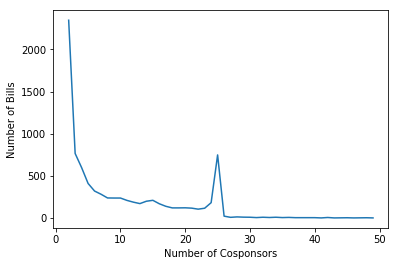

array([    0, 17752,  2347,   765,   597,   409,   319,   281,   237,
         236,   236,   208,   187,   170,   198,   209,   168,   138,
         119,   119,   120,   116,   104,   115,   181,   748,    21,
           7,    12,     9,     8,     4,     8,     5,     8,     4,
           6,     3,     3,     3,     3,     0,     5,     0,     1,
           2,     0,     1,     2,     0,     5,     1,     2,     1,
           1,     2,     0,     0,     1,     2,     1,     1,     1,
           1,     1,     0,     0,     1,     1,     1,     2,     1,
           0,     0,     0,     1,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     1])

In [181]:
plot_histogram(congress_93)

At what number of cosponsors are 90% bills included in that or less?

In [175]:
def plot_fraction_of_bills_by_cosponsors():
    for i in range(93, 115):
        df = pd.read_csv("data/govtrack_cosponsor_data/govtrack_cosponsor_data_" + str(i) + "_congress.csv")
        cosponsors_for_threshold = []
        threshold_range = np.arange(.5, 1, .05)
        for t in threshold_range:
            cosponsors_for_threshold.append(find_num_of_cosponsors(t * df.bill_number.unique().shape[0], plot_histogram(df, True)))
        plt.plot(threshold_range, cosponsors_for_threshold, label=i)
    plt.xlabel("Fraction of Bills")
    plt.ylabel("Number of Cosponsors")
    plt.title("Fraction of Bills by Cosponsor Number")
#     plt.legend()
    plt.savefig("plots/fraction_of_bills_by_cosponsors")
    plt.show()

/Users/emmaling/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2808: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


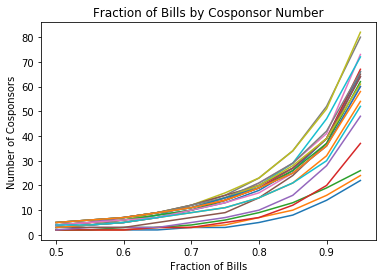

In [176]:
plot_fraction_of_bills_by_cosponsors()

In [144]:
bill_threshold = .9 * congress_93.bill_number.unique().shape[0]
bill_threshold

23599.8

In [145]:
def find_num_of_cosponsors(t, arr): 
    i = 0
    while t > 0:
        t -= arr[i]
        i += 1
    return i

In [146]:
find_num_of_cosponsors(bill_threshold, counts_of_bills_with_x_cosponsors)

14

In [ ]:
for 

Want a dictionary `{person: [cosponsors in past]}`, note the graph does not include legislators who have not sponsored or cosponsored any bills yet - should do intersection of `legislators_93` and `legislators_94` later.

In [53]:
print(len(legislators_93))
print(len(thomas_ids))

547
547


Get party affiliations

In [129]:
house_affil = pd.read_csv("data/party_affiliation/house.csv")
senate_affil = pd.read_csv("data/party_affiliation/senate.csv")
party_affiliations = house_affil.append(senate_affil)
party_affiliations

,congress,cs1,cs2,district,id,name,party,state,statecode
0,93,0.261,-0.053,1.0,14066,YOUNG (GA.),200,AK,81.0
1,94,0.261,-0.053,1.0,14066,YOUNG (ALASKA),200,AK,81.0
2,95,0.261,-0.053,1.0,14066,YOUNG (ALASKA),200,AK,81.0
3,96,0.261,-0.053,1.0,14066,"YOUNG, D.",200,AK,81.0
4,97,0.261,-0.053,1.0,14066,"YOUNG, D.",200,AK,81.0
5,98,0.261,-0.053,1.0,14066,"YOUNG, D.",200,AK,81.0
6,99,0.261,-0.053,1.0,14066,"YOUNG, D.",200,AK,81.0
7,100,0.261,-0.053,1.0,14066,"YOUNG, D.",200,AK,81.0
8,101,0.261,-0.053,1.0,14066,"Young, Don [AK-98]",200,AK,81.0
9,102,0.261,-0.053,1.0,14066,"Young, Don [AK-98]",200,AK,81.0


In [130]:
def get_last_name(name):
    if name['name'][0] == "W":
        print(name['name'])
    return name['name'].split(",")[0].split(" ")[0].lower(), name['party']

In [131]:
party_affiliations = party_affiliations.apply(get_last_name, axis=1)

Woolsey, Lynn C. [CA-6]
Woolsey, Lynn C. [CA-6]
Woolsey, Lynn C. [CA-6]
Woolsey, Lynn C. [CA-6]
Woolsey, Lynn C. [CA-6]
Woolsey, Lynn C. [CA-6]
WALDIE
WAXMAN
WAXMAN
WAXMAN
WAXMAN
WAXMAN
WAXMAN
WAXMAN
Waxman, Henry A. [CA-24]
Waxman, Henry A. [CA-24]
WIGGINS
Waters, Maxine [CA-29]
Waxman, Henry A. [CA-29]
Waxman, Henry A. [CA-29]
Waxman, Henry A. [CA-29]
Waxman, Henry A. [CA-29]
Waxman, Henry A. [CA-29]
Waxman, Henry A. [CA-30]
WILSON, CHARLES H.
WILSON, CHARLES H.
WILSON, C. H.
Watson, Diane E. [CA-32]
Watson, Diane E. [CA-33]
Waters, Maxine [CA-35]
Waters, Maxine [CA-35]
Waters, Maxine [CA-35]
Waters, Maxine [CA-35]
Waters, Maxine [CA-35]
Waters, Maxine [CA-35]
WIGGINS
WIGGINS
WILSON, BOB
WILSON, BOB
WILSON, B.
WIRTH
WIRTH
WIRTH
WIRTH
WIRTH
WIRTH
Weldon, Dave [FL-15]
Weldon, Dave [FL-15]
Weldon, Dave [FL-15]
Weldon, Dave [FL-15]
Weldon, Dave [FL-15]
Wexler, Robert [FL-19]
Wexler, Robert [FL-19]
Wexler, Robert [FL-19]
Wexler, Robert [FL-19]
WASHINGTON
WASHINGTON
Weller, Jerry [IL-11]
W

In [118]:
party_affil_dict = {}
for name, party in party_affiliations.unique():
    if party == 100:
        party_affil_dict[name] = "Democrat"
    elif party == 200:
        party_affil_dict[name] = "Republican"
party_affil_dict

{'young': 'Democrat',
 'edwards': 'Democrat',
 'callahan': 'Republican',
 'bonner': 'Republican',
 'dickinson': 'Republican',
 'everett': 'Republican',
 'nichols': 'Republican',
 'browder': 'Democrat',
 'riley': 'Republican',
 'rogers': 'Democrat',
 'bevill': 'Democrat',
 'aderholt': 'Republican',
 'jones': 'Republican',
 'flippo': 'Democrat',
 'cramer': 'Democrat',
 'buchanan': 'Republican',
 'smith': 'Democrat',
 'erdreich': 'Democrat',
 'bachus': 'Republican',
 'flowers': 'Democrat',
 'shelby': 'Republican',
 'harris': 'Republican',
 'hilliard': 'Democrat',
 'davis': 'Republican',
 'alexander': 'Republican',
 'lambert': 'Democrat',
 'berry': 'Democrat',
 'mills': 'Republican',
 'tucker': 'Democrat',
 'bethune': 'Republican',
 'robinson': 'Republican',
 'thornton': 'Democrat',
 'snyder': 'Republican',
 'hammerschmidt': 'Republican',
 'hutchinson': 'Democrat',
 'boozman': 'Republican',
 'anthony': 'Democrat',
 'dickey': 'Republican',
 'ross': 'Democrat',
 'rhodes': 'Republican',
 'mcc

In [146]:
nodes = []
for legislator in legislators_93:
    print(legislator)
    last_name = legislator.split(",")[0].split(" ")[0].lower()
    if last_name in party_affil_dict.keys():
        nodes.append((legislator, party_affil_dict[last_name]))

O'Neill, Thomas P., Jr.
Hosmer, Craig
Harrington, Michael J.
Bell, Alphonzo
Eilberg, Joshua
Kemp, Jack
Brown, George E., Jr.
Frey, Lou, Jr.
Alexander, Bill
Anderson, John B.
Archer, Bill
Blackburn, Ben
Coughlin, Lawrence
Danielson, George E.
Derwinski, Edward J.
Flowers, Walter
Forsythe, Edwin B.
Fountain, L. H.
Frenzel, Bill
Hanna, Richard T.
Hastings, James F.
Huber, Robert J.
Ichord, Richard H.
Keating, William J.
Mailliard, William S.
Mallary, Richard W.
Robinson, J. Kenneth
Veysey, Victor V.
Ware, John H.
Whitehurst, G. William
Wyatt, Wendell
Wylie, Chalmers P.
Patman, Wright
Rarick, John R.
Randall, William J.
Nix, Robert N. C.
Wolff, Lester L.
Addabbo, Joseph P.
Biaggi, Mario
Brasco, Frank
Buchanan, John
Carey, Hugh L.
Corman, James C.
Davis, Mendel J.
Fascell, Dante B.
Helstoski, Henry
Leggett, Robert L.
Mazzoli, Romano L.
Moakley, John Joseph
Peyser, Peter A.
Pike, Otis G.
Rinaldo, Matthew J.
Rodino, Peter W., Jr.
Roe, Robert A.
Stephens, Robert G., Jr.
Meeds, Lloyd
Andrews, M

Scott, Hugh
Baker, Howard H., Jr.
Bible, Alan
Clark, Dick
Cook, Marlow W.
Gravel, Mike
Stevenson, Adlai E., III
Mathias, Charles McC., Jr.
Sparkman, John J.
Magnuson, Warren G.
Johnston, J. Bennett
Stevens, Ted
Gurney, Edward J.
Hollings, Ernest F.
Beall, J. Glenn, Jr.
Long, Russell B.
Roth Jr., William V.
McGee, Gale W.
Byrd, Robert C.
Huddleston, Walter (Dee)
Allen, James B.
Talmadge, Herman E.
Eastland, James O.
Scott, William Lloyd
Bellmon, Henry L.
Fulbright, James
Griffin, Robert P.
Biden, Joseph R., Jr.
Young, Milton R.
Aiken, George
Bentsen, Lloyd M.
Helms, Jesse
Nunn, Sam
Saxbe, William B.
Symington, Stuart
Byrd, Harry F.,  Jr.
Stennis, John C.


In [147]:
nodes

[("O'Neill, Thomas P., Jr.", 'Democrat'),
 ('Hosmer, Craig', 'Republican'),
 ('Harrington, Michael J.', 'Democrat'),
 ('Bell, Alphonzo', 'Democrat'),
 ('Eilberg, Joshua', 'Democrat'),
 ('Kemp, Jack', 'Republican'),
 ('Brown, George E., Jr.', 'Republican'),
 ('Frey, Lou, Jr.', 'Republican'),
 ('Alexander, Bill', 'Republican'),
 ('Anderson, John B.', 'Republican'),
 ('Archer, Bill', 'Republican'),
 ('Blackburn, Ben', 'Republican'),
 ('Coughlin, Lawrence', 'Republican'),
 ('Danielson, George E.', 'Democrat'),
 ('Derwinski, Edward J.', 'Republican'),
 ('Flowers, Walter', 'Democrat'),
 ('Forsythe, Edwin B.', 'Republican'),
 ('Fountain, L. H.', 'Democrat'),
 ('Frenzel, Bill', 'Republican'),
 ('Hanna, Richard T.', 'Democrat'),
 ('Hastings, James F.', 'Republican'),
 ('Huber, Robert J.', 'Republican'),
 ('Ichord, Richard H.', 'Democrat'),
 ('Keating, William J.', 'Republican'),
 ('Mailliard, William S.', 'Republican'),
 ('Mallary, Richard W.', 'Republican'),
 ('Robinson, J. Kenneth', 'Republic

In [154]:
G = nx.Graph()
# G.add_nodes_from(nodes)

In [155]:
for bill in congress_93.bill_number.unique():
    cosponsors = congress_93[congress_93['bill_number'] == bill].name.unique()
    # Limit to legislators that are Democrat or Republican
    cosponsors = list(filter(
        lambda legislator: legislator.split(",")[0].split(" ")[0].lower() in party_affil_dict.keys(),
        cosponsors))
    print(cosponsors)
    for cosponsor_1 in cosponsors:
        for cosponsor_2 in cosponsors:
            if cosponsor_1 != cosponsor_2:
                G.add_edge(cosponsor_1, cosponsor_2)

["O'Neill, Thomas P., Jr."]
['Hosmer, Craig']
['Harrington, Michael J.']
['Bell, Alphonzo']
['Eilberg, Joshua']
['Eilberg, Joshua']
['Kemp, Jack']
["O'Neill, Thomas P., Jr."]
['Brown, George E., Jr.']
['Frey, Lou, Jr.', 'Alexander, Bill', 'Anderson, John B.', 'Archer, Bill', 'Blackburn, Ben', 'Coughlin, Lawrence', 'Danielson, George E.', 'Derwinski, Edward J.', 'Flowers, Walter', 'Forsythe, Edwin B.', 'Fountain, L. H.', 'Frenzel, Bill', 'Hanna, Richard T.']
['Frey, Lou, Jr.', 'Harrington, Michael J.', 'Hastings, James F.', 'Huber, Robert J.', 'Ichord, Richard H.', 'Keating, William J.', 'Mailliard, William S.', 'Mallary, Richard W.', 'Robinson, J. Kenneth', 'Veysey, Victor V.', 'Ware, John H.', 'Whitehurst, G. William', 'Wyatt, Wendell', 'Wylie, Chalmers P.']
['Patman, Wright']
['Rarick, John R.']
['Randall, William J.']
['Nix, Robert N. C.']
['Nix, Robert N. C.']
["O'Neill, Thomas P., Jr."]
['Wolff, Lester L.', 'Addabbo, Joseph P.', 'Biaggi, Mario', 'Brasco, Frank', 'Buchanan, John', 

['Conte, Silvio O.']
['Cohen, William S.']
['Kemp, Jack']
['Kemp, Jack']
['Grasso, Ella T.', 'Alexander, Bill', 'Badillo, Herman', 'Boland, Edward P.', 'Burke, James A.', 'Burke, Yvonne B.', 'Carey, Hugh L.', 'Chisholm, Shirley', 'Cohen, William S.', 'Culver, John C.', 'de Lugo, Ron', 'Eilberg, Joshua', 'Esch, Marvin L.', 'Fish, Hamilton, Jr.', 'Ford, William D.', 'Forsythe, Edwin B.', 'Fraser, Donald M.', 'Gaydos, Joseph M.', 'Gonzalez, Henry B.', 'Green, William J.', 'Hanley, James M.', 'Harrington, Michael J.', 'Hawkins, Augustus F.', 'Hechler, Ken', 'Helstoski, Henry']
['Grasso, Ella T.', 'Jordan, Barbara', 'Kyros, Peter N.', 'McDade, Joseph M.', 'Meeds, Lloyd', 'Metcalfe, Ralph H.', 'Minish, Joseph G.', 'Moakley, John Joseph', 'Price, Melvin', 'Rangel, Charles B.', 'Rodino, Peter W., Jr.', 'Rosenthal, Benjamin S.', 'Roybal, Edward R.', 'Schroeder, Patricia', 'Seiberling, John F.', 'St Germain, Fernand J.', 'Stark, Fortney Pete', 'Thompson, Frank, Jr.', 'Tiernan, Robert O.', 'Waldi

['Snyder, M. G. (Gene)', 'Burke, J. Herbert', 'Camp, John N. Happy', 'Clausen, Don H.', 'Cleveland, James C.', 'Collins, Cardiss', 'Davis, John W.', 'Derwinski, Edward J.', 'Dickinson, William L.', 'Gettys, Tom S.', 'Gross, H. R.', 'Grover, James R., Jr.', 'Gubser, Charles S.', 'Ketchum, William M.', 'Landrum, Phil M.', 'Mann, James R.', 'McCloskey, Paul N., Jr.', 'Myers, John T.', 'Rarick, John R.', 'Rousselot, John H.', 'Skubitz, Joe', 'Steiger, Sam', 'Stephens, Robert G., Jr.', 'Stubblefield, Frank A.', 'Symms, Steven D.']
[]
['Snyder, M. G. (Gene)', 'Andrews, Mark', 'Breckinridge, John B.', 'Burleson, Omar', 'Butler, M. Caldwell', 'Carter, Tim Lee', 'Casey, Bob', 'Cederberg, Elford A.', 'Daniel, Robert W., Jr.', 'Davis, Glenn R.', 'Dorn, William Jennings Bryan', 'Forsythe, Edwin B.', 'Ginn, Bo', 'Hastings, James F.', 'Hillis, Elwood H.', 'Hunt, John E.', 'Kemp, Jack', 'Mailliard, William S.', 'Mayne, Wiley', 'Milford, Dale', 'Pettis, Jerry L.', 'Saylor, John P.', 'Steelman, Alan', 

['Rodino, Peter W., Jr.']
['Rooney, John J.']
['Pepper, Claude', 'Abzug, Bella S.', 'Fraser, Donald M.', 'Mitchell, Parren J.']
['Long, Clarence D.']
['Rangel, Charles B.', 'Harrington, Michael J.']
['Hebert, F. Edward']
['Huber, Robert J.', 'Sebelius, Keith G.']
['Brademas, John']
['Long, Clarence D.', 'Brown, George E., Jr.', 'Fraser, Donald M.', 'Harrington, Michael J.', 'Helstoski, Henry', 'Rees, Thomas N.', 'Udall, Morris K.']
['Fascell, Dante B.']
["O'Neill, Thomas P., Jr."]
['Fuqua, Don']
['Roybal, Edward R.']
['Hudnut, William H., III', 'Eckhardt, Bob']
['Waldie, Jerome R.']
['Donohue, Harold D.']
['Esch, Marvin L.']
['Zwach, John M.']
['Bowen, David R.']
['Hebert, F. Edward', 'Bennett, Charles E.', 'Bray, William G.', 'Dickinson, William L.', 'Gubser, Charles S.', 'Hicks, Floyd V.', 'Hunt, John E.', 'Ichord, Richard H.', 'King, Carleton J.', 'Leggett, Robert L.', 'Nedzi, Lucien N.', 'Pike, Otis G.', 'Powell, Walter E.', 'Price, Melvin', 'Price, Robert D.', 'Randall, William J.

['McEwen, Robert C.', 'Murphy, John M.', 'Pike, Otis G.', 'Podell, Bertram L.', 'Rangel, Charles B.', 'Robison, Howard W.', 'Roncallo, Angelo D.', 'Rosenthal, Benjamin S.', 'Smith, Henry P., III', 'Stratton, Samuel S.', 'Walsh, William F.', 'Wolff, Lester L.', 'Wydler, John W.']
["O'Hara, James G."]
['Huber, Robert J.', 'Blackburn, Ben', 'Harrington, Michael J.', 'Hechler, Ken', 'Heckler, Margaret M.', 'Kemp, Jack', 'Long, Clarence D.', 'Mitchell, Parren J.', 'Quie, Albert H.', 'Whitehurst, G. William']
['Shipley, George E.']
['Boland, Edward P.']
['Runnels, Harold L.']
['Anderson, John B.']
['Young, Samuel H.']
['Brademas, John']
['Bolling, Richard']
['Hanrahan, Robert P.', 'Bell, Alphonzo', 'Grover, James R., Jr.', 'Hammerschmidt, John P.', 'Harrington, Michael J.', 'Heinz, John', 'Pritchard, Joel', 'Rodino, Peter W., Jr.', 'Sebelius, Keith G.', 'Whalen, Charles W., Jr.']
['Brademas, John']
['Brademas, John']
['Grasso, Ella T.', 'Burke, James A.', 'Conte, Silvio O.', 'Cotter, William

['Aspin, Les', 'Abzug, Bella S.', 'Brown, George E., Jr.', 'Burke, Yvonne B.', 'Fraser, Donald M.', 'Hechler, Ken', 'Long, Clarence D.', 'Metcalfe, Ralph H.', 'Stokes, Louis']
['Aspin, Les', 'Abzug, Bella S.', 'Brown, George E., Jr.', 'Fraser, Donald M.', 'Hechler, Ken', 'Stokes, Louis']
['Aspin, Les', 'Abzug, Bella S.', 'Brown, George E., Jr.', 'Fraser, Donald M.', 'Hechler, Ken', 'Stokes, Louis']
['Derwinski, Edward J.', 'Annunzio, Frank', 'Bafalis, L. A. (Skip)', 'Eilberg, Joshua', 'Frenzel, Bill', 'Horton, Frank J.', 'Lent, Norman F.', 'Sarasin, Ronald A.', 'Steele, Robert H.']
['Podell, Bertram L.']
['Roncallo, Angelo D.']
['Broomfield, William S.']
['Howard, James J.']
['Huber, Robert J.', 'Derwinski, Edward J.']
['Roe, Robert A.']
['Veysey, Victor V.']
['Snyder, M. G. (Gene)', 'Derwinski, Edward J.', 'Hastings, James F.', 'King, Carleton J.', 'Walsh, William F.']
['McKinney, Stewart B.']
['Wolff, Lester L.', 'Abdnor, James', 'Blackburn, Ben', 'Cleveland, James C.', 'Cochran, Tha

['Hanrahan, Robert P.', 'Koch, Edward I.', 'Lagomarsino, Robert J.', 'Mayne, Wiley', 'Murtha, John P.', 'Nix, Robert N. C.', 'Rodino, Peter W., Jr.', 'Roe, Robert A.', 'Sandman, Charles W., Jr.', 'Sarasin, Ronald A.', 'Sarbanes, Paul S.', 'Schroeder, Patricia', 'Treen, David C.', 'Walsh, William F.', 'Yates, Sidney R.']
['Schroeder, Patricia', 'Rinaldo, Matthew J.']
['Steele, Robert H.']
['Patman, Wright']
['Brademas, John', 'Bafalis, L. A. (Skip)', 'Broyhill, Joel T.', 'Clay, William (Bill)', 'Kyros, Peter N.', 'McKinney, Stewart B.', 'Podell, Bertram L.', 'Sarbanes, Paul S.', 'Yatron, Gus']
['Badillo, Herman', 'Brown, George E., Jr.', 'Conte, Silvio O.', 'Conyers, John, Jr.', 'Drinan, Robert F.', 'Edwards, Don', 'Forsythe, Edwin B.', 'Hamilton, Lee H.', 'Harrington, Michael J.', 'Hosmer, Craig', 'Lehman, William', 'Long, Clarence D.', 'Moakley, John Joseph', 'Rangel, Charles B.', 'Rees, Thomas N.', 'Robison, Howard W.', 'Schneebeli, Herman T.', 'Schroeder, Patricia', 'Seiberling, Joh

['Roe, Robert A.']
['Nedzi, Lucien N.', 'Aspin, Les', 'Beard, Robin', 'Butler, M. Caldwell', 'Daniel, W. C. (Dan)', 'Davis, Mendel J.', 'Holt, Marjorie S.', 'Jones, James R.', 'Mollohan, Robert H.', "O'Brien, George M.", 'Powell, Walter E.', 'Schroeder, Patricia', 'Spence, Floyd', 'Treen, David C.', 'Whitehurst, G. William']
['Pepper, Claude']
['Abzug, Bella S.']
['Broomfield, William S.']
['Latta, Delbert L.']
['Broyhill, Joel T.']
['Coughlin, Lawrence']
['Dulski, Thaddeus J.']
['Esch, Marvin L.', 'Chisholm, Shirley', 'Conlan, John B.', 'Hechler, Ken', 'Martin, James G.', 'Mazzoli, Romano L.', 'Milford, Dale', 'Roe, Robert A.', 'Symington, James W.', 'Winn, Larry, Jr.']
['Symington, James W.', 'Minshall, William E.']
['Roe, Robert A.']
['Roybal, Edward R.', 'Stark, Fortney Pete', 'Waldie, Jerome R.']
['Sisk, B. F.']
['Bauman, Robert E.']
['Green, Edith', 'Dellenback, John', 'Ullman, Al', 'Wyatt, Wendell']
['Railsback, Thomas F.']
['Runnels, Harold L.', 'Lujan, Manuel, Jr.']
['Anderson

['Robison, Howard W.']
['Daniel, Robert W., Jr.']
['Fountain, L. H.']
['Luken, Thomas A.', 'Conyers, John, Jr.', "O'Hara, James G."]
['Moorhead, Carlos J.']
['Derwinski, Edward J.']
['Gonzalez, Henry B.']
['Macdonald, Torbert H.']
['Steele, Robert H.']
['Mitchell, Donald J.']
['Talcott, Burt L.']
['Thompson, Frank, Jr.']
['Esch, Marvin L.']
['Brinkley, Jack']
['Gude, Gilbert', 'Stokes, Louis']
['Lent, Norman F.']
['Ruppe, Philip E.']
['Bergland, Bob', 'Blatnik, John Anton', 'Fraser, Donald M.', 'Frenzel, Bill', 'Karth, Joseph E.', 'Nelsen, Ancher', 'Quie, Albert H.', 'Zwach, John M.']
['Gilman, Benjamin A.']
['Stratton, Samuel S.']
['Randall, William J.']
['Hosmer, Craig', 'Price, Melvin']
['Martin, James G.']
['Mahon, George H.']
['Froehlich, Harold V.']
['Mink, Patsy T.', 'Dingell, John D.', 'Ford, William D.', 'Helstoski, Henry', 'Koch, Edward I.', 'Mitchell, Parren J.', 'Nix, Robert N. C.', 'Rosenthal, Benjamin S.', 'Roybal, Edward R.', 'Stokes, Louis', 'Wilson, Charles H.']
['Stag

['Danielson, George E.']
['Flynt, John J., Jr.']
['Delaney, James J.']
['de Lugo, Ron']
['Downing, Thomas N.']
['Lent, Norman F.', 'Fulton, Richard', 'Sandman, Charles W., Jr.', 'Steelman, Alan']
['Rangel, Charles B.']
['Runnels, Harold L.']
['Waldie, Jerome R.', 'Gude, Gilbert']
['Wilson, Charles H.']
['Zablocki, Clement J.']
['Patman, Wright']
['Ullman, Al']
['Fuqua, Don']
['Conte, Silvio O.', 'Chisholm, Shirley', 'Frenzel, Bill', 'Hicks, Floyd V.', 'Rinaldo, Matthew J.', 'Sarasin, Ronald A.', 'Symington, James W.', 'Whalen, Charles W., Jr.']
['Danielson, George E.']
['Hechler, Ken']
['Podell, Bertram L.', 'Abzug, Bella S.', 'Badillo, Herman', 'Bingham, Jonathan B.', 'Brasco, Frank', 'Drinan, Robert F.', 'Eilberg, Joshua', 'Fish, Hamilton, Jr.', 'Gude, Gilbert', 'Hanley, James M.', 'Hastings, James F.', 'Holtzman, Elizabeth', 'Koch, Edward I.', 'Lehman, William', 'Mezvinsky, Edward', 'Roncallo, Angelo D.', 'Rosenthal, Benjamin S.', 'Sarbanes, Paul S.', 'Steiger, Sam', 'Wolff, Lester 

['Howard, James J.', 'Biaggi, Mario', 'Carney, Charles J.', 'Carter, Tim Lee', 'Conlan, John B.', 'Cotter, William R.', 'Dorn, William Jennings Bryan', 'Dulski, Thaddeus J.', 'Findley, Paul', 'Ford, Gerald R., Jr.', 'Ford, William D.', 'Forsythe, Edwin B.', 'Gude, Gilbert', 'Hamilton, Lee H.', 'Harrington, Michael J.', 'Hillis, Elwood H.', 'Kemp, Jack', 'Matsunaga, Spark M.', 'Melcher, John', "O'Hara, James G.", 'Price, Melvin', 'Rees, Thomas N.', 'Rodino, Peter W., Jr.', 'Steiger, Sam', 'Thompson, Frank, Jr.']
['McCormack, Mike']
['Price, Robert D.']
['Reid, Ogden R.', 'Mink, Patsy T.']
['Rogers, Paul G.']
['Conable, Barber B., Jr.']
['Mann, James R.']
['Mathias, Robert B. (Bob)', 'Clausen, Don H.', 'Hosmer, Craig', 'Johnson, Harold T.', 'Ketchum, William M.', 'Sisk, B. F.', 'Teague, Charles M.']
['Roe, Robert A.']
['Roe, Robert A.']
['Whitten, Jamie L.']
['Cronin, Paul W.']
['Dingell, John D.', 'Stark, Fortney Pete']
['Price, Robert D.']
['Long, Clarence D.']
['Long, Clarence D.', 'H

['Findley, Paul']
['Fulton, Richard']
['Helstoski, Henry']
['McClory, Robert']
['Roncallo, Angelo D.']
['Badillo, Herman']
['Devine, Samuel L.']
['Annunzio, Frank']
['Dingell, John D.']
['Rogers, Paul G.', 'Nelsen, Ancher']
['Zwach, John M.']
['Culver, John C.', 'Alexander, Bill', 'Anderson, John B.', 'Annunzio, Frank', 'Bergland, Bob', 'Blatnik, John Anton', 'Bowen, David R.', 'Crane, Philip M.', 'Derwinski, Edward J.', 'Fraser, Donald M.', 'Frenzel, Bill', 'Froehlich, Harold V.', 'Gray, Kenneth J.', 'Mezvinsky, Edward', 'Michel, Robert H.', "O'Brien, George M.", 'Obey, David R.', 'Quie, Albert H.', 'Rostenkowski, Dan', 'Steiger, William A.', 'Sullivan, Leonor K. (Mrs. John B.)', 'Symington, James W.', 'Thomson, Vernon W.', 'Whitten, Jamie L.', 'Zwach, John M.']
['Culver, John C.', 'Boggs, Corinne C. (Lindy)', 'Montgomery, G. V. (Sonny)']
['Mills, Wilbur D.', 'Burke, James A.']
['Nix, Robert N. C.']
["O'Brien, George M.", 'Burgener, Clair W.', 'Hanrahan, Robert P.', 'Huber, Robert J.'

['Seiberling, John F.']
['Broyhill, Joel T.']
['Carter, Tim Lee']
['Myers, John T.', 'Johnson, Harold T.', 'Wolff, Lester L.']
['Bennett, Charles E.']
['Steele, Robert H.']
['Baker, LaMar', 'Beard, Robin', 'Daniel, W. C. (Dan)', 'Duncan, John J.', 'Kuykendall, Dan H.', 'Mazzoli, Romano L.', 'Montgomery, G. V. (Sonny)', 'Pickle, J. J.', 'Quillen, James H. (Jimmy)']
['Kastenmeier, Robert W.']
['Rhodes, John J.']
['Daniels, Dominick V.', 'Abdnor, James', 'Addabbo, Joseph P.', 'Anderson, Glenn M.', 'Annunzio, Frank', 'Badillo, Herman', 'Bafalis, L. A. (Skip)', 'Baker, LaMar', 'Barrett, William A.', 'Boland, Edward P.', 'Brademas, John', 'Brasco, Frank', 'Bray, William G.', 'Breaux, John B.', 'Breckinridge, John B.', 'Brown, George E., Jr.', 'Broyhill, Joel T.', 'Buchanan, John', 'Burke, James A.', 'Burke, Yvonne B.', 'Byron, Goodloe E.', 'Clancy, Donald D.', 'Clark, Frank M.', 'Clawson, Del', 'Collins, James M.']
['Daniels, Dominick V.', 'Conyers, John, Jr.', 'Corman, James C.', 'Daniel, W

['Edwards, Jack']
['Brademas, John']
['Thone, Charles']
['Collins, James M.']
['Diggs, Charles C., Jr.', 'Howard, James J.', 'Mosher, Charles A.', 'Podell, Bertram L.', 'Roybal, Edward R.']
['Mahon, George H.']
['Mallary, Richard W.']
['Rarick, John R.', 'Baker, LaMar', 'Foley, Thomas S.', 'Hansen, Julia Butler', 'Melcher, John', 'Sikes, Robert L. F.', 'Vigorito, Joseph P.']
['Conte, Silvio O.', 'Badillo, Herman', 'Brasco, Frank', 'Harrington, Michael J.', 'Hastings, James F.', 'Mazzoli, Romano L.', 'McDade, Joseph M.', 'Nix, Robert N. C.', 'Rangel, Charles B.', 'Rosenthal, Benjamin S.', 'Tiernan, Robert O.', 'Ware, John H.', 'Wyatt, Wendell']
['Whitehurst, G. William']
['Wylie, Chalmers P.', 'Archer, Bill', 'Bevill, Tom', 'Blackburn, Ben', 'Bray, William G.', 'Burgener, Clair W.', 'Burke, James A.', 'Camp, John N. Happy', 'Clancy, Donald D.', 'Collier, Harold R.', 'Collins, James M.', 'Conlan, John B.', 'Daniel, W. C. (Dan)', 'Dent, John H.', 'Devine, Samuel L.', 'Duncan, John J.', 'E

['Young, Don']
['Forsythe, Edwin B.']
['Ketchum, William M.', 'Burgener, Clair W.', 'Clausen, Don H.', 'Cronin, Paul W.', 'Froehlich, Harold V.', 'Gubser, Charles S.', 'Harsha, William H.', 'Hechler, Ken', 'Hinshaw, Andrew J.', 'Johnson, Harold T.', 'McCloskey, Paul N., Jr.', 'Mink, Patsy T.', 'Moorhead, Carlos J.', 'Parris, Stanford E. (Stan)', 'Rees, Thomas N.', 'Regula, Ralph', 'Rousselot, John H.', 'Runnels, Harold L.', 'Ryan, Leo J.', 'Sisk, B. F.', 'Steelman, Alan', 'Symms, Steven D.', 'Teague, Charles M.', 'Towell, David', 'Veysey, Victor V.']
['Ketchum, William M.', 'Hanrahan, Robert P.', 'Skubitz, Joe']
['Gubser, Charles S.']
['Hillis, Elwood H.']
['Pickle, J. J.', 'Anderson, John B.', 'Arends, Leslie C.', 'Blatnik, John Anton', 'Boggs, Corinne C. (Lindy)', 'Ford, Gerald R., Jr.', 'Gray, Kenneth J.', 'Mahon, George H.', 'McFall, John J.', "O'Neill, Thomas P., Jr.", 'Patman, Wright']
['Patman, Wright', 'Archer, Bill', 'Brooks, Jack B.', 'Burlison, Bill D.', 'Casey, Bob', 'Colli

['Jarman, John']
['Whitehurst, G. William', 'Robinson, J. Kenneth']
['Long, Clarence D.']
['Arends, Leslie C.', 'Cederberg, Elford A.', 'Gray, Kenneth J.', 'Hebert, F. Edward', 'McFall, John J.', "O'Neill, Thomas P., Jr.", 'Rhodes, John J.']
['Howard, James J.', 'Andrews, Ike', 'Archer, Bill', 'Brown, Garry E.', 'Davis, John W.', 'Dent, John H.', 'Dulski, Thaddeus J.', 'Fascell, Dante B.', 'Froehlich, Harold V.', 'Fulton, Richard', 'Ginn, Bo', 'Harrington, Michael J.', 'Hicks, Floyd V.', 'Hogan, Lawrence J.', 'Ichord, Richard H.', 'Johnson, Harold T.', 'Kemp, Jack', 'McSpadden, Clem Rogers', 'Murphy, John M.', 'Patten, Edward J.', 'Quillen, James H. (Jimmy)', 'Rhodes, John J.', 'Robinson, J. Kenneth', 'Thompson, Frank, Jr.', 'Wilson, Robert C.']
['Peyser, Peter A.']
['Peyser, Peter A.']
['Broomfield, William S.']
['Derwinski, Edward J.']
['Dulski, Thaddeus J.', 'Smith, Henry P., III']
['Mitchell, Donald J.']
['Roncalio, Teno']
['Howard, James J.', 'Addabbo, Joseph P.', 'Biaggi, Mario',

['Latta, Delbert L.', 'Guyer, Tennyson']
['Leggett, Robert L.']
['Lujan, Manuel, Jr.']
['Mallary, Richard W.']
['Anderson, Glenn M.']
['Roe, Robert A.']
['Roberts, Ray']
['Roberts, Ray']
['Rogers, Paul G.']
['Schneebeli, Herman T.']
['Schroeder, Patricia', 'Rodino, Peter W., Jr.']
['Seiberling, John F.']
['Snyder, M. G. (Gene)']
['Thomson, Vernon W.']
['Thomson, Vernon W.']
['Abzug, Bella S.', 'Jordan, Barbara']
['Roe, Robert A.']
['Diggs, Charles C., Jr.', 'Burton, Phillip', 'de Lugo, Ron', 'Flood, Daniel J.', 'Leggett, Robert L.', 'Madden, Ray J.', 'Matsunaga, Spark M.', 'Rodino, Peter W., Jr.']
['Gonzalez, Henry B.']
['Heckler, Margaret M.']
['Heinz, John']
['Moakley, John Joseph']
['Owens, Wayne']
['Roe, Robert A.']
['Roe, Robert A.']
['Rogers, Paul G.']
['Rousselot, John H.']
['Roe, Robert A.']
['Whitehurst, G. William', 'Wilson, Charles H.']
['Whitehurst, G. William', 'Hansen, Orval']
['Helstoski, Henry']
['Kyros, Peter N.']
['Anderson, Glenn M.', 'Gude, Gilbert']
['Harrington, M

['Riegle, Donald W., Jr.', 'Brown, Garry E.', 'Broyhill, James T.', 'Buchanan, John', 'Chisholm, Shirley', 'Collier, Harold R.', 'Collins, Cardiss', 'Derwinski, Edward J.', 'Heckler, Margaret M.', 'Leggett, Robert L.', 'Lujan, Manuel, Jr.', 'Mitchell, Parren J.', 'Parris, Stanford E. (Stan)', 'Railsback, Thomas F.', 'Shuster, Bud', 'Sikes, Robert L. F.', 'Wilson, Charles', 'Winn, Larry, Jr.']
['Stanton, James V.']
['Vanik, Charles A.', 'Bingham, Jonathan B.', 'Brown, George E., Jr.', 'Collins, Cardiss', 'Cronin, Paul W.', 'Edwards, Don', 'Eilberg, Joshua', 'Flood, Daniel J.', 'Harrington, Michael J.', 'Hechler, Ken', 'Koch, Edward I.', 'Milford, Dale', 'Nix, Robert N. C.', 'Price, Melvin', 'Rees, Thomas N.', 'Rose, Charlie', 'Roybal, Edward R.', 'Stark, Fortney Pete', 'Steelman, Alan', 'Studds, Gerry E.', 'Tiernan, Robert O.', 'Veysey, Victor V.']
['Roe, Robert A.']
['Vanik, Charles A.', 'Bergland, Bob', 'Burgener, Clair W.', 'Gunter, Bill', 'Holtzman, Elizabeth', 'Podell, Bertram L.',

['Pepper, Claude']
['Roe, Robert A.']
['Pepper, Claude']
['Roe, Robert A.']
['Udall, Morris K.', 'Blatnik, John Anton', 'Chisholm, Shirley', 'Corman, James C.', 'Maraziti, Joseph J.', 'Miller, Clarence E.', 'Nix, Robert N. C.']
['Vanik, Charles A.', 'Ashbrook, John M.']
['Walsh, William F.']
['Wilson, Robert C.']
['Wolff, Lester L.']
['Wyatt, Wendell']
['Wyatt, Wendell']
['Wylie, Chalmers P.', 'Devine, Samuel L.']
['Roe, Robert A.']
['Smith, Henry P., III']
['Anderson, Glenn M.']
['Anderson, Glenn M.', 'Bafalis, L. A. (Skip)', 'Brown, George E., Jr.', 'Conyers, John, Jr.', 'Cotter, William R.', 'Danielson, George E.', 'de Lugo, Ron', 'Drinan, Robert F.', 'Edwards, Don', 'Ford, William D.', 'Helstoski, Henry', 'Hogan, Lawrence J.', 'Leggett, Robert L.', 'Lehman, William', 'Metcalfe, Ralph H.', 'Rodino, Peter W., Jr.', 'Roe, Robert A.', 'Roncallo, Angelo D.', 'Rosenthal, Benjamin S.', 'Roybal, Edward R.', 'Stokes, Louis', 'Waldie, Jerome R.', 'Walsh, William F.', 'Yatron, Gus']
['Aspin, 

['Steele, Robert H.']
['Steele, Robert H.']
['Steiger, Sam']
['Waggonner, Joe D., Jr.']
['Roe, Robert A.']
['Waldie, Jerome R.']
['Wilson, Robert C.']
['Bergland, Bob']
['Brotzman, Donald G.']
['Conte, Silvio O.', 'Bell, Alphonzo', 'Brasco, Frank', "O'Brien, George M."]
['Donohue, Harold D.']
['Donohue, Harold D.']
['Heinz, John']
['Holt, Marjorie S.']
['McDade, Joseph M.']
['Rogers, Paul G.']
['Moss, John E.']
['Perkins, Carl Dewey']
['Peyser, Peter A.', 'Brasco, Frank', 'Cohen, William S.', 'Conte, Silvio O.', 'Conyers, John, Jr.', 'Derwinski, Edward J.', 'Dickinson, William L.', 'Edwards, Don', 'Findley, Paul', 'Fish, Hamilton, Jr.', 'Fraser, Donald M.', 'Gilman, Benjamin A.', 'Helstoski, Henry', 'Hillis, Elwood H.', 'McDade, Joseph M.', 'McKinney, Stewart B.', 'Mitchell, Parren J.', 'Mollohan, Robert H.', 'Podell, Bertram L.', 'Riegle, Donald W., Jr.', 'Rose, Charlie', 'Ryan, Leo J.', 'Sebelius, Keith G.', 'Vander Jagt, Guy', 'Walsh, William F.']
['Preyer, Richardson']
['Rousselot,

['Mathis, Dawson']
['Mathis, Dawson']
['Moakley, John Joseph']
['Pepper, Claude']
['Perkins, Carl Dewey']
['Peyser, Peter A.', 'Chisholm, Shirley', 'Heckler, Margaret M.', 'Holtzman, Elizabeth', 'Hudnut, William H., III', 'Murphy, John M.']
['Rooney, Fred B.']
['Regula, Ralph']
['Reuss, Henry S.', 'Vander Jagt, Guy']
['Reuss, Henry S.', 'Adams, Brock', 'Moss, John E.', 'Thompson, Frank, Jr.']
['Rodino, Peter W., Jr.', 'Hutchinson, Edward']
['Rodino, Peter W., Jr.', 'Hutchinson, Edward']
['Rogers, Paul G.']
['Roybal, Edward R.']
['Saylor, John P.', 'Boland, Edward P.', 'Heinz, John', 'Kyros, Peter N.', 'Moorhead, Carlos J.', 'Roncallo, Angelo D.', 'Shuster, Bud', 'Teague, Olin E.', 'Veysey, Victor V.']
['Skubitz, Joe']
['Waldie, Jerome R.']
['Rooney, Fred B.']
['Waldie, Jerome R.']
['Waldie, Jerome R.']
['Waldie, Jerome R.']
['Wyman, Louis C.', 'Brown, Garry E.', 'Derwinski, Edward J.', 'Devine, Samuel L.', 'Eshleman, Edwin D.', 'Goodling, William F.', 'Gross, H. R.', 'Gubser, Charles S

['Tiernan, Robert O.']
['Tiernan, Robert O.']
['Burton, Phillip']
['Talcott, Burt L.']
['Abzug, Bella S.', 'Culver, John C.']
['Abzug, Bella S.', 'Culver, John C.']
['Abzug, Bella S.', 'Holtzman, Elizabeth']
['Roybal, Edward R.']
['Archer, Bill']
['Archer, Bill']
['Archer, Bill']
['Archer, Bill']
['Ashley, Thomas L.', 'Danielson, George E.', 'Fraser, Donald M.', 'Hechler, Ken', 'Mitchell, Parren J.', 'Seiberling, John F.']
['Bowen, David R.']
['Brinkley, Jack']
['Brown, Clarence, Jr.']
['Cochran, Thad']
['Downing, Thomas N.']
['Roybal, Edward R.']
['Downing, Thomas N.']
['Eilberg, Joshua']
['Eilberg, Joshua']
['Fraser, Donald M.', 'Diggs, Charles C., Jr.', "O'Brien, George M."]
['Griffiths, Martha W.', 'Corman, James C.', 'Lehman, William']
['Gunter, Bill', 'Bafalis, L. A. (Skip)', 'Bergland, Bob', 'Brown, George E., Jr.', 'Conte, Silvio O.', 'Conyers, John, Jr.', 'Davis, John W.', 'Green, Edith', 'Hansen, Orval', 'Mathis, Dawson', 'Mitchell, Parren J.', 'Moakley, John Joseph', 'Riegle

['Staggers, Harley O.', 'Devine, Samuel L.']
['Stephens, Robert G., Jr.']
['Stephens, Robert G., Jr.', 'Bergland, Bob', 'Bevill, Tom', 'Boggs, Corinne C. (Lindy)', 'Brown, George E., Jr.', 'Burke, Yvonne B.', 'Clay, William (Bill)', 'Dellums, Ronald V.', 'Ford, William D.', 'Helstoski, Henry', 'Kyros, Peter N.', 'McSpadden, Clem Rogers', 'Pickle, J. J.', 'Podell, Bertram L.', 'Rooney, Fred B.', 'Roy, William R.', 'Roybal, Edward R.', 'Smith, Neal Edward', 'Stark, Fortney Pete', 'Stubblefield, Frank A.', 'Vigorito, Joseph P.', 'Young, Andrew']
['Dulski, Thaddeus J.']
['Horton, Frank J.']
['Patten, Edward J.']
['Stark, Fortney Pete', 'Breaux, John B.', 'Clay, William (Bill)', 'Conte, Silvio O.', 'Diggs, Charles C., Jr.', 'Huber, Robert J.', 'Jones, James R.', 'McCormack, Mike', 'Metcalfe, Ralph H.', 'Mink, Patsy T.', 'Morgan, Thomas E.', 'Preyer, Richardson', 'Rooney, Fred B.', 'Rosenthal, Benjamin S.', 'Ryan, Leo J.', 'Seiberling, John F.', 'Shoup, Dick', 'Steelman, Alan', 'Symms, Steve

['Carney, Charles J.']
['Conable, Barber B., Jr.']
['Clausen, Don H.']
['Fulton, Richard']
['Roybal, Edward R.']
['Fuqua, Don']
['Ginn, Bo']
['Griffiths, Martha W.']
['King, Carleton J.']
['Koch, Edward I.', 'Harrington, Michael J.']
['Koch, Edward I.', 'Cohen, William S.', 'Stark, Fortney Pete', 'White, Richard C.']
['McCormack, Mike', 'Archer, Bill', 'Blatnik, John Anton', 'Burgener, Clair W.', 'Carney, Charles J.', 'Corman, James C.', 'Danielson, George E.', 'Edwards, Jack', 'Fish, Hamilton, Jr.', 'Fraser, Donald M.', 'Goldwater, Barry, Jr.', 'Johnson, James P. (Jim)', 'Kemp, Jack', 'Mayne, Wiley', 'Meeds, Lloyd', 'Mosher, Charles A.', 'Pepper, Claude', 'Quie, Albert H.', 'Robinson, J. Kenneth', 'Shriver, Garner E.', 'Sisk, B. F.', 'Stanton, J. William', 'Teague, Olin E.', 'Vanik, Charles A.', 'Young, Andrew']
['McCormack, Mike', 'Aspin, Les', 'Baker, LaMar', 'Froehlich, Harold V.', 'Goldwater, Barry, Jr.', 'Keating, William J.', 'Lent, Norman F.', 'Long, Clarence D.', 'Mosher, Char

['Maraziti, Joseph J.']
['Mizell, Wilmer']
['Moakley, John Joseph']
['Moakley, John Joseph', 'Pepper, Claude', 'Waldie, Jerome R.']
['Parris, Stanford E. (Stan)', 'Bafalis, L. A. (Skip)']
['Patten, Edward J.']
['Perkins, Carl Dewey']
['Pickle, J. J.', 'Casey, Bob', 'Eckhardt, Bob', 'Fisher, O. C.', 'Gonzalez, Henry B.', 'Milford, Dale', 'Patman, Wright', 'Poage, W. R.', 'Price, Robert D.', 'White, Richard C.', 'Wright, James C., Jr.']
['Preyer, Richardson']
['Roybal, Edward R.']
['Reuss, Henry S.']
['Rinaldo, Matthew J.']
['Robison, Howard W.']
['Sarasin, Ronald A.', 'Daniel, W. C. (Dan)', 'Dent, John H.', 'Henderson, David N.', 'Roe, Robert A.']
['Schroeder, Patricia']
['Smith, Neal Edward']
['Steelman, Alan']
['Steiger, William A.']
['Waldie, Jerome R.']
['Zwach, John M.']
['Steele, Robert H.']
['Roybal, Edward R.']
['Biester, Edward G., Jr.']
['Biester, Edward G., Jr.', 'Andrews, Mark', 'Coughlin, Lawrence', 'Eshleman, Edwin D.', 'Frelinghuysen, Peter H. B.', 'Heinz, John', 'Hillis,

['Winn, Larry, Jr.']
['Cleveland, James C.']
['Cleveland, James C.', 'Howard, James J.', 'Snyder, M. G. (Gene)']
['Steele, Robert H.']
['Roybal, Edward R.']
['Davis, John W.']
['Eckhardt, Bob']
['Jordan, Barbara']
['Winn, Larry, Jr.']
['Clark, Frank M.']
['Cochran, Thad']
['Cohen, William S.']
['Daniels, Dominick V.']
['Fraser, Donald M.', 'Grasso, Ella T.']
['Gilman, Benjamin A.']
['Roybal, Edward R.']
['Ginn, Bo']
['Ginn, Bo']
['Hastings, James F.', 'Collins, James M.', 'Lent, Norman F.', 'McDade, Joseph M.', 'Metcalfe, Ralph H.']
['McFall, John J.']
['Nichols, Bill']
['Pepper, Claude']
['Peyser, Peter A.', 'Abzug, Bella S.', 'Badillo, Herman', 'Biaggi, Mario', 'Brasco, Frank', 'Chisholm, Shirley', 'Holtzman, Elizabeth', 'Koch, Edward I.', 'Lent, Norman F.', 'Murphy, John M.', 'Rangel, Charles B.', 'Rosenthal, Benjamin S.', 'Wolff, Lester L.']
['Pickle, J. J.', 'Alexander, Bill', 'Fuqua, Don', 'Steelman, Alan', 'Thone, Charles', 'Yatron, Gus']
['Powell, Walter E.', 'Cleveland, James 

['Steele, Robert H.']
['Roybal, Edward R.']
['Harsha, William H.']
['Hungate, William L.']
['Johnson, James P. (Jim)']
['Ketchum, William M.']
['McEwen, Robert C.']
['McEwen, Robert C.']
['McEwen, Robert C.']
["O'Hara, James G."]
['Roe, Robert A.']
['Rogers, Paul G.', 'Carter, Tim Lee', 'Hastings, James F.', 'Heinz, John', 'Hudnut, William H., III', 'Kyros, Peter N.', 'Nelsen, Ancher', 'Preyer, Richardson', 'Roy, William R.', 'Satterfield, David E., III']
['Roybal, Edward R.']
['Sarasin, Ronald A.']
['Sikes, Robert L. F.']
['Tiernan, Robert O.', 'Kyros, Peter N.', 'Podell, Bertram L.', 'Reuss, Henry S.']
['Adams, Brock']
['Waldie, Jerome R.']
['Aspin, Les']
['Biaggi, Mario', 'Roncallo, Angelo D.']
['Collins, James M.']
['Delaney, James J.']
['Dulski, Thaddeus J.']
['Roybal, Edward R.']
['Forsythe, Edwin B.']
['Frenzel, Bill', 'Andrews, Mark', 'Archer, Bill', 'Brown, Clarence, Jr.', 'Burgener, Clair W.', 'Butler, M. Caldwell', 'Chisholm, Shirley', 'Fisher, O. C.', 'Widnall, William B.']

['Archer, Bill']
['Ashley, Thomas L.']
['Ashley, Thomas L.']
['Aspin, Les', 'Bingham, Jonathan B.', 'Carney, Charles J.', 'Collins, Cardiss', 'Danielson, George E.', 'Davis, Mendel J.', 'Dellums, Ronald V.', 'Dulski, Thaddeus J.', 'Ford, William D.', 'Froehlich, Harold V.', 'Green, William J.', 'Gude, Gilbert', 'Helstoski, Henry', 'Holtzman, Elizabeth', 'Lehman, William', 'Meeds, Lloyd', 'Michel, Robert H.', 'Minish, Joseph G.', 'Moakley, John Joseph', 'Nichols, Bill', 'Pepper, Claude', 'Preyer, Richardson', 'Rooney, Fred B.', 'Rosenthal, Benjamin S.']
['Aspin, Les', 'Breaux, John B.', 'Dent, John H.', 'Roush, J. Edward', 'Roybal, Edward R.', 'Sarbanes, Paul S.', 'Snyder, M. G. (Gene)', 'Stark, Fortney Pete', 'Studds, Gerry E.', 'Vanik, Charles A.', 'Wilson, Charles', 'Wolff, Lester L.', 'Yatron, Gus', 'Young, C. W. Bill']
['Bell, Alphonzo', 'Anderson, Glenn M.', 'Burke, Yvonne B.', 'Burton, Phillip', 'Corman, James C.', 'Goldwater, Barry, Jr.', 'Hawkins, Augustus F.', 'Hosmer, Craig',

['Kemp, Jack']
['Kemp, Jack']
['King, Carleton J.']
['McDade, Joseph M.']
['McDade, Joseph M.']
['Scherle, William J.']
['Maraziti, Joseph J.']
['Minshall, William E.']
['Pepper, Claude']
['Perkins, Carl Dewey']
['Perkins, Carl Dewey']
['Symms, Steven D.']
['Van Deerlin, Lionel']
['Wydler, John W.']
['Biaggi, Mario', 'Carey, Hugh L.', 'Daniels, Dominick V.', 'Delaney, James J.', 'Fascell, Dante B.', 'Fuqua, Don', 'Harrington, Michael J.', 'Long, Clarence D.', 'Winn, Larry, Jr.']
['Clark, Frank M.']
['Scherle, William J.']
['Clark, Frank M.']
['Cleveland, James C.', 'Hanrahan, Robert P.']
['Gonzalez, Henry B.']
['Hanley, James M.']
['Hanley, James M.']
['Hunt, John E.', 'Hudnut, William H., III', 'Ketchum, William M.', 'Walsh, William F.']
['Minshall, William E.']
['Moakley, John Joseph']
['Moss, John E.', 'Dingell, John D.', 'Leggett, Robert L.']
['Rinaldo, Matthew J.', 'Heckler, Margaret M.']
['Scherle, William J.']
['Roy, William R.']
['Stuckey, W. S. (Bill), Jr.']
['Tiernan, Robert 

['Frelinghuysen, Peter H. B.']
['Gilman, Benjamin A.']
['Gray, Kenneth J.']
['Kemp, Jack']
['McDade, Joseph M.']
['Moakley, John Joseph']
['Pepper, Claude']
['Sarasin, Ronald A.']
['Stark, Fortney Pete']
['Shipley, George E.']
['Stuckey, W. S. (Bill), Jr.']
['Passman, Otto E.']
['Coughlin, Lawrence']
['Litton, Jerry']
['Macdonald, Torbert H.']
['Quie, Albert H.']
['Snyder, M. G. (Gene)', 'Blatnik, John Anton', 'Cleveland, James C.', 'Howard, James J.', 'Taylor, G.']
['Stubblefield, Frank A.']
['Talcott, Burt L.']
['Talcott, Burt L.']
['Shipley, George E.']
['Vanik, Charles A.', 'Obey, David R.']
['Vanik, Charles A.', 'Donohue, Harold D.', 'Drinan, Robert F.', 'Eilberg, Joshua', 'Gaydos, Joseph M.', 'Lehman, William', 'Matsunaga, Spark M.', 'Mitchell, Parren J.', 'Podell, Bertram L.', 'Rangel, Charles B.', 'Rees, Thomas N.', 'Rosenthal, Benjamin S.', 'Seiberling, John F.', 'Wright, James C., Jr.']
['Rangel, Charles B.']
['Abzug, Bella S.']
['Bennett, Charles E.']
['Burke, James A.']
['C

['Rosenthal, Benjamin S.', 'Addabbo, Joseph P.', 'Brasco, Frank', 'Brown, George E., Jr.', 'Delaney, James J.', 'Drinan, Robert F.', 'Guyer, Tennyson', 'Harrington, Michael J.', 'Hawkins, Augustus F.', 'Lehman, William', 'Stark, Fortney Pete', 'Waldie, Jerome R.', 'Yatron, Gus']
['Talcott, Burt L.']
['Veysey, Victor V.']
['Young, Don']
['Young, Samuel H.', 'Crane, Philip M.', 'Hanrahan, Robert P.']
['Aspin, Les']
['Aspin, Les', 'Rangel, Charles B.', 'St Germain, Fernand J.']
['Bell, Alphonzo', 'Pettis, Jerry L.']
['Blatnik, John Anton', 'Clausen, Don H.', 'Grover, James R., Jr.', 'Harsha, William H.', 'Howard, James J.', 'Johnson, Harold T.', 'Jones, Robert E., Jr.', 'Roberts, Ray', 'Wright, James C., Jr.']
['Jones, Robert E., Jr.', 'Baker, LaMar', 'Beard, Robin', 'Bevill, Tom', 'Bowen, David R.', 'Carter, Tim Lee', 'Davis, John W.', 'Duncan, John J.', 'Evins, Joe L.', 'Flowers, Walter', 'Fulton, Richard', 'Jones, Ed', 'Kuykendall, Dan H.', 'Landrum, Phil M.', 'Quillen, James H. (Jimmy

['McCormack, Mike', 'Biester, Edward G., Jr.', 'Boggs, Corinne C. (Lindy)', 'Danielson, George E.', 'Goldwater, Barry, Jr.', 'Harvey, James', 'Mosher, Charles A.', 'Rinaldo, Matthew J.', 'Roy, William R.', 'Teague, Olin E.']
['Stratton, Samuel S.']
['Myers, John T.']
['Steele, Robert H.']
['Thone, Charles']
['Thone, Charles']
['Young, Edward']
['Young, Andrew']
['Aspin, Les', 'Harrington, Michael J.']
['Conable, Barber B., Jr.']
['Edwards, Don']
['Froehlich, Harold V.', 'Bauman, Robert E.', 'Blackburn, Ben', 'Burke, James A.', 'Conte, Silvio O.', 'Crane, Philip M.', 'Cronin, Paul W.', 'Derwinski, Edward J.', 'Huber, Robert J.', 'Kemp, Jack', 'Ketchum, William M.', 'Lott, Trent', 'Minshall, William E.', 'Obey, David R.', 'Parris, Stanford E. (Stan)', 'Rousselot, John H.', 'Steiger, Sam', 'Steiger, William A.', 'Symms, Steven D.', 'Treen, David C.', 'Wyman, Louis C.', 'Young, Edward']
['Stratton, Samuel S.']
['Moss, John E.']
["O'Brien, George M."]
['Reid, Ogden R.']
['Rose, Charlie']
['

['Stratton, Samuel S.']
['Mink, Patsy T.', 'Ashley, Thomas L.', 'Badillo, Herman', 'Burke, Yvonne B.', 'Edwards, Don', 'Eilberg, Joshua', 'Harrington, Michael J.', 'Helstoski, Henry', 'Moakley, John Joseph', 'Vigorito, Joseph P.', 'Wilson, Charles']
['Obey, David R.']
["O'Brien, George M."]
["O'Brien, George M."]
['Randall, William J.']
['Rogers, Paul G.']
['Shoup, Dick']
['Shoup, Dick']
['Stratton, Samuel S.']
['Wright, James C., Jr.']
['Stratton, Samuel S.']
['Wright, James C., Jr.']
['Yatron, Gus']
['Yatron, Gus', 'Bevill, Tom', 'Burke, J. Herbert', 'Cleveland, James C.', 'Cronin, Paul W.', 'Daniel, W. C. (Dan)', 'Derwinski, Edward J.', 'Dickinson, William L.', 'Duncan, John J.', 'Eilberg, Joshua', 'Grasso, Ella T.', 'Green, Edith', 'Harrington, Michael J.', 'Heckler, Margaret M.', 'Huber, Robert J.', 'Lehman, William', 'Long, Clarence D.', 'Riegle, Donald W., Jr.', 'Rodino, Peter W., Jr.', 'Rogers, Paul G.', 'Roncallo, Angelo D.', 'Shuster, Bud', 'Ware, John H.', 'Winn, Larry, Jr.'

['Blatnik, John Anton', 'Alexander, Bill', 'Bergland, Bob', 'Brown, George E., Jr.', 'Burke, Yvonne B.', 'Carney, Charles J.', 'Clausen, Don H.', 'Cleveland, James C.', 'Denholm, Frank E.', 'Foley, Thomas S.', 'Froehlich, Harold V.', 'Hamilton, Lee H.', 'Hansen, Orval', 'Johnson, Harold T.', 'McCormack, Mike', 'McKay, K. Gunn', 'Miller, Clarence E.', 'Nix, Robert N. C.', 'Obey, David R.', 'Owens, Wayne', 'Rodino, Peter W., Jr.', 'Roe, Robert A.', 'Shoup, Dick', 'Walsh, William F.', 'Wilson, Charles']
['Broyhill, Joel T.', 'Rees, Thomas N.']
['Burlison, Bill D.']
['Camp, John N. Happy']
['Camp, John N. Happy']
['Clancy, Donald D.', 'Devine, Samuel L.']
['Symms, Steven D.']
['Clark, Frank M.']
['Clark, Frank M.']
['Drinan, Robert F.']
['Fraser, Donald M.']
['Frey, Lou, Jr.']
['Grasso, Ella T.']
['Haley, James A.', 'Hosmer, Craig', 'Melcher, John', 'Skubitz, Joe', 'Steiger, Sam', 'Taylor, Roy A.']
['Hammerschmidt, John P.']
['Hammerschmidt, John P.']
['Hammerschmidt, John P.']
['Mosher, C

['Sullivan, Leonor K. (Mrs. John B.)', 'Grover, James R., Jr.']
['Tiernan, Robert O.']
['Vanik, Charles A.', 'Addabbo, Joseph P.', 'Badillo, Herman', 'Bennett, Charles E.', 'Boland, Edward P.', 'Brasco, Frank', 'Brown, George E., Jr.', 'Burke, Yvonne B.', 'Carney, Charles J.', 'Chisholm, Shirley', 'Clay, William (Bill)', 'Cotter, William R.', 'Dellums, Ronald V.', 'Dent, John H.', 'Drinan, Robert F.', 'Dulski, Thaddeus J.', 'Eckhardt, Bob', 'Edwards, Don', 'Eilberg, Joshua', 'Evins, Joe L.', 'Froehlich, Harold V.', 'Grasso, Ella T.', 'Gude, Gilbert', 'Moss, John E.']
['Vanik, Charles A.', 'Harrington, Michael J.', 'Helstoski, Henry', 'Kastenmeier, Robert W.', 'Leggett, Robert L.', 'Lehman, William', 'Mazzoli, Romano L.', 'Meeds, Lloyd', 'Metcalfe, Ralph H.', 'Minish, Joseph G.', 'Mink, Patsy T.', 'Mitchell, Donald J.', 'Nedzi, Lucien N.', 'Nix, Robert N. C.', 'Obey, David R.', 'Pepper, Claude', 'Podell, Bertram L.', 'Rees, Thomas N.', 'Rodino, Peter W., Jr.', 'Roush, J. Edward', 'Royba

['Waldie, Jerome R.']
['Whitten, Jamie L.']
['Wilson, Charles H.']
['Wilson, Charles H.']
['Yatron, Gus', 'Bauman, Robert E.', 'Beard, Robin', 'Culver, John C.', 'Ginn, Bo', 'Goodling, William F.', 'Hansen, Orval', 'Ichord, Richard H.', 'McCormack, Mike', 'Montgomery, G. V. (Sonny)', 'Nichols, Bill', 'Parris, Stanford E. (Stan)', 'Rose, Charlie', 'Sarasin, Ronald A.', 'Scherle, William J.', 'Sebelius, Keith G.', 'Sikes, Robert L. F.', 'Steelman, Alan', 'Treen, David C.', 'Vander Jagt, Guy', 'Waggonner, Joe D., Jr.', 'Young, Andrew', 'Zwach, John M.']
['Zwach, John M.', 'Nelsen, Ancher', 'Quie, Albert H.']
['Anderson, Glenn M.', 'Rinaldo, Matthew J.']
['Archer, Bill']
['de Lugo, Ron', 'Sebelius, Keith G.', 'Skubitz, Joe', 'Stephens, Robert G., Jr.', 'Taylor, Roy A.']
['Carter, Tim Lee']
['Ullman, Al']
['Carter, Tim Lee']
['de Lugo, Ron', 'Sebelius, Keith G.', 'Skubitz, Joe', 'Stephens, Robert G., Jr.', 'Taylor, Roy A.']
['Dickinson, William L.']
['Dingell, John D.', 'Ashley, Thomas L.',

["O'Brien, George M."]
["O'Brien, George M."]
["O'Brien, George M."]
["O'Brien, George M."]
["O'Brien, George M."]
["O'Brien, George M."]
['Pritchard, Joel']
['Quillen, James H. (Jimmy)']
['Railsback, Thomas F.']
['Reid, Ogden R.', 'Anderson, Glenn M.', 'Badillo, Herman', 'Boland, Edward P.', 'Brown, George E., Jr.', 'Collins, Cardiss', 'de Lugo, Ron', 'Drinan, Robert F.', 'Edwards, Don', 'Helstoski, Henry', 'Holtzman, Elizabeth', 'McDade, Joseph M.', 'Metcalfe, Ralph H.', "O'Hara, James G.", 'Podell, Bertram L.', 'Pritchard, Joel', 'Rinaldo, Matthew J.', 'St Germain, Fernand J.', 'Wolff, Lester L.', 'Yatron, Gus']
['Whitehurst, G. William']
['Stratton, Samuel S.', 'Hunt, John E.']
['Veysey, Victor V.']
['Wyman, Louis C.', 'Beard, Robin', 'Bray, William G.', 'Camp, John N. Happy', 'Casey, Bob', 'Cleveland, James C.', 'Cochran, Thad', 'Collier, Harold R.', 'Ginn, Bo', 'Goodling, William F.', 'Guyer, Tennyson', 'Hudnut, William H., III', 'Ketchum, William M.', 'Montgomery, G. V. (Sonny)'

['Davis, Glenn R.', 'Aspin, Les', 'Froehlich, Harold V.', 'Steiger, William A.', 'Thomson, Vernon W.', 'Zablocki, Clement J.']
['Dent, John H.']
['Dingell, John D.', 'Rogers, Paul G.']
['Dulski, Thaddeus J.']
['Gross, H. R.']
['Gude, Gilbert']
['Harrington, Michael J.']
['Harrington, Michael J.', 'Reid, Ogden R.']
['Jordan, Barbara']
['Kemp, Jack']
['Wilson, Charles H.']
['Kemp, Jack', 'Armstrong, William L.', 'Ashbrook, John M.', 'Baker, LaMar', 'Burgener, Clair W.', 'Clawson, Del', 'Collins, James M.', 'Fisher, O. C.', 'Goldwater, Barry, Jr.', 'Huber, Robert J.', 'Johnson, Harold T.', 'Ketchum, William M.', 'Long, Clarence D.', 'Martin, James G.', "O'Hara, James G.", 'Powell, Walter E.', 'Pritchard, Joel', 'Rarick, John R.', 'Rousselot, John H.', 'Steelman, Alan', 'Steiger, Sam', 'Symms, Steven D.', 'Treen, David C.']
['Kemp, Jack', 'Froehlich, Harold V.', 'Holt, Marjorie S.', 'Landgrebe, Earl F.', 'Runnels, Harold L.', 'Steelman, Alan']
['Mathis, Dawson']
['Matsunaga, Spark M.']
['M

['Fraser, Donald M.', 'Abzug, Bella S.', 'Aspin, Les', 'Badillo, Herman', 'Bergland, Bob', 'Boland, Edward P.', 'Chisholm, Shirley', 'Conyers, John, Jr.', 'Dellums, Ronald V.', 'Drinan, Robert F.', 'Edwards, Don', 'Eilberg, Joshua', 'Fascell, Dante B.', 'Ford, William D.']
['Young, C. W. Bill']
['Fraser, Donald M.', 'Gude, Gilbert', 'Gunter, Bill', 'Hechler, Ken', 'Helstoski, Henry', 'Holtzman, Elizabeth', 'Kastenmeier, Robert W.', 'Kyros, Peter N.', 'Moakley, John Joseph', 'Nedzi, Lucien N.', 'Nix, Robert N. C.', 'Podell, Bertram L.', 'Roe, Robert A.', 'Roybal, Edward R.', 'Seiberling, John F.', 'Stark, Fortney Pete']
['Hunt, John E.']
['Hunt, John E.']
['Melcher, John', 'Burke, Yvonne B.', 'Chappell, Bill, Jr.', 'Cohen, William S.', 'Ryan, Leo J.', 'Sisk, B. F.']
['Milford, Dale']
['Moakley, John Joseph']
['Moakley, John Joseph']
['Moakley, John Joseph']
['Moakley, John Joseph']
['Moakley, John Joseph']
['Young, C. W. Bill']
['Morgan, Thomas E.']
['Rodino, Peter W., Jr.', 'Jordan, Ba

['Melcher, John', 'McCloskey, Paul N., Jr.', 'Moorhead, Carlos J.', 'Stark, Fortney Pete']
['Obey, David R.']
['Obey, David R.', 'Harrington, Michael J.', 'Ware, John H.']
["O'Brien, George M."]
['Owens, Wayne']
['Brasco, Frank']
['Bennett, Charles E.']
['Young, C. W. Bill']
['Owens, Wayne']
['Robison, Howard W.']
['Rogers, Paul G.', 'Carter, Tim Lee', 'Gunter, Bill', 'Hastings, James F.', 'Heinz, John', 'Hudnut, William H., III', 'Kyros, Peter N.', 'Nelsen, Ancher', 'Preyer, Richardson', 'Robison, Howard W.', 'Roy, William R.', 'Symington, James W.']
['St Germain, Fernand J.']
['Whitehurst, G. William', 'Abzug, Bella S.', 'Boggs, Corinne C. (Lindy)', 'Dent, John H.', 'Duncan, John J.', 'Eilberg, Joshua', 'Gunter, Bill', 'Hansen, Orval', 'Harrington, Michael J.', 'Johnson, Albert W.', 'Ketchum, William M.', 'McDade, Joseph M.', 'McKinney, Stewart B.', 'Mitchell, Donald J.', 'Pepper, Claude', 'Rodino, Peter W., Jr.', 'Sarbanes, Paul S.', 'Symington, James W.', 'Williams, Lawrence G.', '

['Hanna, Richard T.']
['Hanrahan, Robert P.']
['Hosmer, Craig', 'Collins, James M.', 'Fisher, O. C.', 'Towell, David', 'Ware, John H.', 'Young, Don']
['Leggett, Robert L.']
['Annunzio, Frank']
['Lehman, William']
['Moakley, John Joseph']
['Moakley, John Joseph']
['Poage, W. R.', 'Bergland, Bob', 'Denholm, Frank E.', 'Findley, Paul', 'Foley, Thomas S.', 'Johnson, James P. (Jim)', 'Litton, Jerry', 'Mathis, Dawson', 'Mayne, Wiley', 'Mizell, Wilmer', 'Sebelius, Keith G.', 'Smith, Neal Edward', 'Stubblefield, Frank A.', 'Thone, Charles', 'Zwach, John M.']
['Rangel, Charles B.']
['Rinaldo, Matthew J.']
['Schroeder, Patricia']
['Shoup, Dick']
['Steiger, William A.']
['Walsh, William F.']
['Annunzio, Frank']
['Wyman, Louis C.', 'Burke, James A.', 'Chamberlain, Charles E.', 'King, Carleton J.', 'Schneebeli, Herman T.']
['Milford, Dale']
['Milford, Dale']
['Reid, Ogden R.']
['Sandman, Charles W., Jr.']
['Zablocki, Clement J.']
['Abzug, Bella S.', 'Bingham, Jonathan B.', 'Boland, Edward P.', 'Bro

['Eshleman, Edwin D.']
['Ford, William D.']
['Green, Edith']
['Danielson, George E.']
['Johnson, Albert W.']
['Johnson, Harold T.', 'Haley, James A.', 'Hosmer, Craig', 'Lujan, Manuel, Jr.']
['Landgrebe, Earl F.', 'Symms, Steven D.']
['Mathis, Dawson', 'Drinan, Robert F.', 'Gude, Gilbert', 'Gunter, Bill', 'Heckler, Margaret M.', 'Hungate, William L.', 'Mitchell, Donald J.', 'Preyer, Richardson', 'Riegle, Donald W., Jr.', 'Wolff, Lester L.']
['Quie, Albert H.']
['Schneebeli, Herman T.']
['Sikes, Robert L. F.']
['Talcott, Burt L.']
['Talcott, Burt L.']
['Wolff, Lester L.']
['Danielson, George E.']
['Wolff, Lester L.', 'Addabbo, Joseph P.', 'Biaggi, Mario', 'Davis, John W.', 'Pettis, Jerry L.', 'Sikes, Robert L. F.', 'Tiernan, Robert O.']
['Wyman, Louis C.', 'Anderson, John B.', 'Bauman, Robert E.', 'Blatnik, John Anton', 'Brown, Garry E.', 'Chisholm, Shirley', 'Daniels, Dominick V.', 'Derwinski, Edward J.', 'Drinan, Robert F.', 'Gunter, Bill', 'Johnson, Albert W.', 'Ketchum, William M.', 

['Adams, Brock']
['Owens, Wayne', 'Chisholm, Shirley', 'Hechler, Ken', 'Holtzman, Elizabeth', 'Patten, Edward J.', 'Rees, Thomas N.', 'Udall, Morris K.']
['Steele, Robert H.']
['Steele, Robert H.']
['Wilson, Robert C.']
['Lujan, Manuel, Jr.']
['Sisk, B. F.']
['Casey, Bob', 'Burleson, Omar']
['Drinan, Robert F.']
['Helstoski, Henry']
['Hastings, James F.']
['Heinz, John']
['Johnson, James P. (Jim)', 'Armstrong, William L.', 'Brotzman, Donald G.', 'Evans, Frank E.']
['Johnson, James P. (Jim)', 'Armstrong, William L.', 'Brotzman, Donald G.', 'Evans, Frank E.', 'Schroeder, Patricia']
['Kastenmeier, Robert W.']
['Landrum, Phil M.']
['Mathias, Robert B. (Bob)', 'Alexander, Bill', 'Bell, Alphonzo', 'Biester, Edward G., Jr.', 'Coughlin, Lawrence', 'Dent, John H.', 'Goodling, William F.', 'Ketchum, William M.', "O'Hara, James G.", 'Podell, Bertram L.', 'Rangel, Charles B.', 'Roe, Robert A.', 'Stark, Fortney Pete', 'Winn, Larry, Jr.', 'Young, Samuel H.']
['Perkins, Carl Dewey']
['Sikes, Robert L

['Moakley, John Joseph', 'Badillo, Herman', 'Bennett, Charles E.', 'Boland, Edward P.', 'Burke, Yvonne B.', 'Chisholm, Shirley', 'Clay, William (Bill)', 'Conyers, John, Jr.', 'Cronin, Paul W.', 'Culver, John C.', 'Danielson, George E.', 'Dellums, Ronald V.', 'Diggs, Charles C., Jr.', 'Edwards, Don', 'Heckler, Margaret M.', 'Helstoski, Henry', 'Hillis, Elwood H.', 'Holtzman, Elizabeth', 'Leggett, Robert L.', 'Podell, Bertram L.', 'Rangel, Charles B.', 'Rosenthal, Benjamin S.', 'Roybal, Edward R.', 'Wilson, Charles H.', 'Wolff, Lester L.']
['Montgomery, G. V. (Sonny)']
['Nelsen, Ancher']
['Owens, Wayne']
['Pepper, Claude']
['Pickle, J. J.']
['Rodino, Peter W., Jr.']
['Rogers, Paul G.', 'Carter, Tim Lee', 'Hastings, James F.', 'Heinz, John', 'Hudnut, William H., III', 'Kyros, Peter N.', 'Nelsen, Ancher', 'Preyer, Richardson', 'Roy, William R.', 'Staggers, Harley O.', 'Symington, James W.']
['Johnson, Harold T.']
['St Germain, Fernand J.']
['Skubitz, Joe']
['Staggers, Harley O.']
['Teague,

['Carney, Charles J.']
['Dulski, Thaddeus J.']
['Frey, Lou, Jr.']
['Peyser, Peter A.']
['Gunter, Bill']
['Harrington, Michael J.', 'Abzug, Bella S.', 'Badillo, Herman', 'Brown, George E., Jr.', 'Clay, William (Bill)', 'Dellums, Ronald V.', 'Donohue, Harold D.', 'Edwards, Don', 'Eilberg, Joshua', 'Gude, Gilbert', 'Hechler, Ken', 'Helstoski, Henry', 'Holtzman, Elizabeth', 'Mitchell, Parren J.', 'Podell, Bertram L.', 'Riegle, Donald W., Jr.', 'Roybal, Edward R.', 'Stark, Fortney Pete', 'Studds, Gerry E.', 'Waldie, Jerome R.']
['Harrington, Michael J.', 'Brademas, John', 'Conte, Silvio O.', 'Esch, Marvin L.', 'Hicks, Floyd V.', 'Hogan, Lawrence J.', 'McKinney, Stewart B.', 'Reid, Ogden R.', 'Roybal, Edward R.', 'Sarasin, Ronald A.', 'Schroeder, Patricia', 'St Germain, Fernand J.']
['Holt, Marjorie S.', 'Breckinridge, John B.', 'Rinaldo, Matthew J.', 'Steelman, Alan', 'Winn, Larry, Jr.']
['Huber, Robert J.']
['Johnson, Albert W.']
['McKinney, Stewart B.']
['Mathias, Robert B. (Bob)']
['Mini

['Fish, Hamilton, Jr.']
['Rousselot, John H.']
['Gilman, Benjamin A.']
['Gray, Kenneth J.']
['Gude, Gilbert']
['Johnson, Albert W.']
['Johnson, Albert W.']
['Karth, Joseph E.']
['Koch, Edward I.']
['Koch, Edward I.']
['Leggett, Robert L.']
['Lehman, William']
['Roybal, Edward R.']
['Litton, Jerry']
['Mathis, Dawson', 'Dickinson, William L.', 'Downing, Thomas N.']
['Moakley, John Joseph']
['Nichols, Bill', 'Brinkley, Jack']
['Nix, Robert N. C.']
['Obey, David R.', 'Mink, Patsy T.', 'Price, Melvin', 'Stokes, Louis']
['Pickle, J. J.']
['Roncalio, Teno', 'Ford, William D.', 'Gunter, Bill', 'McKay, K. Gunn', 'Schroeder, Patricia']
['Thompson, Frank, Jr.', 'Ashbrook, John M.']
['Tiernan, Robert O.', 'Boland, Edward P.', 'Burke, James A.', 'Dent, John H.', 'Ford, William D.', 'Fulton, Richard', 'Heckler, Margaret M.', 'Moakley, John Joseph', 'Murtha, John P.', 'Rees, Thomas N.', 'Roe, Robert A.', 'Rosenthal, Benjamin S.', 'St Germain, Fernand J.', 'Wilson, Charles H.']
['Scherle, William J.']

['McDade, Joseph M.']
['McDade, Joseph M.']
['Moakley, John Joseph', 'Abzug, Bella S.', 'Carney, Charles J.', 'Collins, Cardiss', 'Drinan, Robert F.', 'Eilberg, Joshua', 'Harrington, Michael J.', 'Hechler, Ken', 'Holtzman, Elizabeth', 'Luken, Thomas A.', 'Metcalfe, Ralph H.', 'Pepper, Claude', 'Sarbanes, Paul S.', 'Seiberling, John F.', 'Tiernan, Robert O.', 'Yatron, Gus']
['Bevill, Tom', 'Dickinson, William L.', 'Flowers, Walter', 'Nichols, Bill']
['Moss, John E.', 'Corman, James C.', 'Eckhardt, Bob', 'Helstoski, Henry']
['Peyser, Peter A.']
['Pickle, J. J.']
['Rhodes, John J.']
['Staggers, Harley O.']
['Ullman, Al']
['Alexander, Bill']
['Anderson, Glenn M.']
['Ashley, Thomas L.']
['Ashley, Thomas L.']
['Brinkley, Jack']
['Ashley, Thomas L.']
['Bray, William G.']
['Brown, Clarence, Jr.', 'Buchanan, John', 'Fisher, O. C.', 'Kemp, Jack', 'Martin, James G.']
['Carter, Tim Lee']
['Esch, Marvin L.', 'Bauman, Robert E.', 'Burgener, Clair W.', 'Cederberg, Elford A.', 'Collins, James M.', 'Fi

['Dellenback, John', 'Guyer, Tennyson', 'Mayne, Wiley', 'Riegle, Donald W., Jr.', 'Robison, Howard W.']
['Downing, Thomas N.']
['Esch, Marvin L.', 'Steele, Robert H.']
['Frey, Lou, Jr.', 'Abzug, Bella S.', 'Anderson, John B.', 'Bafalis, L. A. (Skip)', 'Buchanan, John', 'Davis, Mendel J.', 'Drinan, Robert F.', 'Duncan, John J.', 'Eshleman, Edwin D.', 'Fascell, Dante B.', 'Fish, Hamilton, Jr.', 'Grover, James R., Jr.', 'Gunter, Bill', 'Harrington, Michael J.', 'Hechler, Ken', 'Helstoski, Henry', 'Holtzman, Elizabeth', 'Jones, Walter B.', 'Lehman, William', 'Lott, Trent', 'Miller, Clarence E.', 'Mitchell, Parren J.', 'Morgan, Thomas E.', 'Murphy, John M.', 'Murphy, Morgan F.']
['Frey, Lou, Jr.', 'Pepper, Claude', 'Podell, Bertram L.', 'Regula, Ralph', 'Riegle, Donald W., Jr.', 'Rosenthal, Benjamin S.', 'Roybal, Edward R.', 'Ruppe, Philip E.', 'Wilson, Charles', 'Winn, Larry, Jr.']
['Frey, Lou, Jr.', 'McKinney, Stewart B.', 'Mitchell, Donald J.']
['Hammerschmidt, John P.']
['Fuqua, Don']
[

['Widnall, William B.', 'Conable, Barber B., Jr.', 'Frey, Lou, Jr.', 'Heckler, Margaret M.', 'Peyser, Peter A.', 'Rhodes, John J.', 'Steele, Robert H.']
['Wilson, Robert C.', 'Anderson, Glenn M.', 'Bauman, Robert E.', 'Broyhill, Joel T.', 'Burgener, Clair W.', 'Chappell, Bill, Jr.', 'Cleveland, James C.', 'Cronin, Paul W.', 'Dorn, William Jennings Bryan', 'Eilberg, Joshua', 'Froehlich, Harold V.', 'Fulton, Richard', 'Ginn, Bo', 'Gubser, Charles S.', 'Mathias, Robert B. (Bob)', 'Melcher, John', 'Myers, John T.', "O'Brien, George M.", 'Roy, William R.', 'Sarasin, Ronald A.', 'Sikes, Robert L. F.', 'Talcott, Burt L.', 'Wampler, William C.', 'Whitehurst, G. William', 'Williams, Lawrence G.']
['Wilson, Robert C.', 'Bell, Alphonzo', 'Brinkley, Jack', 'Brown, George E., Jr.', 'Dickinson, William L.', 'Fuqua, Don', 'Hammerschmidt, John P.', 'Hansen, Orval', 'Hinshaw, Andrew J.', 'Holt, Marjorie S.', 'Hosmer, Craig', 'Howard, James J.', 'Johnson, Harold T.', 'Ketchum, William M.', 'Mathis, Daws

['Kemp, Jack']
['Reuss, Henry S.', 'Metcalfe, Ralph H.', 'Mink, Patsy T.', 'Mitchell, Parren J.', 'Moakley, John Joseph', 'Moorhead, William S.', 'Morgan, Thomas E.', 'Moss, John E.', 'Murphy, Morgan F.', 'Nedzi, Lucien N.', 'Nix, Robert N. C.', 'Obey, David R.', 'Pepper, Claude', 'Podell, Bertram L.', 'Price, Melvin', 'Rees, Thomas N.', 'Rodino, Peter W., Jr.', 'Rooney, Fred B.', 'Rosenthal, Benjamin S.', 'Roybal, Edward R.', 'Sarbanes, Paul S.', 'Seiberling, John F.', 'Stanton, James V.', 'Steele, Robert H.', 'Stokes, Louis']
['Leggett, Robert L.', 'Edwards, Don', 'McCloskey, Paul N., Jr.', 'Stark, Fortney Pete']
['Lehman, William']
['McCormack, Mike', 'Bergland, Bob', 'Brown, George E., Jr.', 'Conlan, John B.', 'Cronin, Paul W.', 'Esch, Marvin L.', 'Fuqua, Don', 'Goldwater, Barry, Jr.', 'Gunter, Bill', 'Hanna, Richard T.', 'Ketchum, William M.', 'Martin, James G.', 'Milford, Dale', 'Mosher, Charles A.', 'Parris, Stanford E. (Stan)', 'Pickle, J. J.', 'Roe, Robert A.', 'Symington, Jam

['Rousselot, John H.']
['Roy, William R.', 'Bergland, Bob', 'Breckinridge, John B.', 'Brooks, Jack B.', 'Brown, George E., Jr.', 'Burleson, Omar', 'Davis, Mendel J.', 'Froehlich, Harold V.', 'Hungate, William L.', 'Ichord, Richard H.', 'Johnson, Harold T.', 'McSpadden, Clem Rogers', 'Morgan, Thomas E.', 'Obey, David R.', 'Preyer, Richardson', 'Quie, Albert H.', 'Riegle, Donald W., Jr.', 'Roncalio, Teno', 'Steiger, William A.', 'Stubblefield, Frank A.']
['Sarasin, Ronald A.']
['Talcott, Burt L.']
['Sarasin, Ronald A.']
['Sarasin, Ronald A.', 'Abzug, Bella S.', 'Boland, Edward P.', 'Burke, J. Herbert', 'Burke, Yvonne B.', 'Cronin, Paul W.', 'Donohue, Harold D.', 'Drinan, Robert F.', 'Forsythe, Edwin B.', 'Grasso, Ella T.', 'Gunter, Bill', 'Horton, Frank J.', 'Lott, Trent', 'McKinney, Stewart B.', 'Moakley, John Joseph', 'Preyer, Richardson', 'Roe, Robert A.', 'Stanton, J. William', 'Steele, Robert H.', 'Tiernan, Robert O.', 'Whitehurst, G. William']
['Scherle, William J.']
['Schroeder, P

['Burke, James A.', 'Biester, Edward G., Jr.', 'Burke, J. Herbert', 'Luken, Thomas A.', 'Shoup, Dick', 'Wilson, Robert C.']
['Talcott, Burt L.']
['Burton, Phillip']
['Carney, Charles J.']
['Cohen, William S.']
['Conable, Barber B., Jr.', 'Green, William J.']
['Conable, Barber B., Jr.', 'Heckler, Margaret M.', 'McKinney, Stewart B.']
['Frey, Lou, Jr.', 'Boland, Edward P.', 'Chisholm, Shirley', 'Kemp, Jack', 'Luken, Thomas A.', 'Mazzoli, Romano L.', 'Roncalio, Teno', 'Winn, Larry, Jr.']
['Frey, Lou, Jr.']
['Gunter, Bill', 'Alexander, Bill', 'Badillo, Herman', 'Davis, Mendel J.', 'Dellums, Ronald V.', 'Fulton, Richard', 'Stark, Fortney Pete', 'Vander Veen, Richard F.', 'Vigorito, Joseph P.']
['Guyer, Tennyson', 'Latta, Delbert L.']
['Hawkins, Augustus F.', 'Perkins, Carl Dewey', 'Steiger, William A.']
['Talcott, Burt L.']
['Kyros, Peter N.']
['Lehman, William']
['Lujan, Manuel, Jr.']
['Matsunaga, Spark M.']
['Perkins, Carl Dewey', 'Andrews, Ike', 'Quie, Albert H.']
['Quillen, James H. (Ji

['Brown, George E., Jr.']
['Brown, George E., Jr.', 'Drinan, Robert F.', 'Eshleman, Edwin D.', 'Hammerschmidt, John P.', 'Hawkins, Augustus F.', 'Hosmer, Craig', 'Lehman, William', 'Murtha, John P.', 'Rees, Thomas N.', 'Rose, Charlie', 'Roush, J. Edward', 'Whitehurst, G. William']
['Brown, George E., Jr.']
['Broyhill, James T.']
['Cohen, William S.', 'Froehlich, Harold V.']
['Veysey, Victor V.']
['Dingell, John D.']
['Fraser, Donald M.']
['Frey, Lou, Jr.', 'Addabbo, Joseph P.', 'Beard, Robin', 'Heinz, John', 'Holt, Marjorie S.', 'Murphy, John M.', 'Steele, Robert H.']
['Gilman, Benjamin A.', 'Cleveland, James C.', 'Collins, Cardiss', 'Devine, Samuel L.', 'Diggs, Charles C., Jr.', 'Duncan, John J.', 'Guyer, Tennyson', 'Hanley, James M.', 'Harrington, Michael J.', 'Heckler, Margaret M.', 'Huber, Robert J.', 'Kemp, Jack', 'Lott, Trent', 'Maraziti, Joseph J.', 'Moakley, John Joseph', 'Nix, Robert N. C.', 'Podell, Bertram L.', 'Randall, William J.', 'Rousselot, John H.', 'Schroeder, Patrici

['Shipley, George E.']
['Skubitz, Joe']
['Vander Veen, Richard F.']
['Yatron, Gus']
['Conte, Silvio O.']
['Bingham, Jonathan B.']
['Dellums, Ronald V.']
['Dellums, Ronald V.']
['Kyros, Peter N.']
['Roncalio, Teno']
['Rosenthal, Benjamin S.']
['Young, Samuel H.']
['Archer, Bill']
['Archer, Bill']
['Burke, J. Herbert']
['Edwards, Jack']
['Carter, Tim Lee', 'Brown, George E., Jr.', 'Burke, Yvonne B.', 'Cohen, William S.', 'Esch, Marvin L.', 'Hanna, Richard T.', 'Harrington, Michael J.', 'Hicks, Floyd V.', 'Holtzman, Elizabeth', 'Horton, Frank J.', 'Hudnut, William H., III', 'Jones, Walter B.', 'Mazzoli, Romano L.', 'Melcher, John', 'Nix, Robert N. C.', 'Podell, Bertram L.', 'Preyer, Richardson', 'Rogers, Paul G.', 'Roncalio, Teno', 'Stark, Fortney Pete', 'Symington, James W.', 'Vander Veen, Richard F.', 'Winn, Larry, Jr.', 'Yatron, Gus']
['Coughlin, Lawrence']
['Dellenback, John']
['Dellenback, John', 'Biaggi, Mario', 'Brademas, John', 'Erlenborn, John N.', 'Esch, Marvin L.', 'Kemp, Jack'

['Devine, Samuel L.']
['Esch, Marvin L.']
['Fountain, L. H.']
['Fraser, Donald M.']
['Hanley, James M.']
['Hanna, Richard T.']
['Heinz, John', 'Burgener, Clair W.', 'Wright, James C., Jr.']
['Boland, Edward P.']
['Heinz, John', 'Rogers, Paul G.']
['Hogan, Lawrence J.']
['Holtzman, Elizabeth']
['Holtzman, Elizabeth']
['Lent, Norman F.']
['Lent, Norman F.']
['Lent, Norman F.']
['Lent, Norman F.']
['Lent, Norman F.']
['Mitchell, Parren J.', 'Abzug, Bella S.', 'Brown, George E., Jr.', 'Burke, Yvonne B.', 'Clay, William (Bill)', 'Collins, Cardiss', 'Conyers, John, Jr.', 'Corman, James C.', 'Dellums, Ronald V.', 'Fraser, Donald M.', 'Harrington, Michael J.', 'Hawkins, Augustus F.', 'Helstoski, Henry', 'Holtzman, Elizabeth', 'McSpadden, Clem Rogers', 'Metcalfe, Ralph H.', 'Moakley, John Joseph', 'Pepper, Claude', 'Rangel, Charles B.', 'Roybal, Edward R.', 'Schroeder, Patricia', 'Stark, Fortney Pete', 'Stokes, Louis', 'Young, Andrew']
['Boland, Edward P.', 'Conte, Silvio O.', 'Donohue, Harold 

['Podell, Bertram L.']
['Price, Melvin', 'Hosmer, Craig']
['Broomfield, William S.', 'Brown, Garry E.', 'Cederberg, Elford A.', 'Diggs, Charles C., Jr.', 'Dingell, John D.', 'Ford, William D.', 'Harvey, James', 'Nedzi, Lucien N.', 'Riegle, Donald W., Jr.']
['Roe, Robert A.', 'Breaux, John B.', 'Burke, Yvonne B.', 'Froehlich, Harold V.', 'Holtzman, Elizabeth', 'Huber, Robert J.', 'Ichord, Richard H.', 'Leggett, Robert L.', 'Litton, Jerry', 'Runnels, Harold L.', 'Shoup, Dick', 'Studds, Gerry E.', 'White, Richard C.']
['Price, Melvin']
['Sarasin, Ronald A.']
['Sarasin, Ronald A.', 'Heckler, Margaret M.', "O'Brien, George M."]
['Schroeder, Patricia']
['Steelman, Alan', 'Cleveland, James C.']
['Sullivan, Leonor K. (Mrs. John B.)', 'Barrett, William A.', 'Gonzalez, Henry B.', 'Heckler, Margaret M.', 'Koch, Edward I.', 'McKinney, Stewart B.', 'Mitchell, Parren J.', 'Moakley, John Joseph', 'Rinaldo, Matthew J.', 'Roncallo, Angelo D.', 'Stark, Fortney Pete', 'Young, Andrew']
['Waggonner, Joe D.

['Shriver, Garner E.']
['Fraser, Donald M.', 'Addabbo, Joseph P.', 'Bevill, Tom', 'Denholm, Frank E.', 'Duncan, John J.', 'Esch, Marvin L.', 'Evins, Joe L.', 'Fish, Hamilton, Jr.', 'Fuqua, Don', 'Green, William J.', 'Hechler, Ken', 'McDade, Joseph M.', 'Pepper, Claude', 'Podell, Bertram L.', 'Preyer, Richardson', 'Rarick, John R.', 'Reuss, Henry S.', 'Roe, Robert A.', 'Rosenthal, Benjamin S.', 'Sarbanes, Paul S.', 'Stanton, James V.', 'Steele, Robert H.', 'Tiernan, Robert O.', 'Waldie, Jerome R.', 'Wilson, Charles H.']
['Staggers, Harley O.', 'Devine, Samuel L.']
['Staggers, Harley O.']
['Staggers, Harley O.', 'Adams, Brock', 'Dingell, John D.', 'Helstoski, Henry', 'Jarman, John', 'Kuykendall, Dan H.', 'Metcalfe, Ralph H.', 'Podell, Bertram L.', 'Shoup, Dick', 'Skubitz, Joe']
['Stanton, James V.']
['Tiernan, Robert O.']
['White, Richard C.']
['Young, Don']
['Gilman, Benjamin A.']
['Kemp, Jack']
['Luken, Thomas A.']
['Frey, Lou, Jr.']
['Archer, Bill']
['Bafalis, L. A. (Skip)']
['Bowen, 

['Wilson, Charles H.']
['White, Richard C.', 'Boggs, Corinne C. (Lindy)', 'Boland, Edward P.', 'Chisholm, Shirley', 'Cohen, William S.', 'Collins, Cardiss', 'Drinan, Robert F.', 'Fisher, O. C.', 'Frenzel, Bill', 'Hanna, Richard T.', 'Hicks, Floyd V.', 'Long, Clarence D.', 'Mann, James R.', 'Mollohan, Robert H.', 'Podell, Bertram L.', 'Preyer, Richardson', 'Riegle, Donald W., Jr.', 'Schroeder, Patricia', 'Stark, Fortney Pete']
['Wolff, Lester L.', 'Addabbo, Joseph P.', 'Badillo, Herman', 'Brinkley, Jack', 'Chisholm, Shirley', 'Collins, Cardiss', 'Collins, James M.', 'Conte, Silvio O.', 'Derwinski, Edward J.', 'Edwards, Don', 'Kemp, Jack', 'Lehman, William', 'Luken, Thomas A.', 'Murtha, John P.', 'Podell, Bertram L.', 'Roe, Robert A.', 'Yatron, Gus']
['Wyman, Louis C.']
['Zwach, John M.']
['Ashbrook, John M.']
['Griffiths, Martha W.']
['Cleveland, James C.', 'Schroeder, Patricia']
['Collins, Cardiss']
['Dellums, Ronald V.', 'Abzug, Bella S.', 'Badillo, Herman', 'Brown, George E., Jr.', '

['Hastings, James F.']
['Hays, Wayne L.']
['Kastenmeier, Robert W.', 'Edwards, Don', 'Railsback, Thomas F.', 'Steiger, Sam']
['Lehman, William', 'Boggs, Corinne C. (Lindy)', 'Edwards, Don', 'Fascell, Dante B.', 'Froehlich, Harold V.', 'Hawkins, Augustus F.', 'Holtzman, Elizabeth', 'Huber, Robert J.', 'Matsunaga, Spark M.', 'Parris, Stanford E. (Stan)', 'Sarbanes, Paul S.', 'Young, Andrew']
['Lujan, Manuel, Jr.']
['Mink, Patsy T.', 'Luken, Thomas A.']
['Moorhead, William S.']
['Murphy, Morgan F.']
["O'Brien, George M."]
['Hanley, James M.']
['Patten, Edward J.']
['Patten, Edward J.']
['Quie, Albert H.', 'Frenzel, Bill', 'Heinz, John', 'Riegle, Donald W., Jr.', 'Young, C. W. Bill']
['Quillen, James H. (Jimmy)']
['Rooney, Fred B.']
['Ruppe, Philip E.']
['Steelman, Alan', 'Fraser, Donald M.', "O'Brien, George M.", 'Steele, Robert H.', 'Wolff, Lester L.']
['Steiger, William A.', 'Railsback, Thomas F.', 'Robison, Howard W.']
['Veysey, Victor V.']
['Vigorito, Joseph P.']
['Hanley, James M.']


['Helstoski, Henry']
['Murphy, John M.']
['Podell, Bertram L.']
['Quie, Albert H.']
['Rarick, John R.', 'Baker, LaMar', 'Bergland, Bob', 'Blatnik, John Anton', 'Evans, Frank E.', 'Foley, Thomas S.', 'Gunter, Bill', 'Hansen, Julia Butler', 'Hicks, Floyd V.', 'Sikes, Robert L. F.', 'Sisk, B. F.', 'Symms, Steven D.', 'Thone, Charles', 'Vigorito, Joseph P.', 'Wyatt, Wendell']
['Ullman, Al']
['Duncan, John J.']
['Burgener, Clair W.']
['McCollister, John Y.']
['Burke, James A.', 'Carey, Hugh L.']
['Dingell, John D.', 'Bennett, Charles E.', 'Cochran, Thad', 'Cotter, William R.', 'Drinan, Robert F.', 'Edwards, Don', 'Frenzel, Bill', 'Goodling, William F.', 'Grover, James R., Jr.', 'Harrington, Michael J.', 'Hicks, Floyd V.', 'Lent, Norman F.', 'Pickle, J. J.', 'Rees, Thomas N.', 'Roe, Robert A.', 'Sarbanes, Paul S.', 'Shoup, Dick', 'Studds, Gerry E.', 'Young, C. W. Bill', 'Young, Don']
['Helstoski, Henry']
['Dingell, John D.', 'Addabbo, Joseph P.', 'Ashley, Thomas L.', 'Biaggi, Mario', 'Breaux

['McKinney, Stewart B.']
['Helstoski, Henry']
['McKinney, Stewart B.', 'Stokes, Louis']
['Moakley, John Joseph']
['Montgomery, G. V. (Sonny)', 'Bowen, David R.']
['Podell, Bertram L.', 'Abzug, Bella S.', 'Addabbo, Joseph P.', 'Badillo, Herman', 'Bell, Alphonzo', 'Biaggi, Mario', 'Bingham, Jonathan B.', 'Brasco, Frank', 'Brown, George E., Jr.', 'Buchanan, John', 'Carey, Hugh L.', 'Conte, Silvio O.', 'Corman, James C.', 'Drinan, Robert F.', 'Edwards, Don', 'Fraser, Donald M.', 'Gude, Gilbert', 'Kemp, Jack', 'Koch, Edward I.', 'Long, Clarence D.', 'Moorhead, William S.', 'Rees, Thomas N.', 'Wolff, Lester L.', 'Wydler, John W.']
['Rarick, John R.']
['Sarasin, Ronald A.', 'Cotter, William R.', 'Drinan, Robert F.', 'Roe, Robert A.', 'Shuster, Bud', 'Vanik, Charles A.']
['Stuckey, W. S. (Bill), Jr.']
['Whalen, Charles W., Jr.', 'Conte, Silvio O.', 'Frelinghuysen, Peter H. B.']
['Young, Don']
['Zwach, John M.']
['Helstoski, Henry']
['Andrews, Ike']
['Bingham, Jonathan B.']
['de Lugo, Ron']
['F

['Gunter, Bill']
['Hawkins, Augustus F.', 'Reuss, Henry S.']
['Patten, Edward J.']
['Sandman, Charles W., Jr.', 'Burgener, Clair W.', 'Flood, Daniel J.', 'McCloskey, Paul N., Jr.']
['Seiberling, John F.']
['Helstoski, Henry']
['Thomson, Vernon W.']
['Vander Veen, Richard F.']
['Abdnor, James']
['Blatnik, John Anton']
['Byron, Goodloe E.']
['Byron, Goodloe E.']
['Cronin, Paul W.']
['Culver, John C.', 'Burke, J. Herbert', 'Davis, John W.', 'Gilman, Benjamin A.', 'Harrington, Michael J.', 'Ryan, Leo J.', 'Steele, Robert H.', 'Vander Jagt, Guy', 'Whalen, Charles W., Jr.', 'Wolff, Lester L.', 'Yatron, Gus', 'Zablocki, Clement J.']
['Culver, John C.', 'Abzug, Bella S.', 'Burke, Yvonne B.', 'Conte, Silvio O.', 'Coughlin, Lawrence', 'Diggs, Charles C., Jr.', 'Holtzman, Elizabeth', 'Mann, James R.', 'Obey, David R.', 'Seiberling, John F.', 'Steelman, Alan', 'Winn, Larry, Jr.']
['Gaydos, Joseph M.']
['Helstoski, Henry']
['Gude, Gilbert', 'Owens, Wayne', 'Riegle, Donald W., Jr.']
['Hungate, Willi

['Boland, Edward P.']
['Harrington, Michael J.', 'Heckler, Margaret M.']
['Ichord, Richard H.', 'Latta, Delbert L.']
['Quillen, James H. (Jimmy)']
['Runnels, Harold L.']
['Steelman, Alan']
['Stephens, Robert G., Jr.', 'Annunzio, Frank', 'Burgener, Clair W.', 'Cotter, William R.', 'Gettys, Tom S.', 'Gonzalez, Henry B.', 'Hanley, James M.', 'Heckler, Margaret M.', 'Mitchell, Parren J.', 'Roncallo, Angelo D.', 'Stanton, J. William', 'Williams, Lawrence G.']
['Conte, Silvio O.']
['Helstoski, Henry']
['Flood, Daniel J.']
['Natcher, William H.']
['Price, Melvin', 'Holifield, Chet', 'Hosmer, Craig', 'Young, John']
['Abzug, Bella S.']
['Burton, Phillip', 'Bingham, Jonathan B.', 'Burton, John', 'Cronin, Paul W.', 'de Lugo, Ron', 'Evans, Frank E.', 'Hansen, Julia Butler', 'Jones, James R.', 'Kastenmeier, Robert W.', 'Meeds, Lloyd', 'Melcher, John', 'Mink, Patsy T.', "O'Hara, James G.", 'Owens, Wayne', 'Roncalio, Teno', 'Seiberling, John F.', 'Stephens, Robert G., Jr.', 'Taylor, Roy A.', 'Udall, 

['Howard, James J.']
['Hanna, Richard T.']
['Johnson, Albert W.']
['Landrum, Phil M.']
['Moakley, John Joseph']
['Randall, William J.', 'Abzug, Bella S.', 'Adams, Brock', 'Addabbo, Joseph P.', 'Anderson, Glenn M.', 'Arends, Leslie C.', 'Bennett, Charles E.', 'Bingham, Jonathan B.', 'Boggs, Corinne C. (Lindy)', 'Brasco, Frank', 'Byron, Goodloe E.', 'Carey, Hugh L.', 'Chisholm, Shirley', 'Collins, Cardiss', 'Conte, Silvio O.']
['Randall, William J.', 'Corman, James C.', 'Daniels, Dominick V.', 'Davis, Mendel J.', 'de Lugo, Ron', 'Denholm, Frank E.', 'Dent, John H.', 'Derwinski, Edward J.', 'Dulski, Thaddeus J.', 'Eilberg, Joshua', 'Fascell, Dante B.', 'Fisher, O. C.', 'Flood, Daniel J.', 'Foley, Thomas S.']
['Randall, William J.', 'Ford, William D.', 'Fraser, Donald M.', 'Gettys, Tom S.', 'Gonzalez, Henry B.', 'Grasso, Ella T.', 'Gray, Kenneth J.', 'Green, Edith', 'Green, William J.', 'Griffiths, Martha W.', 'Gunter, Bill', 'Hanna, Richard T.', 'Harrington, Michael J.', 'Hawkins, Augustu

['Teague, Olin E.', 'Esch, Marvin L.', 'Mosher, Charles A.', 'Symington, James W.']
['Young, Samuel H.']
['Broyhill, Joel T.']
['Camp, John N. Happy']
['Gibbons, Sam']
['Hechler, Ken']
['Hudnut, William H., III']
['Slack, John']
['Broyhill, James T.']
['Howard, James J.']
['Carney, Charles J.', 'Dorn, William Jennings Bryan', 'Satterfield, David E., III', 'Teague, Olin E.']
['Diggs, Charles C., Jr.', 'Broyhill, Joel T.', 'Fraser, Donald M.']
['Erlenborn, John N.', 'Steiger, William A.']
['Frenzel, Bill']
['Frenzel, Bill']
['Owens, Wayne']
['Riegle, Donald W., Jr.', 'Corman, James C.', 'Danielson, George E.', 'Drinan, Robert F.', 'Hamilton, Lee H.', 'Hechler, Ken', 'Holtzman, Elizabeth', 'Mallary, Richard W.', 'Preyer, Richardson', 'Rose, Charlie', 'Traxler, Bob', 'Vander Veen, Richard F.']
['Roe, Robert A.', 'Bafalis, L. A. (Skip)', 'Hammerschmidt, John P.', 'McSpadden, Clem Rogers', 'Mollohan, Robert H.', 'Stuckey, W. S. (Bill), Jr.']
['Symms, Steven D.']
['Wylie, Chalmers P.']
['Davi

['Brinkley, Jack']
['Brotzman, Donald G.']
['Fascell, Dante B.']
[]
['Hammerschmidt, John P.']
['Howard, James J.']
['Parris, Stanford E. (Stan)']
['Price, Melvin']
['Seiberling, John F.', 'Abzug, Bella S.', 'Biester, Edward G., Jr.', 'Cotter, William R.', 'Koch, Edward I.', 'Murphy, John M.', 'Schroeder, Patricia', 'Wolff, Lester L.']
['Studds, Gerry E.']
['Van Deerlin, Lionel']
['Baker, LaMar']
['Bell, Alphonzo']
['Bingham, Jonathan B.']
['Derwinski, Edward J.']
['Slack, John']
['Davis, John W.']
['Howard, James J.']
['Talcott, Burt L.']
['Bennett, Charles E.']
['Bingham, Jonathan B.', 'Carey, Hugh L.']
['Brooks, Jack B.']
['Hawkins, Augustus F.']
['Macdonald, Torbert H.']
['Murphy, John M.', 'Carey, Hugh L.']
['Rogers, Paul G.', 'Biester, Edward G., Jr.', 'Carey, Hugh L.', 'Cotter, William R.', 'Koch, Edward I.', 'Moorhead, William S.', 'Murphy, John M.', 'Nix, Robert N. C.', 'Pepper, Claude', 'Schroeder, Patricia', 'Wolff, Lester L.']
['Rogers, Paul G.', 'Biester, Edward G., Jr.', 

['Parris, Stanford E. (Stan)', 'Broyhill, Joel T.']
['Quie, Albert H.', 'Bell, Alphonzo', 'Cleveland, James C.', 'Dellenback, John', 'Steiger, William A.']
['Riegle, Donald W., Jr.', 'Adams, Brock', 'Bergland, Bob', 'Breaux, John B.', 'Breckinridge, John B.', 'Conyers, John, Jr.', 'Dellums, Ronald V.', 'Diggs, Charles C., Jr.', 'Dingell, John D.', 'Dulski, Thaddeus J.', 'Harrington, Michael J.', 'Karth, Joseph E.', 'Lehman, William', 'Moakley, John Joseph', 'Patten, Edward J.', 'Pettis, Jerry L.', 'Pritchard, Joel', 'Stark, Fortney Pete', 'Udall, Morris K.', 'Vanik, Charles A.', 'Young, Andrew']
['Rodino, Peter W., Jr.']
['Roe, Robert A.', 'Conlan, John B.']
['Rogers, Paul G.', 'Carter, Tim Lee', 'Hastings, James F.', 'Heinz, John', 'Hudnut, William H., III', 'Kyros, Peter N.', 'Nelsen, Ancher', 'Preyer, Richardson', 'Roy, William R.', 'Satterfield, David E., III', 'Symington, James W.']
['Rostenkowski, Dan']
['St Germain, Fernand J.']
['Schroeder, Patricia', 'Abzug, Bella S.', 'Bell, 

['Dingell, John D.', 'Downing, Thomas N.']
['Rarick, John R.']
['Hammerschmidt, John P.']
['Henderson, David N.', 'Derwinski, Edward J.']
['Johnson, Albert W.']
['Moorhead, William S.']
['Murtha, John P.']
['Murtha, John P.', 'Dent, John H.', 'Dulski, Thaddeus J.', 'Kemp, Jack']
['Murtha, John P.', 'Dent, John H.', 'Dulski, Thaddeus J.', 'Kemp, Jack']
['Murtha, John P.', 'Dent, John H.', 'Dulski, Thaddeus J.']
['Murtha, John P.', 'Dent, John H.', 'Dulski, Thaddeus J.', 'Staggers, Harley O.']
['Obey, David R.']
['Rarick, John R.']
['Owens, Wayne', 'Badillo, Herman', 'Breaux, John B.', 'Buchanan, John', 'Carney, Charles J.', 'Cochran, Thad', 'Conyers, John, Jr.', 'Devine, Samuel L.', 'Drinan, Robert F.', 'Heckler, Margaret M.', 'Heinz, John', 'Horton, Frank J.', 'Kemp, Jack', 'Long, Clarence D.', 'McCloskey, Paul N., Jr.', 'Mitchell, Donald J.', 'Moakley, John Joseph', 'Mosher, Charles A.', 'Railsback, Thomas F.', 'Riegle, Donald W., Jr.', 'Studds, Gerry E.', 'Tiernan, Robert O.', 'Udall

['Tiernan, Robert O.', 'Bell, Alphonzo', 'Brown, George E., Jr.', 'Burke, Yvonne B.', 'Cohen, William S.', 'Conlan, John B.', 'Eilberg, Joshua', 'Grasso, Ella T.', 'Harrington, Michael J.', 'Heckler, Margaret M.', 'Holt, Marjorie S.', 'Murphy, John M.', 'Nix, Robert N. C.', 'Podell, Bertram L.', 'Stark, Fortney Pete', 'Van Deerlin, Lionel', 'Yatron, Gus']
['Gude, Gilbert', 'Bell, Alphonzo', 'Holtzman, Elizabeth', 'Long, Clarence D.', 'Matsunaga, Spark M.', "O'Brien, George M."]
['Wampler, William C.']
['Davis, John W.']
['Rarick, John R.']
['Wilson, Robert C.', 'Burgener, Clair W.', 'Van Deerlin, Lionel']
['Andrews, Ike', 'Aspin, Les', 'Wyman, Louis C.']
['Crane, Philip M.']
['Fraser, Donald M.']
['Hastings, James F.']
['Johnson, James P. (Jim)']
['Jones, James R.']
['Karth, Joseph E.']
['Murphy, Morgan F.', 'Annunzio, Frank', 'Carter, Tim Lee', 'Collins, Cardiss', 'Hanrahan, Robert P.', 'Kluczynski, John C.', 'Madigan, Edward R.', 'Metcalfe, Ralph H.', 'Rogers, Paul G.', 'Rostenkowski

['Bingham, Jonathan B.']
['Brown, George E., Jr.', 'Abzug, Bella S.', 'Burke, Yvonne B.', 'Frenzel, Bill', 'Hanna, Richard T.', 'Holtzman, Elizabeth', 'Mink, Patsy T.', 'Obey, David R.', 'Pickle, J. J.', 'Podell, Bertram L.', 'Ryan, Leo J.', 'Schroeder, Patricia', 'Stark, Fortney Pete', 'Stokes, Louis', 'Thompson, Frank, Jr.', 'Waldie, Jerome R.']
['Cederberg, Elford A.']
['Coughlin, Lawrence', 'Crane, Philip M.', 'Danielson, George E.', 'Derwinski, Edward J.', 'Devine, Samuel L.', 'Eilberg, Joshua', 'Esch, Marvin L.', 'Eshleman, Edwin D.', 'Flowers, Walter', 'Froehlich, Harold V.', 'Grasso, Ella T.', 'Hanrahan, Robert P.', 'Hechler, Ken', 'Hinshaw, Andrew J.', 'Hunt, John E.', 'Jones, Walter B.', 'Martin, James G.', 'Moakley, John Joseph', 'Murtha, John P.', 'Nedzi, Lucien N.', 'Podell, Bertram L.', 'Roncalio, Teno', 'Schroeder, Patricia', 'Tiernan, Robert O.']
['Coughlin, Lawrence', 'Crane, Philip M.', 'Devine, Samuel L.', 'Flowers, Walter', 'Nedzi, Lucien N.', 'Tiernan, Robert O.', 

['Rangel, Charles B.']
['Broyhill, Joel T.']
['Dingell, John D.', 'Breaux, John B.', 'Forsythe, Edwin B.', 'McCloskey, Paul N., Jr.', 'Whitehurst, G. William']
['Hawkins, Augustus F.', 'Abzug, Bella S.', 'Anderson, Glenn M.', 'Badillo, Herman', 'Barrett, William A.', 'Boland, Edward P.', 'Brown, George E., Jr.', 'Burke, Yvonne B.', 'Burton, John', 'Carney, Charles J.', 'Chisholm, Shirley', 'Clay, William (Bill)', 'Collins, Cardiss', 'Conyers, John, Jr.', 'Corman, James C.', 'Daniels, Dominick V.', 'Dellums, Ronald V.', 'Dent, John H.', 'Diggs, Charles C., Jr.', 'Drinan, Robert F.', 'Edwards, Don', 'Eilberg, Joshua', 'Reuss, Henry S.']
['Rarick, John R.']
['Hawkins, Augustus F.', 'Fraser, Donald M.', 'Gray, Kenneth J.', 'Green, William J.', 'Harrington, Michael J.', 'Hechler, Ken', 'Helstoski, Henry', 'Holtzman, Elizabeth', 'Jordan, Barbara', 'Koch, Edward I.', 'Lehman, William', 'Luken, Thomas A.', 'Meeds, Lloyd', 'Metcalfe, Ralph H.', 'Mink, Patsy T.', 'Moakley, John Joseph', 'Murphy,

['Fulton, Richard']
['Gilman, Benjamin A.']
['Gude, Gilbert']
['Heinz, John']
['Rosenthal, Benjamin S.', 'Addabbo, Joseph P.', 'Podell, Bertram L.', 'Price, Melvin', 'Rangel, Charles B.', 'Reid, Ogden R.', 'Rodino, Peter W., Jr.', 'Roybal, Edward R.', 'Ryan, Leo J.', 'Sarbanes, Paul S.', 'Seiberling, John F.', 'Studds, Gerry E.', 'Thompson, Frank, Jr.', 'Tiernan, Robert O.', 'Wolff, Lester L.']
['Horton, Frank J.', 'Alexander, Bill', 'Brooks, Jack B.', 'Brown, Clarence, Jr.', 'Brown, Garry E.', 'Buchanan, John', 'Culver, John C.', 'Erlenborn, John N.', 'Fascell, Dante B.', 'Fuqua, Don', 'Gude, Gilbert', 'Hanrahan, Robert P.', 'Hicks, Floyd V.', 'Holifield, Chet', 'Jones, Robert E., Jr.', 'Mallary, Richard W.', 'McCloskey, Paul N., Jr.', 'Parris, Stanford E. (Stan)', 'Pritchard, Joel', 'Randall, William J.', 'Regula, Ralph', 'Steelman, Alan', 'Thone, Charles', 'Vander Jagt, Guy', 'Wydler, John W.']
['Horton, Frank J.', 'Abdnor, James', 'Anderson, Glenn M.', 'Anderson, John B.', 'Archer,

['McKinney, Stewart B.']
['Rosenthal, Benjamin S.', 'Annunzio, Frank', 'Brasco, Frank', 'Brown, George E., Jr.', 'Burke, James A.', 'Conyers, John, Jr.', 'Dulski, Thaddeus J.', 'Eckhardt, Bob', 'Edwards, Don', 'Green, William J.', 'Harrington, Michael J.', 'Hechler, Ken', 'Howard, James J.', 'Karth, Joseph E.', 'Koch, Edward I.']
['Miller, Clarence E.']
['Mills, Wilbur D.']
['Moakley, John Joseph', 'Brown, George E., Jr.', 'Corman, James C.', 'Eilberg, Joshua', 'Forsythe, Edwin B.', 'Fraser, Donald M.', 'Hanrahan, Robert P.', 'Holtzman, Elizabeth', 'Leggett, Robert L.', 'Mathis, Dawson', 'Rosenthal, Benjamin S.', 'White, Richard C.', 'Wilson, Charles']
['Moakley, John Joseph', 'Abzug, Bella S.', 'Badillo, Herman', 'Boggs, Corinne C. (Lindy)', 'Conte, Silvio O.', 'de Lugo, Ron', 'Edwards, Don', 'Grasso, Ella T.', 'Gunter, Bill', 'Harrington, Michael J.', 'Helstoski, Henry', 'Stark, Fortney Pete', 'Waldie, Jerome R.']
['St Germain, Fernand J.']
['Staggers, Harley O.']
['Studds, Gerry E.'

['Thomson, Vernon W.', 'Bergland, Bob']
['Young, Andrew']
['Young, Andrew']
['Carter, Tim Lee']
['Bergland, Bob']
['Rosenthal, Benjamin S.', 'Leggett, Robert L.', 'Mitchell, Parren J.', 'Moorhead, William S.', 'Pepper, Claude', 'Pettis, Jerry L.', 'Podell, Bertram L.', 'Price, Melvin', 'Rangel, Charles B.', 'Reid, Ogden R.', 'Sarbanes, Paul S.', 'Studds, Gerry E.', 'Thompson, Frank, Jr.', 'Tiernan, Robert O.', 'Wolff, Lester L.']
['Bevill, Tom']
['Burton, Phillip', 'Bingham, Jonathan B.', 'Clausen, Don H.', 'de Lugo, Ron', 'Ketchum, William M.', 'Lujan, Manuel, Jr.', 'Meeds, Lloyd', 'Mink, Patsy T.', 'Taylor, Roy A.', 'Vigorito, Joseph P.']
['Clark, Frank M.']
['Clark, Frank M.']
['Cotter, William R.']
['Coughlin, Lawrence', 'Abdnor, James', 'Conyers, John, Jr.', 'Crane, Philip M.', 'Devine, Samuel L.', 'Fish, Hamilton, Jr.', 'Flowers, Walter', 'Frey, Lou, Jr.', 'Lent, Norman F.', 'Miller, Clarence E.', 'Nedzi, Lucien N.', 'Preyer, Richardson', 'Roncallo, Angelo D.', 'Sarasin, Ronald A

['Carey, Hugh L.']
['Culver, John C.']
['Danielson, George E.']
['Wright, James C., Jr.']
['Danielson, George E.', 'Brown, George E., Jr.', 'Conyers, John, Jr.', 'Dellums, Ronald V.', 'Dent, John H.', 'Edwards, Don', 'Eilberg, Joshua', 'Harrington, Michael J.', 'Hechler, Ken', 'Holtzman, Elizabeth', 'Koch, Edward I.', 'Long, Clarence D.', 'McCormack, Mike', 'Mitchell, Parren J.', "O'Hara, James G.", 'Riegle, Donald W., Jr.', 'Rosenthal, Benjamin S.', 'Roybal, Edward R.', 'Shipley, George E.', 'Stark, Fortney Pete', 'Waldie, Jerome R.']
['Fascell, Dante B.']
['Gilman, Benjamin A.']
['Grover, James R., Jr.', 'Addabbo, Joseph P.', 'Badillo, Herman', 'Hastings, James F.', 'Lent, Norman F.', 'McEwen, Robert C.', 'Peyser, Peter A.', 'Reid, Ogden R.', 'Robison, Howard W.', 'Roncallo, Angelo D.', 'Walsh, William F.']
['Heckler, Margaret M.']
['Huber, Robert J.', 'Hudnut, William H., III']
['Jarman, John']
['Ketchum, William M.']
['Koch, Edward I.', 'Fraser, Donald M.', 'Luken, Thomas A.', 'McC

['Dennis, David W.']
['Edwards, Jack']
['Perkins, Carl Dewey', 'Brademas, John', 'Hansen, Orval', 'Mink, Patsy T.', 'Quie, Albert H.']
['Davis, John W.']
['Frey, Lou, Jr.']
['Snyder, M. G. (Gene)', 'Abdnor, James', 'Baker, LaMar', 'Carter, Tim Lee', 'Findley, Paul', 'Guyer, Tennyson', 'Hanrahan, Robert P.', 'Hillis, Elwood H.', 'Huber, Robert J.', 'Hunt, John E.', 'Hutchinson, Edward', 'Madigan, Edward R.', 'Miller, Clarence E.', 'Quillen, James H. (Jimmy)', 'Rousselot, John H.', 'Sarasin, Ronald A.', 'Scherle, William J.', 'Shriver, Garner E.', 'Taylor, G.', 'Veysey, Victor V.', 'Walsh, William F.', 'Wampler, William C.', 'Wiggins, Charles E.', 'Winn, Larry, Jr.', 'Young, Edward']
['Snyder, M. G. (Gene)', 'Ashbrook, John M.', 'Bray, William G.', 'Burgener, Clair W.', 'Collier, Harold R.', 'Collins, James M.', 'Conte, Silvio O.', 'Duncan, John J.', 'Fish, Hamilton, Jr.', 'Forsythe, Edwin B.', 'Froehlich, Harold V.', 'Gilman, Benjamin A.', 'Gross, H. R.', 'Maraziti, Joseph J.', 'Martin,

['Landgrebe, Earl F.']
['Mezvinsky, Edward']
['Murtha, John P.', 'Bevill, Tom', 'Collins, Cardiss', 'Conyers, John, Jr.', 'Harrington, Michael J.', 'Hechler, Ken', 'Helstoski, Henry', 'Holtzman, Elizabeth', 'Johnson, Albert W.', 'McSpadden, Clem Rogers', 'Moakley, John Joseph', 'Morgan, Thomas E.', 'Murphy, John M.', 'Price, Melvin', 'Riegle, Donald W., Jr.', 'Rosenthal, Benjamin S.', 'Roybal, Edward R.', 'Wilson, Charles H.', 'Young, Andrew']
['Pickle, J. J.']
['Pepper, Claude']
['Wampler, William C.']
['Wolff, Lester L.', 'Rooney, Fred B.']
['Anderson, John B.']
['Helstoski, Henry']
['Brademas, John']
['Brademas, John']
['Brademas, John']
['Cohen, William S.', 'Blackburn, Ben']
['Conte, Silvio O.']
['Corman, James C.', 'Anderson, Glenn M.', 'Brown, George E., Jr.', 'Burke, Yvonne B.', 'Danielson, George E.', 'Hawkins, Augustus F.', 'Holifield, Chet', 'Rees, Thomas N.', 'Roybal, Edward R.', 'Wilson, Charles H.']
['Downing, Thomas N.', 'Casey, Bob', 'Harrington, Michael J.', 'Jones, Wa

['Heckler, Margaret M.']
['Kemp, Jack']
['King, Carleton J.']
['Kyros, Peter N.', 'Davis, John W.', 'Goodling, William F.', 'Grasso, Ella T.', 'McKinney, Stewart B.', 'Steele, Robert H.']
['Landgrebe, Earl F.']
['Latta, Delbert L.']
['Luken, Thomas A.']
['Luken, Thomas A.', 'Eilberg, Joshua', 'Evans, Frank E.', 'Gude, Gilbert', 'Hawkins, Augustus F.', 'Mazzoli, Romano L.', 'Moss, John E.', 'Wilson, Charles']
['Luken, Thomas A.', 'Dingell, John D.']
['Davis, Glenn R.']
['Miller, Clarence E.']
['Moss, John E.']
["O'Neill, Thomas P., Jr.", 'Boland, Edward P.', 'Burke, James A.', 'Conte, Silvio O.', 'Cronin, Paul W.', 'Donohue, Harold D.', 'Drinan, Robert F.', 'Harrington, Michael J.', 'Heckler, Margaret M.', 'Macdonald, Torbert H.', 'Moakley, John Joseph', 'St Germain, Fernand J.', 'Studds, Gerry E.', 'Tiernan, Robert O.']
['Reuss, Henry S.', 'Brown, Clarence, Jr.', 'Conable, Barber B., Jr.', 'Griffiths, Martha W.', 'Moorhead, William S.', 'Widnall, William B.']
['Rousselot, John H.', 'Ve

['Latta, Delbert L.']
['Mosher, Charles A.', 'Badillo, Herman', 'Clark, Frank M.', 'Duncan, John J.', 'Forsythe, Edwin B.', 'Hanrahan, Robert P.', 'Harrington, Michael J.', 'Hechler, Ken', 'Helstoski, Henry', 'Quie, Albert H.', 'Roncallo, Angelo D.', 'Stark, Fortney Pete']
['Nedzi, Lucien N.', 'Brademas, John', 'Butler, M. Caldwell', 'Frenzel, Bill', 'Gettys, Tom S.', 'Gray, Kenneth J.', 'Thompson, Frank, Jr.']
['Pepper, Claude']
['Stratton, Samuel S.', 'King, Carleton J.']
['Symms, Steven D.']
['Towell, David']
['Adams, Brock']
['Adams, Brock']
['Adams, Brock']
['Downing, Thomas N.']
['Blatnik, John Anton', 'Jones, Robert E., Jr.']
['Broyhill, Joel T.']
['Clausen, Don H.']
['Derwinski, Edward J.', 'Clancy, Donald D.', 'Lott, Trent', 'Madden, Ray J.', 'Rostenkowski, Dan', 'Treen, David C.']
['Froehlich, Harold V.']
['Hanley, James M.']
['Heinz, John']
['Luken, Thomas A.']
['McClory, Robert']
['Murphy, John M.']
['Davis, John W.']
['Downing, Thomas N.']
['Perkins, Carl Dewey', 'Teague, 

['Symington, James W.', 'Bell, Alphonzo', 'Brown, George E., Jr.', 'Cotter, William R.', 'Davis, John W.', 'Downing, Thomas N.', 'Esch, Marvin L.', 'Flowers, Walter', 'Fuqua, Don', 'Gunter, Bill', 'Hechler, Ken', 'McCormack, Mike', 'Milford, Dale', 'Mosher, Charles A.', 'Pickle, J. J.', 'Roe, Robert A.', 'Winn, Larry, Jr.']
['Thone, Charles']
['White, Richard C.']
['Wolff, Lester L.']
['Hanna, Richard T.']
['Whalen, Charles W., Jr.']
['Fraser, Donald M.', 'Davis, John W.', 'Fountain, L. H.', 'Jordan, Barbara', 'Kemp, Jack', 'Mallary, Richard W.', 'McCormack, Mike', 'McKinney, Stewart B.', 'Moakley, John Joseph', 'Nichols, Bill', 'Taylor, Roy A.', 'Thompson, Frank, Jr.', 'Vanik, Charles A.', 'Yates, Sidney R.']
['Dellums, Ronald V.']
['Gibbons, Sam']
['Staggers, Harley O.']
['Wilson, Robert C.']
['Patman, Wright']
['Aspin, Les']
['Cohen, William S.']
['Devine, Samuel L.']
['Gude, Gilbert']
['Hammerschmidt, John P.']
['Frey, Lou, Jr.']
['Koch, Edward I.', 'Abzug, Bella S.', 'Brown, Georg

['Wolff, Lester L.']
['Froehlich, Harold V.']
['St Germain, Fernand J.']
['Alexander, Bill']
['Helstoski, Henry']
['Hosmer, Craig']
['Aspin, Les', 'Abzug, Bella S.', 'Brown, George E., Jr.', 'Collins, James M.', 'Fish, Hamilton, Jr.', 'Harrington, Michael J.', 'Mitchell, Parren J.', 'Rees, Thomas N.', 'Sarasin, Ronald A.', 'Schroeder, Patricia', 'Thompson, Frank, Jr.', 'Yatron, Gus']
['Heckler, Margaret M.']
['Leggett, Robert L.']
['Moss, John E.']
['St Germain, Fernand J.', 'Ashley, Thomas L.', 'Brown, George E., Jr.', 'Cotter, William R.', 'Holtzman, Elizabeth', 'Rees, Thomas N.', 'Tiernan, Robert O.']
['Stratton, Samuel S.']
['Stratton, Samuel S.']
['Vanik, Charles A.', 'Abzug, Bella S.', 'Conyers, John, Jr.', 'Dingell, John D.', 'Drinan, Robert F.', 'Edwards, Don', 'Fulton, Richard', 'Gude, Gilbert', 'Hawkins, Augustus F.', 'Hechler, Ken', 'Helstoski, Henry', 'Holtzman, Elizabeth', 'Leggett, Robert L.', 'Lehman, William', 'Mitchell, Donald J.', 'Rodino, Peter W., Jr.', 'Roe, Robert

['Saylor, John P.']
['Saylor, John P.']
['Saylor, John P.']
['Saylor, John P.']
['Saylor, John P.']
['Saylor, John P.']
['Saylor, John P.']
['Saylor, John P.']
['Saylor, John P.']
['Hechler, Ken']
['Saylor, John P.']
['Saylor, John P.']
['Saylor, John P.']
['Saylor, John P.']
['Saylor, John P.']
['Saylor, John P.']
['Saylor, John P.']
['Saylor, John P.']
['Saylor, John P.']
['Saylor, John P.', 'Broyhill, Joel T.', 'Butler, M. Caldwell', 'Daniel, Robert W., Jr.', 'Daniel, W. C. (Dan)', 'Downing, Thomas N.', 'Parris, Stanford E. (Stan)', 'Robinson, J. Kenneth', 'Satterfield, David E., III', 'Wampler, William C.', 'Whitehurst, G. William']
['Hechler, Ken']
['Saylor, John P.', 'Barrett, William A.', 'Biester, Edward G., Jr.', 'Clark, Frank M.', 'Coughlin, Lawrence', 'Dent, John H.', 'Eilberg, Joshua', 'Eshleman, Edwin D.', 'Flood, Daniel J.', 'Gaydos, Joseph M.', 'Goodling, William F.', 'Green, William J.', 'Heinz, John', 'Johnson, Albert W.', 'McDade, Joseph M.', 'Moorhead, William S.', '

['Matsunaga, Spark M.']
['Matsunaga, Spark M.']
['Matsunaga, Spark M.']
['Matsunaga, Spark M.']
['Matsunaga, Spark M.']
['Matsunaga, Spark M.']
['Matsunaga, Spark M.']
['Matsunaga, Spark M.']
['Matsunaga, Spark M.']
['Metcalfe, Ralph H.']
['Matsunaga, Spark M.']
['Matsunaga, Spark M.']
['Matsunaga, Spark M.']
['Matsunaga, Spark M.']
['Matsunaga, Spark M.']
['Matsunaga, Spark M.']
['Matsunaga, Spark M.']
['Matsunaga, Spark M.']
['Matsunaga, Spark M.']
['Matsunaga, Spark M.']
['Mink, Patsy T.']
['Matsunaga, Spark M.']
['Matsunaga, Spark M.']
['Matsunaga, Spark M.']
['Matsunaga, Spark M.']
['Mayne, Wiley']
['Mayne, Wiley']
['Mayne, Wiley']
['Mayne, Wiley']
['Mayne, Wiley']
['Mayne, Wiley']
['Murphy, John M.']
['Mayne, Wiley']
['Minish, Joseph G.']
['Minish, Joseph G.']
['Minish, Joseph G.']
['Minish, Joseph G.']
['Mollohan, Robert H.']
['Moss, John E.']
['Nelsen, Ancher']
['Nelsen, Ancher', 'Quie, Albert H.', 'Zwach, John M.']
['Patman, Wright', 'Widnall, William B.']
['Holifield, Chet', 

['Brademas, John', 'Addabbo, Joseph P.', 'Bevill, Tom', 'Clark, Frank M.', 'Conyers, John, Jr.', 'Davis, Mendel J.', 'Delaney, James J.', 'Erlenborn, John N.', 'Flowers, Walter', 'Gude, Gilbert', 'Hansen, Orval', 'Hungate, William L.', 'Kyros, Peter N.', 'Mayne, Wiley', 'McCormack, Mike', 'Mink, Patsy T.', 'Mitchell, Parren J.', 'Mosher, Charles A.', 'Perkins, Carl Dewey', 'Quie, Albert H.', 'Riegle, Donald W., Jr.', 'Roe, Robert A.', 'Rostenkowski, Dan', 'Roush, J. Edward', 'Schroeder, Patricia']
['Abzug, Bella S.']
['Brademas, John', 'Bowen, David R.', 'Brasco, Frank', 'Cronin, Paul W.', 'Danielson, George E.', 'Dellenback, John', 'Denholm, Frank E.', 'Eilberg, Joshua', 'Fascell, Dante B.', 'Hansen, Orval', 'Hawkins, Augustus F.', 'Koch, Edward I.', 'Mazzoli, Romano L.', 'McKinney, Stewart B.', 'Melcher, John', 'Mink, Patsy T.', "O'Hara, James G.", 'Pepper, Claude', 'Perkins, Carl Dewey', 'Pettis, Jerry L.', 'Quie, Albert H.', 'Seiberling, John F.', 'Steele, Robert H.', 'Studds, Gerr

['Flowers, Walter']
['Flowers, Walter']
['Ford, Gerald R., Jr.']
['Abzug, Bella S.']
['Ford, William D.', 'Peyser, Peter A.']
['Fraser, Donald M.']
['Fraser, Donald M.']
['Fraser, Donald M.', 'Bergland, Bob', 'Breaux, John B.', 'Gonzalez, Henry B.', 'Grover, James R., Jr.', 'Mann, James R.', 'Owens, Wayne']
['Fraser, Donald M.', 'Badillo, Herman', 'Bell, Alphonzo', 'Biester, Edward G., Jr.', 'Conyers, John, Jr.', 'Dellenback, John', 'Eshleman, Edwin D.', 'Fish, Hamilton, Jr.', 'Foley, Thomas S.', 'Ford, William D.', 'Gude, Gilbert', 'Harrington, Michael J.', 'Hechler, Ken', 'Helstoski, Henry', 'Holtzman, Elizabeth', 'Karth, Joseph E.', 'Koch, Edward I.', 'Lehman, William', 'Metcalfe, Ralph H.', 'Mitchell, Parren J.', 'Moakley, John Joseph', 'Nedzi, Lucien N.', 'Obey, David R.', 'Quie, Albert H.', 'Zwach, John M.']
['Fraser, Donald M.', 'Podell, Bertram L.', 'Rangel, Charles B.', 'Rinaldo, Matthew J.', 'Rodino, Peter W., Jr.', 'Rooney, Fred B.', 'Rosenthal, Benjamin S.', 'Roybal, Edward

['Miller, Clarence E.']
['Miller, Clarence E.']
['Mizell, Wilmer', 'Archer, Bill', 'Brown, Garry E.', 'Cleveland, James C.', 'Collins, James M.', 'Crane, Philip M.', 'Derwinski, Edward J.', 'Devine, Samuel L.', 'Erlenborn, John N.', 'Fisher, O. C.', 'Kemp, Jack', 'Mathis, Dawson', 'Rarick, John R.', 'Steiger, Sam', 'Williams, Lawrence G.']
['Abzug, Bella S.']
['Moss, John E.']
['Moss, John E.', 'Eckhardt, Bob']
['Nichols, Bill']
["O'Hara, James G."]
['Patten, Edward J.']
['Pickle, J. J.']
['Price, Melvin']
['Price, Melvin']
['Price, Melvin']
['Price, Melvin']
['Abzug, Bella S.']
['Price, Melvin']
['Price, Melvin']
['Price, Melvin']
['Price, Melvin']
['Price, Melvin']
['Price, Melvin']
['Price, Melvin']
['Price, Melvin']
['Price, Melvin']
['Price, Melvin']
['Abzug, Bella S.']
['Price, Melvin']
['Price, Melvin']
['Price, Melvin']
['Price, Melvin']
['Price, Melvin']
['Quie, Albert H.', 'Murphy, John M.', 'Pettis, Jerry L.', 'Peyser, Peter A.', 'Podell, Bertram L.', 'Rhodes, John J.', 'Rie

['Wilson, Robert C.', 'Van Deerlin, Lionel']
['Wyatt, Wendell']
['Wyatt, Wendell']
['Wydler, John W.']
['Yates, Sidney R.']
['Yates, Sidney R.']
['Yates, Sidney R.']
['Yates, Sidney R.']
['Abzug, Bella S.', 'Bell, Alphonzo', 'Corman, James C.', 'Gibbons, Sam', 'Harrington, Michael J.', 'Holtzman, Elizabeth', 'Koch, Edward I.', 'Moss, John E.', "O'Hara, James G.", 'Podell, Bertram L.', 'Rangel, Charles B.', 'Riegle, Donald W., Jr.', 'Rosenthal, Benjamin S.', 'Tiernan, Robert O.']
['Yates, Sidney R.']
['Yates, Sidney R.']
['Yates, Sidney R.']
['Yates, Sidney R.']
['Yates, Sidney R.']
['Yates, Sidney R.']
['Yates, Sidney R.']
['Yates, Sidney R.']
['Yates, Sidney R.']
['Addabbo, Joseph P.']
['Dulski, Thaddeus J.']
['Abzug, Bella S.', 'Badillo, Herman', 'Conyers, John, Jr.', 'Gibbons, Sam', 'Harrington, Michael J.', 'Koch, Edward I.', 'McCloskey, Paul N., Jr.', 'Podell, Bertram L.', 'Rangel, Charles B.', 'Rees, Thomas N.', 'Riegle, Donald W., Jr.', 'Rosenthal, Benjamin S.', 'Tiernan, Robert

['Roybal, Edward R.']
['Roybal, Edward R.']
['Roybal, Edward R.']
['Thomson, Vernon W.']
['Ullman, Al', 'Green, Edith', 'Wyatt, Wendell']
['Whalen, Charles W., Jr.']
['Whalen, Charles W., Jr.']
['Zwach, John M.']
['Annunzio, Frank']
['Bell, Alphonzo']
['Annunzio, Frank']
['Bingham, Jonathan B.']
['Bingham, Jonathan B.']
['Bingham, Jonathan B.']
['Dellums, Ronald V.']
['Drinan, Robert F.']
['Hansen, Orval']
['Hastings, James F.']
['Long, Clarence D.']
['Murphy, John M.']
['Railsback, Thomas F.']
['Annunzio, Frank']
['Railsback, Thomas F.']
['Wyatt, Wendell']
['Addabbo, Joseph P.']
['Andrews, Mark']
['Bennett, Charles E.', 'Alexander, Bill', 'Anderson, John B.', 'Andrews, Mark', 'Badillo, Herman', 'Biester, Edward G., Jr.', 'Boland, Edward P.', 'Brown, Garry E.', 'Broyhill, James T.', 'Broyhill, Joel T.', 'Buchanan, John', 'Burgener, Clair W.', 'Clark, Frank M.', 'Clausen, Don H.', 'Clay, William (Bill)', 'Cleveland, James C.', 'Cohen, William S.', 'Coughlin, Lawrence', 'Cronin, Paul W.'

['Jarman, John']
['Jarman, John']
['Keating, William J.']
['Keating, William J.']
['Keating, William J.']
['Dulski, Thaddeus J.']
['Annunzio, Frank']
['Keating, William J.']
['Koch, Edward I.']
['Leggett, Robert L.']
['Leggett, Robert L.']
['Leggett, Robert L.']
['Leggett, Robert L.']
['Leggett, Robert L.']
['Leggett, Robert L.']
['Leggett, Robert L.']
['Leggett, Robert L.', 'Fish, Hamilton, Jr.', 'Hungate, William L.']
['Annunzio, Frank']
['Leggett, Robert L.', 'Johnson, Harold T.', 'McFall, John J.', 'Moss, John E.']
['Long, Clarence D.']
['Obey, David R.', 'Adams, Brock', 'Addabbo, Joseph P.', 'Anderson, Glenn M.', 'Barrett, William A.', 'Bergland, Bob', 'Bevill, Tom', 'Carney, Charles J.', 'Cohen, William S.', 'Conte, Silvio O.', 'Conyers, John, Jr.', 'Corman, James C.', 'Cotter, William R.', 'Coughlin, Lawrence', 'Eilberg, Joshua', 'Flood, Daniel J.', 'Giaimo, Robert N.', 'Grasso, Ella T.', 'Green, William J.', 'Hicks, Floyd V.', 'Holtzman, Elizabeth', 'Howard, James J.', 'Johnson

['Gude, Gilbert', 'Saylor, John P.', 'Skubitz, Joe', 'Taylor, Roy A.']
['Guyer, Tennyson']
['Harvey, James']
['Harvey, James']
['Harvey, James']
['Harvey, James']
['Harvey, James']
['Johnson, James P. (Jim)']
['Jones, James R.']
['Ashbrook, John M.']
['Jones, Ed', 'Wampler, William C.']
['Mallary, Richard W.']
['Mallary, Richard W.']
['Matsunaga, Spark M.']
['Mills, Wilbur D.']
['Perkins, Carl Dewey']
['Perkins, Carl Dewey']
['Perkins, Carl Dewey']
['Perkins, Carl Dewey', 'Annunzio, Frank', 'Ashley, Thomas L.', 'Badillo, Herman', 'Bingham, Jonathan B.', 'Blatnik, John Anton', 'Brademas, John', 'Brown, George E., Jr.', 'Burke, James A.', 'Burton, Phillip', 'Chisholm, Shirley', 'Clark, Frank M.', 'Clay, William (Bill)', 'Daniels, Dominick V.', 'Danielson, George E.', 'Dent, John H.', 'Dulski, Thaddeus J.', 'Hawkins, Augustus F.', 'Hays, Wayne L.', 'Holifield, Chet', 'Kyros, Peter N.', 'Leggett, Robert L.', 'Lehman, William', 'McCormack, Mike']
['Price, Melvin']
['Ashbrook, John M.']
['Pr

['Huber, Robert J.']
['Hungate, William L.', 'Pepper, Claude']
['Johnson, Albert W.']
['King, Carleton J.']
['Koch, Edward I.', 'Abzug, Bella S.', 'Badillo, Herman', 'Bell, Alphonzo', 'Brasco, Frank', 'Carney, Charles J.', 'Chisholm, Shirley', 'Clark, Frank M.', 'Clay, William (Bill)', 'Conyers, John, Jr.', 'Drinan, Robert F.', 'Fish, Hamilton, Jr.', 'Hansen, Orval', 'Harrington, Michael J.', 'Lehman, William', 'Mailliard, William S.', 'McCormack, Mike']
['Koch, Edward I.', 'Moakley, John Joseph', 'Moss, John E.', "O'Neill, Thomas P., Jr.", 'Pepper, Claude', 'Pettis, Jerry L.', 'Podell, Bertram L.', 'Rosenthal, Benjamin S.', 'Roy, William R.', 'Sarbanes, Paul S.', 'Studds, Gerry E.', 'Symington, James W.', 'Waldie, Jerome R.', 'Wolff, Lester L.']
['McCormack, Mike']
['Hays, Wayne L.', 'Melcher, John', 'Morgan, Thomas E.']
['Dulski, Thaddeus J.']
['Bennett, Charles E.']
['Matsunaga, Spark M.']
['Miller, Clarence E.']
['Moakley, John Joseph']
['Patten, Edward J.']
['Rarick, John R.']
['R

['Perkins, Carl Dewey']
['Perkins, Carl Dewey']
['Pritchard, Joel']
['Rogers, Paul G.', 'Buchanan, John', 'Danielson, George E.', 'Denholm, Frank E.', 'Hudnut, William H., III', 'McCollister, John Y.', 'McSpadden, Clem Rogers', 'Rooney, Fred B.', 'Rose, Charlie', 'Roy, William R.', 'Treen, David C.']
['Rogers, Paul G.', 'Andrews, Mark', 'Bevill, Tom', 'Blackburn, Ben', 'Davis, Mendel J.', 'Duncan, John J.', 'Gude, Gilbert', 'Hechler, Ken', 'Johnson, Albert W.', 'Kemp, Jack', 'Milford, Dale', 'Myers, John T.', 'Preyer, Richardson', 'Rarick, John R.', 'Satterfield, David E., III', 'Stephens, Robert G., Jr.', 'Ware, John H.', 'Whitehurst, G. William']
['Rostenkowski, Dan']
['Rostenkowski, Dan']
['Roybal, Edward R.']
['Bingham, Jonathan B.']
['Roybal, Edward R.']
['Scherle, William J.', 'Chappell, Bill, Jr.', 'Esch, Marvin L.']
['Sikes, Robert L. F.']
['Sikes, Robert L. F.']
['Sisk, B. F.']
['Steiger, William A.', 'Biester, Edward G., Jr.', 'Dellenback, John']
['Stubblefield, Frank A.']
['

['Quie, Albert H.']
['Quie, Albert H.']
['Quillen, James H. (Jimmy)']
['Roncallo, Angelo D.']
['Roybal, Edward R.']
['Roybal, Edward R.']
['Vander Jagt, Guy']
['Vander Jagt, Guy']
['Vander Jagt, Guy']
['Vander Jagt, Guy']
['Brademas, John']
['Vander Jagt, Guy']
['Vander Jagt, Guy']
['Vander Jagt, Guy']
['Vander Jagt, Guy']
['Vander Jagt, Guy']
['Vander Jagt, Guy']
['Vander Jagt, Guy']
['Vigorito, Joseph P.']
['Wiggins, Charles E.']
['Wiggins, Charles E.']
['Brademas, John']
['Wiggins, Charles E.']
['Wiggins, Charles E.']
['Wiggins, Charles E.']
['Wiggins, Charles E.']
['Wiggins, Charles E.']
['Wiggins, Charles E.']
['Wiggins, Charles E.']
['Wiggins, Charles E.']
['Wiggins, Charles E.']
['Wiggins, Charles E.']
['Broyhill, James T.']
['Wiggins, Charles E.']
['Wiggins, Charles E.']
['Wiggins, Charles E.']
['Wilson, Charles H.']
['Danielson, George E.']
[]
['Hanley, James M.']
['Hanley, James M.']
['Melcher, John']
['Rousselot, John H.']
['Broyhill, James T.']
['Wyatt, Wendell']
['Addabbo,

['Michel, Robert H.', 'Dulski, Thaddeus J.', 'Green, Edith', 'Horton, Frank J.', 'Kemp, Jack', 'Long, Clarence D.', 'Railsback, Thomas F.', 'Talcott, Burt L.']
['Minish, Joseph G.']
['Montgomery, G. V. (Sonny)']
['Murphy, John M.', 'Flowers, Walter', 'Guyer, Tennyson', 'Huber, Robert J.', 'Latta, Delbert L.']
['Broyhill, Joel T.']
['Murphy, John M.', 'Alexander, Bill', 'Broyhill, James T.', 'Clark, Frank M.', 'Cronin, Paul W.', 'Delaney, James J.', 'Dulski, Thaddeus J.', 'Fisher, O. C.', 'Flood, Daniel J.', 'Hastings, James F.', 'Hudnut, William H., III', 'Mazzoli, Romano L.', 'Nix, Robert N. C.', 'Podell, Bertram L.', 'Price, Melvin', 'Randall, William J.', 'Sikes, Robert L. F.', 'Slack, John', 'Stephens, Robert G., Jr.', 'Stuckey, W. S. (Bill), Jr.', 'Walsh, William F.', 'Whitehurst, G. William', 'Wolff, Lester L.', 'Yatron, Gus']
['Nelsen, Ancher']
['Nelsen, Ancher']
['Nichols, Bill']
['Patten, Edward J.']
['Pepper, Claude']
['Perkins, Carl Dewey']
['Perkins, Carl Dewey']
['Price, M

['Bennett, Charles E.', 'Nedzi, Lucien N.', "O'Hara, James G.", 'Owens, Wayne', 'Parris, Stanford E. (Stan)', 'Pepper, Claude', 'Pike, Otis G.', 'Podell, Bertram L.', 'Preyer, Richardson', 'Rarick, John R.', 'Rees, Thomas N.', 'Riegle, Donald W., Jr.', 'Robison, Howard W.', 'Rodino, Peter W., Jr.', 'Rooney, Fred B.', 'Runnels, Harold L.', 'Sarbanes, Paul S.', 'Scherle, William J.', 'Seiberling, John F.', 'Shoup, Dick', 'Sikes, Robert L. F.', 'Slack, John', 'Smith, Henry P., III', 'Spence, Floyd', 'Steele, Robert H.']
['Bennett, Charles E.', 'Andrews, Mark', 'Steiger, Sam', 'Stephens, Robert G., Jr.', 'Symington, James W.', 'Talcott, Burt L.', 'Thone, Charles', 'Thornton, Ray', 'Tiernan, Robert O.', 'Treen, David C.', 'Udall, Morris K.', 'Vander Jagt, Guy', 'Whitehurst, G. William', 'Wolff, Lester L.', 'Wyatt, Wendell', 'Yatron, Gus', 'Young, C. W. Bill', 'Young, Edward', 'Zwach, John M.']
['Badillo, Herman']
['Badillo, Herman', 'Casey, Bob']
['Biaggi, Mario', 'Abzug, Bella S.', 'Addabb

['McDade, Joseph M.']
['McDade, Joseph M.']
['Chamberlain, Charles E.']
['McDade, Joseph M.']
['McDade, Joseph M.']
['McDade, Joseph M.']
['Montgomery, G. V. (Sonny)', 'Harsha, William H.', 'Lott, Trent']
['Moss, John E.', 'Moorhead, William S.']
['Obey, David R.']
['Obey, David R.', 'Blatnik, John Anton', 'Heckler, Margaret M.', 'Moakley, John Joseph', 'Mosher, Charles A.', 'Rinaldo, Matthew J.', 'Thornton, Ray']
['Peyser, Peter A.', 'Rinaldo, Matthew J.']
['Pickle, J. J.']
['Pickle, J. J.']
['Chamberlain, Charles E.']
['Pickle, J. J.']
['Pickle, J. J.']
['Pickle, J. J.']
['Pickle, J. J.']
['Railsback, Thomas F.', 'Blackburn, Ben', 'Frenzel, Bill', 'Madigan, Edward R.', "O'Brien, George M.", 'Quie, Albert H.', 'Young, Samuel H.']
['Railsback, Thomas F.', 'Madigan, Edward R.', "O'Brien, George M.", 'Young, Samuel H.']
['Rangel, Charles B.']
['Rangel, Charles B.']
['Rangel, Charles B.']
['Rangel, Charles B.']
['Chamberlain, Charles E.']
['Rangel, Charles B.']
['Reid, Ogden R.']
['Reid, 

['Talcott, Burt L.']
['Talcott, Burt L.']
['Teague, Olin E.']
['Thone, Charles']
['Ullman, Al', 'Dellenback, John', 'Green, Edith', 'Wyatt, Wendell']
['Vigorito, Joseph P.']
['White, Richard C.']
['Clausen, Don H.']
['White, Richard C.']
['Whitehurst, G. William']
['Whitehurst, G. William']
['Whitehurst, G. William']
['Whitten, Jamie L.']
['Whitten, Jamie L.']
['Whitten, Jamie L.']
['Whitten, Jamie L.']
['Whitten, Jamie L.']
['Whitten, Jamie L.']
['Collier, Harold R.']
['Whitten, Jamie L.']
['Whitten, Jamie L.']
['Whitten, Jamie L.']
['Wilson, Charles H.']
['Wilson, Charles H.']
['Wilson, Charles H.']
['Wilson, Charles H.']
['Wolff, Lester L.']
['Addabbo, Joseph P.']
['Carey, Hugh L.']
['Collier, Harold R.']
['Carey, Hugh L.']
['Carey, Hugh L.']
['Carey, Hugh L.']
['Carey, Hugh L.']
['Carey, Hugh L.']
['Carey, Hugh L.']
['Chisholm, Shirley']
['Chisholm, Shirley']
['Chisholm, Shirley']
['Chisholm, Shirley']
['Dingell, John D.']
['Collier, Harold R.']
['Chisholm, Shirley']
['Frey, Lou, J

['Brademas, John', 'Hansen, Orval', 'Mink, Patsy T.', 'Peyser, Peter A.']
['Brasco, Frank']
['Brasco, Frank']
['Collier, Harold R.']
['Brasco, Frank']
['Brasco, Frank']
['Brooks, Jack B.', 'Abzug, Bella S.', 'Alexander, Bill', 'Conyers, John, Jr.', 'Culver, John C.', 'Donohue, Harold D.', 'Fascell, Dante B.', 'Fountain, L. H.', 'Fuqua, Don', 'Holifield, Chet', 'Jones, Robert E., Jr.', 'Macdonald, Torbert H.', 'Moorhead, William S.', 'Moss, John E.', 'Randall, William J.', 'Reuss, Henry S.', 'Rosenthal, Benjamin S.', 'Ryan, Leo J.', 'St Germain, Fernand J.', 'Stanton, James V.', 'Wright, James C., Jr.']
['Brotzman, Donald G.', 'Armstrong, William L.']
['Broyhill, Joel T.']
['Broyhill, Joel T.']
['Carney, Charles J.']
['Clausen, Don H.']
['Clausen, Don H.']
['Clawson, Del']
['Collier, Harold R.']
['Cleveland, James C.']
['Cleveland, James C.']
['Conte, Silvio O.', 'Corman, James C.', 'Gude, Gilbert', 'Metcalfe, Ralph H.', 'Rosenthal, Benjamin S.', 'Roybal, Edward R.', 'Wilson, Charles H.

["O'Neill, Thomas P., Jr."]
['Passman, Otto E.']
['Pepper, Claude']
['Pepper, Claude']
['Pickle, J. J.']
['Conable, Barber B., Jr.']
['Pickle, J. J.']
['Podell, Bertram L.']
['Podell, Bertram L.']
['Railsback, Thomas F.']
['Rarick, John R.', 'Baker, LaMar', 'Bell, Alphonzo', 'Breaux, John B.', 'Cleveland, James C.', 'Collins, James M.', 'Drinan, Robert F.', 'Flood, Daniel J.', 'Guyer, Tennyson', 'Hechler, Ken', 'Horton, Frank J.', 'Huber, Robert J.', 'Hudnut, William H., III', 'Hunt, John E.', 'Lehman, William', 'Long, Gillis W.', 'Pike, Otis G.', 'Podell, Bertram L.', 'Robinson, J. Kenneth', 'Williams, Lawrence G.']
['Reid, Ogden R.', 'Helstoski, Henry', 'Holtzman, Elizabeth', 'Howard, James J.', 'Kastenmeier, Robert W.', 'Koch, Edward I.', 'Leggett, Robert L.', 'Lehman, William', 'McCloskey, Paul N., Jr.', 'Meeds, Lloyd', 'Metcalfe, Ralph H.', 'Mink, Patsy T.', 'Mitchell, Parren J.', 'Moakley, John Joseph', 'Murphy, John M.', 'Murphy, Morgan F.', 'Nix, Robert N. C.', 'Pepper, Claude'

['Steele, Robert H.', 'Hansen, Julia Butler', 'Harrington, Michael J.', 'Hastings, James F.', 'Hechler, Ken', 'Hicks, Floyd V.', 'Holtzman, Elizabeth', 'Howard, James J.', 'Johnson, Albert W.', 'Jones, Walter B.', 'Kemp, Jack', 'Kyros, Peter N.', 'Lent, Norman F.', 'Mailliard, William S.', 'Maraziti, Joseph J.', 'McDade, Joseph M.', 'McKinney, Stewart B.', 'Mitchell, Parren J.', 'Mosher, Charles A.', 'Murphy, John M.', 'Murphy, Morgan F.', 'Nichols, Bill', 'Peyser, Peter A.', 'Pike, Otis G.', 'Podell, Bertram L.']
['Steele, Robert H.', 'Hansen, Julia Butler', 'Harrington, Michael J.', 'Hastings, James F.', 'Hechler, Ken', 'Hicks, Floyd V.', 'Howard, James J.', 'Johnson, Albert W.', 'Jones, Walter B.', 'Kemp, Jack', 'Kyros, Peter N.', 'Lent, Norman F.', 'Mailliard, William S.', 'Maraziti, Joseph J.', 'McDade, Joseph M.', 'McKinney, Stewart B.', 'Mitchell, Parren J.', 'Mollohan, Robert H.', 'Mosher, Charles A.', 'Murphy, John M.', 'Murphy, Morgan F.', 'Nichols, Bill', 'Peyser, Peter A.',

['Diggs, Charles C., Jr.', 'Abzug, Bella S.', 'Badillo, Herman', 'Burke, Yvonne B.', 'Burton, Phillip', 'Chisholm, Shirley', 'Clay, William (Bill)', 'Conyers, John, Jr.', 'de Lugo, Ron', 'Dellums, Ronald V.', 'Edwards, Don', 'Eilberg, Joshua', 'Flood, Daniel J.', 'Metcalfe, Ralph H.', 'Mitchell, Parren J.', 'Moakley, John Joseph', 'Murphy, John M.', 'Nix, Robert N. C.', "O'Hara, James G.", 'Price, Melvin', 'Rangel, Charles B.', 'Rosenthal, Benjamin S.', 'Stark, Fortney Pete']
['Conte, Silvio O.']
['Diggs, Charles C., Jr.', 'Yatron, Gus', 'Young, Andrew']
['Dingell, John D.']
['Dingell, John D.']
['Dingell, John D.']
['Dingell, John D.']
['Dorn, William Jennings Bryan']
['Dorn, William Jennings Bryan']
['Downing, Thomas N.']
['Dulski, Thaddeus J.']
['Dulski, Thaddeus J.']
['Conte, Silvio O.', 'Wyman, Louis C.']
['Dulski, Thaddeus J.']
['Eilberg, Joshua']
['Findley, Paul', 'Burke, James A.', 'Fulton, Richard', 'Hastings, James F.']
['Flynt, John J., Jr.']
['Gonzalez, Henry B.']
['Gray, K

['Metcalfe, Ralph H.', 'Burton, Phillip', 'Chisholm, Shirley', 'Conyers, John, Jr.', 'Fraser, Donald M.', 'Harrington, Michael J.', 'Helstoski, Henry', 'Mitchell, Parren J.', 'Murphy, Morgan F.', 'Podell, Bertram L.', 'Rosenthal, Benjamin S.']
['Conte, Silvio O.', 'Moss, John E.', 'Nix, Robert N. C.', "O'Hara, James G.", "O'Neill, Thomas P., Jr.", 'Pepper, Claude', 'Podell, Bertram L.', 'Rangel, Charles B.', 'Rees, Thomas N.', 'Rodino, Peter W., Jr.', 'Rosenthal, Benjamin S.', 'Roybal, Edward R.', 'Seiberling, John F.', 'Steele, Robert H.', 'Stratton, Samuel S.', 'Studds, Gerry E.', 'Tiernan, Robert O.', 'Wolff, Lester L.', 'Wyman, Louis C.', 'Yates, Sidney R.']
['Milford, Dale']
['Milford, Dale']
['Patman, Wright']
['Patman, Wright']
['Patten, Edward J.']
['Patten, Edward J.']
['Patten, Edward J.']
['Patten, Edward J.']
['Perkins, Carl Dewey']
['Peyser, Peter A.']
['Conte, Silvio O.', 'Abzug, Bella S.', 'Badillo, Herman', 'Bingham, Jonathan B.', 'Boland, Edward P.', 'Brasco, Frank', '

['Stephens, Robert G., Jr.']
['Thomson, Vernon W.']
['Vander Jagt, Guy']
['Vander Jagt, Guy']
['Veysey, Victor V.', 'Bell, Alphonzo', 'Brown, George E., Jr.', 'Burgener, Clair W.', 'Burke, Yvonne B.', 'Burton, Phillip', 'Clausen, Don H.', 'Clawson, Del', 'Corman, James C.', 'Danielson, George E.', 'Edwards, Don', 'Goldwater, Barry, Jr.', 'Gubser, Charles S.', 'Hanna, Richard T.', 'Hawkins, Augustus F.', 'Hinshaw, Andrew J.', 'Holifield, Chet', 'Hosmer, Craig', 'Johnson, Harold T.', 'Ketchum, William M.', 'Mailliard, William S.', 'McCloskey, Paul N., Jr.', 'Moorhead, Carlos J.', 'Pettis, Jerry L.', 'Rees, Thomas N.']
['Davis, John W.']
['Veysey, Victor V.', 'Anderson, Glenn M.', 'Mathias, Robert B. (Bob)', 'McFall, John J.', 'Rousselot, John H.', 'Roybal, Edward R.', 'Ryan, Leo J.', 'Sisk, B. F.', 'Stark, Fortney Pete', 'Talcott, Burt L.', 'Teague, Charles M.', 'Van Deerlin, Lionel', 'Waldie, Jerome R.', 'Wiggins, Charles E.', 'Wilson, Charles H.', 'Wilson, Robert C.']
['Vigorito, Josep

['Anderson, Glenn M.']
['Beard, Robin']
['Biaggi, Mario', 'Bevill, Tom', 'Byron, Goodloe E.', 'Chappell, Bill, Jr.', 'Danielson, George E.', 'Denholm, Frank E.', 'Dorn, William Jennings Bryan', 'Fish, Hamilton, Jr.', 'Ford, William D.', 'Forsythe, Edwin B.', 'Hosmer, Craig', 'Jones, Walter B.', 'Kemp, Jack', 'Lehman, William', 'Lent, Norman F.', 'Michel, Robert H.', 'Mollohan, Robert H.', 'Pepper, Claude', 'Price, Melvin', 'Reid, Ogden R.', 'Roberts, Ray', 'Roe, Robert A.', 'Roncallo, Angelo D.', 'Vigorito, Joseph P.', 'Wydler, John W.']
['Biaggi, Mario', 'Archer, Bill', 'Aspin, Les', 'Broyhill, Joel T.', 'Buchanan, John', 'Derwinski, Edward J.', 'Devine, Samuel L.', 'Dulski, Thaddeus J.', 'Grover, James R., Jr.', 'Gubser, Charles S.', 'Hanley, James M.', 'Hechler, Ken', 'Johnson, Harold T.', 'King, Carleton J.', 'Matsunaga, Spark M.', 'Minshall, William E.', 'Montgomery, G. V. (Sonny)', 'Murphy, Morgan F.', 'Patman, Wright', 'Roncallo, Angelo D.', 'Teague, Charles M.']
['Haley, James 

['Dickinson, William L.']
['Obey, David R.', 'Hillis, Elwood H.', 'Matsunaga, Spark M.', 'Mitchell, Parren J.']
['Pickle, J. J.', 'Culver, John C.', 'Ford, William D.', 'Harrington, Michael J.', 'Holtzman, Elizabeth', 'Jordan, Barbara', 'Matsunaga, Spark M.', 'Sarbanes, Paul S.', 'Schroeder, Patricia', 'Stark, Fortney Pete']
['Perkins, Carl Dewey']
['Perkins, Carl Dewey']
['Perkins, Carl Dewey']
['Perkins, Carl Dewey']
['Randall, William J.']
['Randall, William J.']
['Robison, Howard W.', 'Ketchum, William M.', 'Whitehurst, G. William']
['Roe, Robert A.']
['Dickinson, William L.']
['Runnels, Harold L.']
['Satterfield, David E., III']
['Satterfield, David E., III']
['Satterfield, David E., III']
['Satterfield, David E., III']
['Schneebeli, Herman T.', 'Archer, Bill', 'Brotzman, Donald G.', 'Broyhill, Joel T.', 'Chamberlain, Charles E.', 'Clancy, Donald D.', 'Collier, Harold R.', 'Conable, Barber B., Jr.', 'Duncan, John J.', 'Pettis, Jerry L.']
['Seiberling, John F.']
['Sisk, B. F.', 'Ke

['Forsythe, Edwin B.']
['Forsythe, Edwin B.']
['Forsythe, Edwin B.']
['Forsythe, Edwin B.', 'Conyers, John, Jr.', 'Hechler, Ken', 'Holtzman, Elizabeth', 'Johnson, James P. (Jim)', 'Melcher, John', 'Mosher, Charles A.', 'Riegle, Donald W., Jr.', 'Roy, William R.']
['Fraser, Donald M.', 'Abzug, Bella S.', 'Bergland, Bob', 'Biester, Edward G., Jr.', 'Burgener, Clair W.', 'Burton, Phillip', 'Conyers, John, Jr.', 'Corman, James C.', 'Drinan, Robert F.', 'Gilman, Benjamin A.', 'Gude, Gilbert', 'Hosmer, Craig', 'Ketchum, William M.', 'Lehman, William', 'McCloskey, Paul N., Jr.', "O'Hara, James G.", 'Price, Melvin', 'Rosenthal, Benjamin S.', 'Stark, Fortney Pete', 'Symington, James W.', 'Tiernan, Robert O.', 'Wolff, Lester L.']
['Erlenborn, John N.']
['Frey, Lou, Jr.']
['Frey, Lou, Jr.']
['Fulton, Richard']
['Fulton, Richard']
['Fulton, Richard']
['Grasso, Ella T.']
['Grasso, Ella T.']
['Gray, Kenneth J.', 'Howard, James J.']
['Green, Edith']
['Green, Edith', 'Abzug, Bella S.', 'Burke, Yvonne 

['Fish, Hamilton, Jr.']
['Ruppe, Philip E.']
['Saylor, John P.']
['Saylor, John P.', 'Camp, John N. Happy', 'Dellenback, John', 'Hosmer, Craig', 'Martin, James G.', 'Regula, Ralph', 'Sebelius, Keith G.', 'Steiger, Sam']
['Saylor, John P.', 'Camp, John N. Happy', 'Hosmer, Craig', 'Martin, James G.', 'Sebelius, Keith G.', 'Steiger, Sam']
['Saylor, John P.', 'Dellenback, John', 'Martin, James G.', 'Regula, Ralph', 'Sebelius, Keith G.', 'Towell, David']
['Saylor, John P.', 'Hosmer, Craig', 'Regula, Ralph', 'Steiger, Sam']
['Saylor, John P.', 'Regula, Ralph', 'Towell, David']
['Shipley, George E.', 'Railsback, Thomas F.']
['Shriver, Garner E.']
['Sisk, B. F.', 'Pettis, Jerry L.', 'Rees, Thomas N.', 'Robison, Howard W.', 'Roncallo, Angelo D.', 'Roybal, Edward R.', 'Stark, Fortney Pete', 'Talcott, Burt L.', 'Teague, Charles M.', 'Van Deerlin, Lionel', 'Veysey, Victor V.', 'Waldie, Jerome R.', 'Wiggins, Charles E.', 'Wilson, Charles H.']
['Fish, Hamilton, Jr.']
['Smith, Henry P., III']
['Stagg

['Nelsen, Ancher']
['Nix, Robert N. C.']
["O'Neill, Thomas P., Jr."]
['Perkins, Carl Dewey']
['Perkins, Carl Dewey']
['Peyser, Peter A.']
['Peyser, Peter A.', 'Dingell, John D.', 'Ford, William D.']
['Pritchard, Joel']
['Reid, Ogden R.']
['Fisher, O. C.']
['Reuss, Henry S.']
['Riegle, Donald W., Jr.', 'Abzug, Bella S.', 'Biester, Edward G., Jr.', 'Bingham, Jonathan B.', 'Brown, George E., Jr.', 'Buchanan, John', 'Burke, Yvonne B.', 'Chisholm, Shirley', 'Corman, James C.', 'Danielson, George E.', 'Edwards, Don', 'Forsythe, Edwin B.', 'Harrington, Michael J.', 'Hawkins, Augustus F.', 'Hechler, Ken', 'Helstoski, Henry', 'Kluczynski, John C.', 'McFall, John J.', 'Moakley, John Joseph']
['Riegle, Donald W., Jr.', 'Rees, Thomas N.', 'Rosenthal, Benjamin S.', 'Rostenkowski, Dan', 'Roybal, Edward R.', 'Ruppe, Philip E.', 'Seiberling, John F.', 'Stark, Fortney Pete', 'Stokes, Louis', 'Symington, James W.', 'Ullman, Al', 'Waldie, Jerome R.', 'Whalen, Charles W., Jr.', 'Wolff, Lester L.']
['Rodin

['Brown, Garry E.']
['Eilberg, Joshua']
['Foley, Thomas S.']
['Green, William J.']
['Hunt, John E.']
['Rooney, Fred B.']
['Van Deerlin, Lionel']
['Abzug, Bella S.']
['Baker, LaMar', 'Beard, Robin', 'Duncan, John J.', 'Evins, Joe L.', 'Fulton, Richard', 'Jones, Ed', 'Kuykendall, Dan H.', 'Quillen, James H. (Jimmy)']
['Bell, Alphonzo', 'Badillo, Herman', 'Burton, Phillip', 'Chisholm, Shirley', 'Clay, William (Bill)', 'Dellenback, John', 'Esch, Marvin L.', 'Hansen, Orval', 'Hawkins, Augustus F.', 'Steiger, William A.', 'Stokes, Louis', 'Thompson, Frank, Jr.']
['Flynt, John J., Jr.']
['Biaggi, Mario']
['Bingham, Jonathan B.']
['Blatnik, John Anton', 'Abdnor, James', 'Taylor, G.', 'Walsh, William F.']
['Brademas, John', 'Badillo, Herman', 'Chisholm, Shirley', 'Eshleman, Edwin D.', 'Grasso, Ella T.', 'Hansen, Orval', 'Lehman, William', 'Mazzoli, Romano L.', 'Meeds, Lloyd', 'Mink, Patsy T.', 'Perkins, Carl Dewey', 'Peyser, Peter A.', 'Quie, Albert H.', 'Sarasin, Ronald A.']
['Brademas, John',

['Clawson, Del']
['Conyers, John, Jr.']
['Conyers, John, Jr.']
['Daniel, W. C. (Dan)', 'Robinson, J. Kenneth']
['de la Garza, E.']
['Edwards, Jack']
['Eilberg, Joshua']
['Eilberg, Joshua', 'Abzug, Bella S.', 'Arends, Leslie C.', 'Bevill, Tom', 'Boland, Edward P.', 'Brown, George E., Jr.', 'Burke, Yvonne B.', 'Burton, Phillip', 'Carney, Charles J.', 'Chisholm, Shirley', 'Clark, Frank M.', 'Collins, James M.', 'Davis, John W.', 'Denholm, Frank E.', 'Drinan, Robert F.', 'Duncan, John J.', 'Fish, Hamilton, Jr.', 'Gaydos, Joseph M.', 'Hechler, Ken', 'Heckler, Margaret M.', 'Jones, Walter B.', 'Leggett, Robert L.', 'Lehman, William', 'McCloskey, Paul N., Jr.', 'Moakley, John Joseph']
['Eilberg, Joshua', 'Murphy, Morgan F.', 'Podell, Bertram L.', 'Roe, Robert A.', 'Rosenthal, Benjamin S.', 'Roybal, Edward R.', 'Stark, Fortney Pete', 'Symington, James W.', 'Tiernan, Robert O.', 'Vander Jagt, Guy', 'Ware, John H.', 'Williams, Lawrence G.', 'Wilson, Charles H.', 'Yatron, Gus']
['Eilberg, Joshua'

['Dellums, Ronald V.']
['de Lugo, Ron']
['Dingell, John D.']
['Dingell, John D.']
['Dingell, John D.']
['Fuqua, Don']
['Dingell, John D.']
['Dingell, John D.']
['Dingell, John D.']
['Dingell, John D.', 'Anderson, Glenn M.', 'Ford, William D.', 'Moss, John E.']
['Dingell, John D.', 'Moss, John E.', 'Reuss, Henry S.']
['Donohue, Harold D.']
['Donohue, Harold D.']
['Duncan, John J.']
['Duncan, John J.']
['Esch, Marvin L.']
['Fuqua, Don']
['Esch, Marvin L.', 'Fraser, Donald M.', 'Steiger, William A.']
['Gray, Kenneth J.']
['Griffiths, Martha W.', 'Bingham, Jonathan B.', 'Chisholm, Shirley', 'Corman, James C.', 'Eilberg, Joshua', 'Holtzman, Elizabeth', 'Podell, Bertram L.', 'Sarbanes, Paul S.']
['Gubser, Charles S.']
['Gubser, Charles S.', 'Collins, James M.', 'Edwards, Don', 'Fisher, O. C.', 'Harrington, Michael J.', 'Kemp, Jack', 'Mazzoli, Romano L.', 'Rhodes, John J.', 'Ware, John H.']
['Gude, Gilbert']
['Hammerschmidt, John P.', 'Roberts, Ray']
['Harvey, James']
['Hebert, F. Edward']
['

['Frey, Lou, Jr.']
['Goodling, William F.']
['Grasso, Ella T.']
['Fuqua, Don']
['Gray, Kenneth J.']
['Green, Edith']
['Griffiths, Martha W.', 'Fraser, Donald M.', 'Pettis, Jerry L.']
['Haley, James A.', 'Bafalis, L. A. (Skip)', 'Rogers, Paul G.']
['Heckler, Margaret M.']
['Helstoski, Henry']
['Johnson, Albert W.']
['Johnson, Albert W.']
['Johnson, Albert W.']
['Kastenmeier, Robert W.', 'Thomson, Vernon W.']
['Fuqua, Don']
['Lujan, Manuel, Jr.']
['Maraziti, Joseph J.']
['Melcher, John']
['Melcher, John', 'Leggett, Robert L.', 'Price, Robert D.', 'Waggonner, Joe D., Jr.']
['Minish, Joseph G.']
['Moorhead, William S.', 'Abzug, Bella S.', 'Alexander, Bill', 'Badillo, Herman', 'Burton, Phillip', 'Clay, William (Bill)', 'Conyers, John, Jr.', 'Cotter, William R.', 'Drinan, Robert F.', 'Eckhardt, Bob', 'Edwards, Don', 'Ford, William D.', 'Fraser, Donald M.', 'Fuqua, Don', 'Gude, Gilbert', 'Harrington, Michael J.', 'Hechler, Ken', 'Howard, James J.', 'Koch, Edward I.', 'Leggett, Robert L.', 'Mc

['Robison, Howard W.']
['Rostenkowski, Dan', 'Annunzio, Frank', 'Kluczynski, John C.', 'Metcalfe, Ralph H.', 'Murphy, Morgan F.', 'Yates, Sidney R.']
['Roy, William R.', 'Bell, Alphonzo', 'Brown, George E., Jr.', 'Burton, Phillip', 'Corman, James C.', 'Danielson, George E.', 'Fraser, Donald M.', 'Grasso, Ella T.', 'Holtzman, Elizabeth', 'Lent, Norman F.', 'Rosenthal, Benjamin S.', 'Sullivan, Leonor K. (Mrs. John B.)', 'Tiernan, Robert O.', 'Wolff, Lester L.']
['Shoup, Dick']
['Shoup, Dick']
['Staggers, Harley O.', 'Sullivan, Leonor K. (Mrs. John B.)']
['Stratton, Samuel S.']
['Symms, Steven D.']
['Udall, Morris K.']
['Fuqua, Don']
['Ullman, Al', 'Clark, Frank M.', 'Davis, Mendel J.', 'Derwinski, Edward J.', 'Green, Edith', 'Hastings, James F.', 'Helstoski, Henry', 'Hudnut, William H., III', 'Lehman, William', 'Madden, Ray J.', 'Tiernan, Robert O.', 'Yatron, Gus', 'Young, Samuel H.']
['Waldie, Jerome R.']
['Waldie, Jerome R.']
['Waldie, Jerome R.']
['Waldie, Jerome R.']
['Waldie, Jerome

['Reid, Ogden R.', 'Abzug, Bella S.', 'Eilberg, Joshua', 'Jordan, Barbara', 'Murphy, John M.', 'Stokes, Louis', 'Yates, Sidney R.', 'Young, Andrew']
['Fuqua, Don']
['Rhodes, John J.']
['Rhodes, John J.', 'Clawson, Del', 'McCollister, John Y.', 'Moorhead, Carlos J.']
['Robinson, J. Kenneth', 'Holt, Marjorie S.', 'Sarasin, Ronald A.']
['Robison, Howard W.']
['Roe, Robert A.']
['Roe, Robert A.']
['Roe, Robert A.']
['Roe, Robert A.']
['Roe, Robert A.']
['Roe, Robert A.']
['Fuqua, Don', 'Brown, Clarence, Jr.']
['Rogers, Paul G.', 'Hastings, James F.', 'Heinz, John', 'Hudnut, William H., III', 'Kyros, Peter N.', 'Preyer, Richardson', 'Roy, William R.', 'Symington, James W.']
['Runnels, Harold L.']
['Staggers, Harley O.', 'Devine, Samuel L.']
['Staggers, Harley O.', 'Devine, Samuel L.']
['Steele, Robert H.']
['Steele, Robert H.']
['Steelman, Alan']
['Steiger, Sam']
['Stubblefield, Frank A.']
['Sullivan, Leonor K. (Mrs. John B.)']
['Gibbons, Sam']
['Thone, Charles']
['Udall, Morris K.', 'Mink,

['Green, William J.']
['Patten, Edward J.']
['Railsback, Thomas F.', 'Anderson, John B.']
['Rees, Thomas N.']
['Reid, Ogden R.', 'Mink, Patsy T.']
['Rosenthal, Benjamin S.']
['Rosenthal, Benjamin S.']
['Rosenthal, Benjamin S.']
['Rosenthal, Benjamin S.']
['Roybal, Edward R.', 'Anderson, Glenn M.', 'Badillo, Herman', 'Bell, Alphonzo', 'Burton, Phillip', 'Conyers, John, Jr.', 'Corman, James C.', 'Edwards, Don', 'Hanna, Richard T.', 'Hawkins, Augustus F.', 'Helstoski, Henry', 'Johnson, Harold T.', 'Leggett, Robert L.', 'Lehman, William', 'Lujan, Manuel, Jr.', 'McFall, John J.', 'Mitchell, Parren J.', 'Moakley, John Joseph', 'Murphy, John M.', 'Podell, Bertram L.', 'Rees, Thomas N.', 'Riegle, Donald W., Jr.', 'Roe, Robert A.', 'Waldie, Jerome R.']
['Roybal, Edward R.', 'Brown, George E., Jr.', 'Danielson, George E.', 'Edwards, Don', 'Eilberg, Joshua', 'Hawkins, Augustus F.', 'Holtzman, Elizabeth', 'Leggett, Robert L.', 'Moss, John E.', 'Podell, Bertram L.', 'Studds, Gerry E.', 'Wolff, Lest

['Dingell, John D.']
['Donohue, Harold D.']
['Evans, Frank E.', 'Burke, Yvonne B.', 'Burton, Phillip', 'Flood, Daniel J.', 'Fraser, Donald M.', 'Hansen, Julia Butler', 'Harrington, Michael J.', 'Hawkins, Augustus F.', 'Moakley, John Joseph', 'Roybal, Edward R.']
['Forsythe, Edwin B.', 'Anderson, John B.', 'Bafalis, L. A. (Skip)', 'Bevill, Tom', 'Burgener, Clair W.', 'Cleveland, James C.', 'Collins, James M.', 'Downing, Thomas N.', 'Eilberg, Joshua', 'Henderson, David N.', 'Jones, Walter B.', 'Kemp, Jack', 'Moakley, John Joseph', 'Podell, Bertram L.', 'Rhodes, John J.', 'Steele, Robert H.', 'Steiger, William A.', 'Treen, David C.']
['Forsythe, Edwin B.']
['Gray, Kenneth J.']
['Gray, Kenneth J.']
['Gray, Kenneth J.']
['Gray, Kenneth J.']
['Hansen, Orval']
['Green, William J.']
['Harrington, Michael J.']
['Hastings, James F.']
['Hastings, James F.']
['Holt, Marjorie S.']
['Holt, Marjorie S.']
['Jones, James R.']
['Kastenmeier, Robert W.', 'Brown, George E., Jr.', 'Burton, Phillip', 'Conye

['Pepper, Claude', 'Moakley, John Joseph']
['Quillen, James H. (Jimmy)', 'Andrews, Mark', 'Arends, Leslie C.', 'Baker, LaMar', 'Bennett, Charles E.', 'Camp, John N. Happy', 'Derwinski, Edward J.', 'Dulski, Thaddeus J.', 'Findley, Paul', 'Frey, Lou, Jr.', 'Hansen, Orval', 'Helstoski, Henry', 'Huber, Robert J.', 'Hutchinson, Edward', 'Jones, Walter B.', 'Mayne, Wiley', 'Michel, Robert H.', 'Moakley, John Joseph', 'Rhodes, John J.', 'Sikes, Robert L. F.', 'Wampler, William C.', 'Wilson, Charles H.', 'Wright, James C., Jr.', 'Yatron, Gus']
['Quillen, James H. (Jimmy)', 'Bafalis, L. A. (Skip)', 'Burke, James A.', 'Clawson, Del', 'Davis, Mendel J.', 'Fisher, O. C.', 'Kemp, Jack', 'Ketchum, William M.', 'Mollohan, Robert H.', 'Stephens, Robert G., Jr.', 'Thone, Charles']
['Reid, Ogden R.', 'Moss, John E.']
['Roberts, Ray']
['Roe, Robert A.']
['Roncalio, Teno', 'Abzug, Bella S.', 'Bingham, Jonathan B.', 'Brown, George E., Jr.', 'Conable, Barber B., Jr.', 'Harrington, Michael J.', 'Reuss, Henry

['Melcher, John']
['Melcher, John', 'Culver, John C.', 'Drinan, Robert F.', 'Matsunaga, Spark M.', 'Reuss, Henry S.', 'Wolff, Lester L.']
['Mezvinsky, Edward']
['Mink, Patsy T.']
['Mollohan, Robert H.']
['Gross, H. R.']
['Moorhead, William S.']
['Moorhead, William S.', 'Alexander, Bill', 'Bingham, Jonathan B.', 'Broomfield, William S.', 'Cleveland, James C.', 'Cotter, William R.', 'Derwinski, Edward J.', 'Dingell, John D.', 'Eilberg, Joshua', 'Ford, Gerald R., Jr.', 'Horton, Frank J.', 'Howard, James J.', 'Leggett, Robert L.', 'Lujan, Manuel, Jr.', 'Moss, John E.', 'Reid, Ogden R.', 'Ruppe, Philip E.', 'Sikes, Robert L. F.', 'Thone, Charles', 'Vander Jagt, Guy', 'Whalen, Charles W., Jr.', 'Williams, Lawrence G.', 'Yatron, Gus']
['Perkins, Carl Dewey']
['Perkins, Carl Dewey']
['Perkins, Carl Dewey']
['Perkins, Carl Dewey']
['Perkins, Carl Dewey']
['Quillen, James H. (Jimmy)', 'Hansen, Julia Butler']
['Rees, Thomas N.']
['Roe, Robert A.']
['Gross, H. R.']
['Ruppe, Philip E.']
['Seiberlin

['Reuss, Henry S.', 'Breaux, John B.', 'Burton, Phillip', 'Roe, Robert A.']
['Reuss, Henry S.', 'Brown, George E., Jr.', 'Metcalfe, Ralph H.', 'Thompson, Frank, Jr.']
['Roe, Robert A.']
['Rogers, Paul G.', 'Carter, Tim Lee', 'Hastings, James F.', 'Heinz, John', 'Hudnut, William H., III', 'Kyros, Peter N.', 'Nelsen, Ancher', 'Preyer, Richardson', 'Roy, William R.', 'Satterfield, David E., III', 'Symington, James W.']
['Rooney, Fred B.']
['Rooney, Fred B.']
['Rooney, Fred B.']
['Rooney, Fred B.']
['Gubser, Charles S.']
['Rooney, Fred B.', 'Eckhardt, Bob']
['Roy, William R.', 'Abzug, Bella S.', 'Chisholm, Shirley', 'Drinan, Robert F.', 'Hechler, Ken', 'Heinz, John', 'Helstoski, Henry', 'Metcalfe, Ralph H.', 'Mink, Patsy T.', 'Moss, John E.', 'Podell, Bertram L.', 'Sullivan, Leonor K. (Mrs. John B.)']
['Sisk, B. F.']
['Smith, Henry P., III']
['Snyder, M. G. (Gene)']
['Stratton, Samuel S.']
['Stuckey, W. S. (Bill), Jr.']
['Sullivan, Leonor K. (Mrs. John B.)', 'Clark, Frank M.', 'Downing, Th

['Meeds, Lloyd']
['Melcher, John']
['Minish, Joseph G.']
['Mink, Patsy T.']
['Hechler, Ken']
['Mink, Patsy T.', 'Abzug, Bella S.', 'Burton, Phillip', 'Conyers, John, Jr.', 'Edwards, Don', 'Hawkins, Augustus F.', 'Metcalfe, Ralph H.', 'Moakley, John Joseph', 'Pickle, J. J.', 'Riegle, Donald W., Jr.', 'Rosenthal, Benjamin S.', 'Stokes, Louis']
['Mink, Patsy T.', 'Adams, Brock', 'Bingham, Jonathan B.', 'Brademas, John', 'Brown, George E., Jr.', 'Chisholm, Shirley', 'Dellums, Ronald V.', 'Green, William J.', 'Hawkins, Augustus F.', 'Holtzman, Elizabeth', 'Mazzoli, Romano L.', 'Seiberling, John F.', 'Stokes, Louis', 'Van Deerlin, Lionel']
['Mosher, Charles A.']
['Pepper, Claude']
['Perkins, Carl Dewey']
['Perkins, Carl Dewey', 'Hawkins, Augustus F.']
['Podell, Bertram L.']
['Podell, Bertram L.']
['Reid, Ogden R.']
['Reuss, Henry S.']
['Hechler, Ken']
['Reuss, Henry S.']
['Rhodes, John J.']
['Robison, Howard W.']
['Robison, Howard W.', 'Donohue, Harold D.']
['Rodino, Peter W., Jr.']
['Rosten

['Shoup, Dick', 'Blackburn, Ben', 'Bray, William G.', 'Buchanan, John', 'Butler, M. Caldwell', 'Cleveland, James C.', 'Gunter, Bill', 'Hosmer, Craig', 'Huber, Robert J.', 'Ketchum, William M.', 'Martin, James G.', 'Mollohan, Robert H.', 'Owens, Wayne', 'Stuckey, W. S. (Bill), Jr.', 'Veysey, Victor V.']
['Shriver, Garner E.']
['Sikes, Robert L. F.', 'Jones, Ed']
['Staggers, Harley O.', 'Devine, Samuel L.']
['Staggers, Harley O.', 'Adams, Brock', 'Dingell, John D.', 'Harvey, James', 'Jarman, John', 'Kuykendall, Dan H.', 'Metcalfe, Ralph H.', 'Podell, Bertram L.', 'Shoup, Dick', 'Skubitz, Joe']
['Steele, Robert H.']
['Hogan, Lawrence J.', 'Holt, Marjorie S.']
['Steele, Robert H.']
['Steiger, Sam', 'Bell, Alphonzo', 'Burgener, Clair W.', 'Butler, M. Caldwell', 'Cleveland, James C.', 'Conte, Silvio O.', 'Hastings, James F.', 'Heckler, Margaret M.', 'Henderson, David N.', 'Horton, Frank J.', 'Keating, William J.', 'Kemp, Jack', 'McClory, Robert', 'McEwen, Robert C.', 'Milford, Dale', 'Owens,

['Biaggi, Mario']
['Biaggi, Mario', 'Corman, James C.', 'Harrington, Michael J.']
['Bingham, Jonathan B.', 'Aspin, Les']
['Breckinridge, John B.', 'Carter, Tim Lee', 'Perkins, Carl Dewey', 'Snyder, M. G. (Gene)', 'Stubblefield, Frank A.']
['Brinkley, Jack']
['Broyhill, Joel T.']
['Broyhill, Joel T.']
['Conte, Silvio O.', 'Chisholm, Shirley', 'Forsythe, Edwin B.', 'Frenzel, Bill', 'Heckler, Margaret M.', 'Horton, Frank J.', 'Minshall, William E.', 'Riegle, Donald W., Jr.', 'Sarasin, Ronald A.']
['Hunt, John E.']
['Corman, James C.', 'Abzug, Bella S.', 'Badillo, Herman', 'Clay, William (Bill)', 'Diggs, Charles C., Jr.', 'Gibbons, Sam', 'Moss, John E.', 'Stark, Fortney Pete', 'Thompson, Frank, Jr.', 'Tiernan, Robert O.']
['Corman, James C.', 'Burke, Yvonne B.']
['Cronin, Paul W.']
['Culver, John C.']
['Culver, John C.']
['Culver, John C.']
['Daniel, W. C. (Dan)']
['Daniel, W. C. (Dan)']
['Daniel, W. C. (Dan)']
['Daniel, W. C. (Dan)']
['Rogers, Paul G.', 'Hastings, James F.', 'Kyros, Peter

['Grover, James R., Jr.']
['Gunter, Bill']
['Hawkins, Augustus F.', 'Aspin, Les', 'Badillo, Herman', 'Brown, George E., Jr.', 'Burton, Phillip', 'Chisholm, Shirley', 'Conyers, John, Jr.', 'de Lugo, Ron', 'Dent, John H.', 'Diggs, Charles C., Jr.', 'Edwards, Don', 'Ford, William D.', 'Green, William J.', 'Hanna, Richard T.', 'Harrington, Michael J.', 'Helstoski, Henry', 'Lehman, William', 'Moakley, John Joseph', 'Moss, John E.', 'Nix, Robert N. C.', "O'Neill, Thomas P., Jr.", 'Podell, Bertram L.', 'Price, Melvin', 'Rees, Thomas N.', 'Reid, Ogden R.']
['Hawkins, Augustus F.', 'Rangel, Charles B.', 'Rodino, Peter W., Jr.', 'Rosenthal, Benjamin S.', 'Roybal, Edward R.', 'Sarbanes, Paul S.', 'Sisk, B. F.', 'Tiernan, Robert O.', 'Wilson, Charles H.']
['Keating, William J.']
['Keating, William J.']
['Karth, Joseph E.', 'Dingell, John D.']
['Koch, Edward I.', 'Abzug, Bella S.', 'Badillo, Herman', 'Conyers, John, Jr.', 'Edwards, Don', 'Harrington, Michael J.', 'Podell, Bertram L.', 'Rangel, Char

['Zwach, John M.']
['Broyhill, Joel T.']
['Broyhill, Joel T.']
['Koch, Edward I.']
['Young, Samuel H.']
['Casey, Bob']
['Alexander, Bill']
['Alexander, Bill']
['Aspin, Les', 'Andrews, Mark', 'Badillo, Herman', 'Dingell, John D.', 'Drinan, Robert F.', 'Fraser, Donald M.', 'Frenzel, Bill', 'Harrington, Michael J.', 'Heinz, John', 'Helstoski, Henry', 'Lehman, William', 'Moakley, John Joseph', 'Moss, John E.', 'Rangel, Charles B.', 'Reuss, Henry S.', 'Rodino, Peter W., Jr.', 'Seiberling, John F.', 'Stark, Fortney Pete', 'Studds, Gerry E.', 'Vander Jagt, Guy', 'Wolff, Lester L.', 'Yates, Sidney R.', 'Young, Andrew']
['Badillo, Herman', 'Hansen, Julia Butler', 'Hawkins, Augustus F.', 'Matsunaga, Spark M.']
['Bray, William G.']
['Brown, Garry E.']
['Burlison, Bill D.']
['Burton, Phillip']
['Murphy, John M.', 'Bingham, Jonathan B.', 'Brasco, Frank', 'Clark, Frank M.', 'Gude, Gilbert', 'Helstoski, Henry', 'McCormack, Mike', 'Moss, John E.', 'Nix, Robert N. C.', 'Pepper, Claude', 'Podell, Bertra

['Koch, Edward I.']
['Sikes, Robert L. F.']
['Staggers, Harley O.', 'Devine, Samuel L.']
['Ullman, Al', 'McCormack, Mike', 'McKay, K. Gunn']
['Wilson, Charles H.']
['Wilson, Charles H.', 'Pepper, Claude']
[]
['Annunzio, Frank']
['Koch, Edward I.']
['Rostenkowski, Dan']
['Seiberling, John F.']
['Koch, Edward I.']
['Blatnik, John Anton']
['Camp, John N. Happy', 'Jones, James R.']
['Corman, James C.']
['Dickinson, William L.']
['Bevill, Tom', 'Bingham, Jonathan B.', 'Buchanan, John', 'Cleveland, James C.', 'Conyers, John, Jr.', 'Coughlin, Lawrence', 'Dellenback, John', 'Esch, Marvin L.', 'Fisher, O. C.', 'Frenzel, Bill', 'Harrington, Michael J.', 'Leggett, Robert L.', 'Mallary, Richard W.', 'Mazzoli, Romano L.', 'McCloskey, Paul N., Jr.', 'McCormack, Mike', 'Nix, Robert N. C.', 'Podell, Bertram L.', 'Seiberling, John F.', 'Stark, Fortney Pete', 'Whitehurst, G. William']
['Fulton, Richard']
['Heinz, John']
['Heinz, John']
['Horton, Frank J.', 'Anderson, John B.', 'Archer, Bill', 'Badillo, 

['Mazzoli, Romano L.']
['Mazzoli, Romano L.']
['Koch, Edward I.']
['Mink, Patsy T.']
['Moakley, John Joseph']
['Mollohan, Robert H.']
['Pepper, Claude']
['Pepper, Claude']
['Pepper, Claude']
['Pepper, Claude']
['Pepper, Claude']
['Pepper, Claude']
['Pepper, Claude']
['Koch, Edward I.']
['Pepper, Claude']
['Pepper, Claude']
['Pepper, Claude']
['Pepper, Claude']
['Pepper, Claude']
['Pepper, Claude']
['Pepper, Claude']
['Pepper, Claude']
['Pepper, Claude']
['Pepper, Claude']
['Koch, Edward I.']
['Pepper, Claude']
['Pepper, Claude']
['Pepper, Claude']
['Pepper, Claude']
['Pepper, Claude']
['Pepper, Claude']
['Robison, Howard W.']
['Robison, Howard W.', 'Harrington, Michael J.']
['Rosenthal, Benjamin S.']
['Roybal, Edward R.']
['Koch, Edward I.']
['Sikes, Robert L. F.']
['Steiger, William A.']
['Staggers, Harley O.', 'Burton, Phillip', 'Corman, James C.', 'Dingell, John D.', 'Eckhardt, Bob', 'Gibbons, Sam', 'Karth, Joseph E.', 'Matsunaga, Spark M.', 'Moss, John E.', 'Price, Melvin', 'Reid, 

['Daniels, Dominick V.', 'Badillo, Herman', 'Burton, Phillip', 'Dent, John H.', 'Grasso, Ella T.']
['de Lugo, Ron', 'Burke, Yvonne B.', 'Burton, Phillip', 'Cronin, Paul W.', 'Foley, Thomas S.', 'Jones, James R.', 'Kastenmeier, Robert W.', 'Lujan, Manuel, Jr.', 'Meeds, Lloyd', 'Mink, Patsy T.', 'Roncalio, Teno', 'Sebelius, Keith G.', 'Seiberling, John F.', 'Stephens, Robert G., Jr.', 'Vigorito, Joseph P.']
['Devine, Samuel L.']
['Dorn, William Jennings Bryan']
['Dorn, William Jennings Bryan']
['Edwards, Jack']
['Fulton, Richard']
['Fulton, Richard']
['Fulton, Richard', 'Alexander, Bill', 'Broyhill, Joel T.', 'Clawson, Del', 'Davis, John W.', 'Evins, Joe L.', 'Hinshaw, Andrew J.', 'Holt, Marjorie S.', 'Mathias, Robert B. (Bob)', 'Shipley, George E.', 'Sikes, Robert L. F.', 'Symms, Steven D.', 'Talcott, Burt L.', 'Tiernan, Robert O.', 'Walsh, William F.', 'Wiggins, Charles E.']
['Harrington, Michael J.', 'Badillo, Herman', 'Chisholm, Shirley', 'Diggs, Charles C., Jr.', 'Eilberg, Joshua', 

['Broyhill, James T.']
['Staggers, Harley O.']
['Udall, Morris K.']
['Wilson, Charles H.']
[]
['Young, Samuel H.']
[]
['Clawson, Del']
['Clawson, Del']
['Helstoski, Henry']
['Koch, Edward I.']
['Lent, Norman F.']
['Wyman, Louis C.']
['Alexander, Bill', 'Mills, Wilbur D.']
['Bell, Alphonzo']
['Bell, Alphonzo']
['Burke, James A.']
['Burke, James A.', 'St Germain, Fernand J.']
['Burke, James A.', 'Brasco, Frank', 'Broyhill, Joel T.', 'Collins, James M.', 'Ford, William D.', 'Grasso, Ella T.', 'Johnson, Harold T.', 'Kuykendall, Dan H.', 'Michel, Robert H.', 'Nix, Robert N. C.', 'Rarick, John R.', 'Spence, Floyd', 'Tiernan, Robert O.', 'Wolff, Lester L.']
['Diggs, Charles C., Jr.']
['Diggs, Charles C., Jr.']
['Dingell, John D.', 'Brown, George E., Jr.', 'Buchanan, John', 'Eilberg, Joshua', 'Ford, William D.', 'Forsythe, Edwin B.', 'Lehman, William', 'Lujan, Manuel, Jr.', 'McCloskey, Paul N., Jr.', 'Moakley, John Joseph', 'Moss, John E.', 'Murphy, Morgan F.', 'Pepper, Claude', 'Rees, Thomas 

['Mailliard, William S.']
['Mollohan, Robert H.']
['Obey, David R.']
['Patman, Wright']
['Quie, Albert H.']
['Quie, Albert H.']
['Reid, Ogden R.']
['Smith, Henry P., III']
['Waldie, Jerome R.']
['Waldie, Jerome R.', 'Abzug, Bella S.', 'Chisholm, Shirley', 'Edwards, Don', 'Eilberg, Joshua', 'Nix, Robert N. C.', 'Rodino, Peter W., Jr.']
['Waldie, Jerome R.', 'Abzug, Bella S.', 'Chisholm, Shirley', 'Edwards, Don', 'Eilberg, Joshua', 'Nix, Robert N. C.', 'Rodino, Peter W., Jr.']
['Mailliard, William S.']
['Waldie, Jerome R.', 'Brown, George E., Jr.', 'Burke, Yvonne B.', 'Chisholm, Shirley', 'Conyers, John, Jr.', 'Corman, James C.', 'Edwards, Don', 'Hawkins, Augustus F.', 'Koch, Edward I.', 'Leggett, Robert L.', 'McCloskey, Paul N., Jr.', 'Mitchell, Parren J.', 'Podell, Bertram L.', 'Price, Melvin', 'Rees, Thomas N.', 'Roybal, Edward R.', 'Ryan, Leo J.', 'Stark, Fortney Pete']
['Waldie, Jerome R.']
['Wyatt, Wendell']
['Abzug, Bella S.']
['Biester, Edward G., Jr.']
['Brotzman, Donald G.']
['

['Leggett, Robert L.']
['Lehman, William']
['Macdonald, Torbert H.']
['McClory, Robert', 'Young, Samuel H.']
['Morgan, Thomas E.']
["O'Neill, Thomas P., Jr.", 'Boland, Edward P.', 'Burke, James A.', 'Conte, Silvio O.', 'Cronin, Paul W.', 'Donohue, Harold D.', 'Drinan, Robert F.', 'Harrington, Michael J.', 'Heckler, Margaret M.', 'Macdonald, Torbert H.', 'Moakley, John Joseph', 'St Germain, Fernand J.', 'Studds, Gerry E.', 'Tiernan, Robert O.']
["O'Neill, Thomas P., Jr.", 'Burke, James A.', 'Moakley, John Joseph']
['Owens, Wayne']
['Patten, Edward J.']
['Quie, Albert H.', 'Ashbrook, John M.', 'Dellenback, John', 'Erlenborn, John N.', 'Forsythe, Edwin B.', 'Hansen, Orval', 'Kemp, Jack', 'Towell, David']
['Matsunaga, Spark M.']
['Rodino, Peter W., Jr.']
['Rosenthal, Benjamin S.', 'Abzug, Bella S.', 'Badillo, Herman', 'Bingham, Jonathan B.', 'Brasco, Frank', 'Brown, George E., Jr.', 'Burke, Yvonne B.', 'Burton, Phillip', 'Chisholm, Shirley', 'Conyers, John, Jr.', 'Corman, James C.', 'Danie

['Broyhill, Joel T.']
['Cochran, Thad']
['Matsunaga, Spark M.']
['Daniels, Dominick V.']
['Diggs, Charles C., Jr.']
['Dingell, John D.', 'Breaux, John B.', 'Eckhardt, Bob', 'McCloskey, Paul N., Jr.', 'Studds, Gerry E.']
['Drinan, Robert F.']
['Duncan, John J.']
['Duncan, John J.']
['Findley, Paul']
['Ford, William D.', 'Grasso, Ella T.', 'Lehman, William', 'Meeds, Lloyd', "O'Hara, James G.", 'Thompson, Frank, Jr.']
['Fulton, Richard']
['Kastenmeier, Robert W.']
['Hungate, William L.']
['Matsunaga, Spark M.']
['Mazzoli, Romano L.']
['Mazzoli, Romano L.']
['Miller, Clarence E.']
['Mills, Wilbur D.']
['Morgan, Thomas E.']
['Patten, Edward J.']
['Pepper, Claude']
['Runnels, Harold L.']
['Young, Don']
['Zwach, John M.']
['Matsunaga, Spark M.']
['Frey, Lou, Jr.']
['St Germain, Fernand J.']
['Anderson, John B.', 'Udall, Morris K.']
['Aspin, Les', 'Abzug, Bella S.', 'Boland, Edward P.', 'Breckinridge, John B.', 'Brown, George E., Jr.', 'Casey, Bob', 'Conyers, John, Jr.', 'Daniels, Dominick V.'

['Biaggi, Mario', 'Kyros, Peter N.']
['Biaggi, Mario', 'Kyros, Peter N.']
['Biaggi, Mario', 'Kyros, Peter N.']
['Matsunaga, Spark M.']
['Biaggi, Mario', 'Kyros, Peter N.']
['Biaggi, Mario', 'Kyros, Peter N.']
['Biaggi, Mario', 'Kyros, Peter N.']
['Biaggi, Mario', 'Kyros, Peter N.']
['Bingham, Jonathan B.']
['Bingham, Jonathan B.', 'Broyhill, Joel T.']
['Brown, Garry E.']
['Conyers, John, Jr.']
['Conyers, John, Jr.']
['Cronin, Paul W.', 'Gilman, Benjamin A.', 'Moakley, John Joseph']
['Matsunaga, Spark M.']
['Cronin, Paul W.']
['Danielson, George E.']
['Denholm, Frank E.']
['Gibbons, Sam']
['Gibbons, Sam']
['Harsha, William H.', 'Abdnor, James', 'Clausen, Don H.', 'Grover, James R., Jr.', 'Hanrahan, Robert P.', 'Mizell, Wilmer', 'Snyder, M. G. (Gene)', 'Taylor, G.', 'Walsh, William F.', 'Zion, Roger H.']
['Hawkins, Augustus F.', 'Steele, Robert H.']
['Hicks, Floyd V.', 'Young, Don']
['Litton, Jerry']
['Lujan, Manuel, Jr.']
['Matsunaga, Spark M.']
['Matsunaga, Spark M.']
['Steelman, Alan'

['Wolff, Lester L.']
['Zwach, John M.']
['Ginn, Bo']
['Goldwater, Barry, Jr.']
['Thomson, Vernon W.']
['Addabbo, Joseph P.', 'Bergland, Bob', 'Donohue, Harold D.', 'Dulski, Thaddeus J.', 'Hawkins, Augustus F.', 'Minish, Joseph G.', 'Nix, Robert N. C.', 'Patten, Edward J.', 'Podell, Bertram L.', 'Rodino, Peter W., Jr.', 'Rosenthal, Benjamin S.', 'Shipley, George E.', 'Stokes, Louis', 'Tiernan, Robert O.', 'Wilson, Charles H.', 'Wolff, Lester L.', 'Zablocki, Clement J.']
['Baker, LaMar']
['Biaggi, Mario']
['Biaggi, Mario', 'Leggett, Robert L.']
['Boland, Edward P.']
['Mayne, Wiley']
['Boland, Edward P.']
['Burke, James A.']
['Burke, James A.', 'Abzug, Bella S.', 'Edwards, Don', 'Hinshaw, Andrew J.', 'Roe, Robert A.', 'Roy, William R.']
['Conyers, John, Jr.']
['Diggs, Charles C., Jr.']
['Diggs, Charles C., Jr.']
['Edwards, Don']
['Flowers, Walter']
['Forsythe, Edwin B.']
['Frenzel, Bill']
['Mayne, Wiley']
['Grasso, Ella T.']
['Hanna, Richard T.']
['Holifield, Chet', 'Horton, Frank J.']
['

['Rogers, Paul G.']
['Rooney, Fred B.', 'Carey, Hugh L.', 'Eckhardt, Bob', 'Edwards, Don', 'Green, William J.', 'Harrington, Michael J.', 'Hawkins, Augustus F.', 'Hechler, Ken', 'Helstoski, Henry', 'Howard, James J.', 'Matsunaga, Spark M.', 'Moss, John E.', 'Nix, Robert N. C.', 'Podell, Bertram L.', 'Preyer, Richardson', 'Rosenthal, Benjamin S.', 'Roybal, Edward R.', 'Symington, James W.', 'Tiernan, Robert O.', 'Wilson, Charles H.', 'Yatron, Gus']
['Roy, William R.', 'Carter, Tim Lee', 'Hastings, James F.', 'Heinz, John', 'Hudnut, William H., III', 'Kyros, Peter N.', 'Nelsen, Ancher', 'Preyer, Richardson', 'Rogers, Paul G.', 'Symington, James W.']
['Schneebeli, Herman T.']
['Skubitz, Joe']
['Steed, Tom']
['Steiger, Sam']
['Towell, David']
['Michel, Robert H.']
['Udall, Morris K.', 'Abzug, Bella S.', 'Badillo, Herman', 'Bergland, Bob', 'Boland, Edward P.', 'Brown, George E., Jr.', 'Davis, John W.', 'Eckhardt, Bob', 'Edwards, Don', 'Fascell, Dante B.', 'Gibbons, Sam', 'Gunter, Bill', 'Ha

['Brotzman, Donald G.']
['Camp, John N. Happy']
['Clark, Frank M.']
['Cronin, Paul W.']
['Fulton, Richard']
['Griffiths, Martha W.', 'Corman, James C.', 'Diggs, Charles C., Jr.', 'Stokes, Louis']
['Gude, Gilbert', 'Broyhill, Joel T.', 'Hogan, Lawrence J.', 'Holt, Marjorie S.', 'Parris, Stanford E. (Stan)']
['Minshall, William E.']
['Gude, Gilbert']
['Hanley, James M.']
['Harsha, William H.', 'Baker, LaMar', 'Cochran, Thad']
['Hechler, Ken']
['Hogan, Lawrence J.']
['Horton, Frank J.', 'Cleveland, James C.']
['Horton, Frank J.', 'Brown, George E., Jr.', 'Hinshaw, Andrew J.', 'Roy, William R.', 'Talcott, Burt L.']
['Jones, Ed']
['Kemp, Jack', 'Brown, Clarence, Jr.', 'Burgener, Clair W.', 'Butler, M. Caldwell', 'Frenzel, Bill', 'Frey, Lou, Jr.', 'Harvey, James', 'Hastings, James F.', 'Keating, William J.']
['Macdonald, Torbert H.', 'Annunzio, Frank', 'Badillo, Herman', 'Bell, Alphonzo', 'Boland, Edward P.', 'Burke, James A.', 'Cronin, Paul W.', 'Donohue, Harold D.', 'Drinan, Robert F.', 'E

['Vander Jagt, Guy', 'Davis, John W.', 'Esch, Marvin L.', 'Heinz, John', 'Metcalfe, Ralph H.', 'Mollohan, Robert H.', "O'Hara, James G.", 'Railsback, Thomas F.', 'Sarasin, Ronald A.']
['Walsh, William F.']
['Whalen, Charles W., Jr.']
['Whalen, Charles W., Jr.']
['Wolff, Lester L.']
['Zwach, John M.']
['Archer, Bill']
['Minshall, William E.']
['Bafalis, L. A. (Skip)', 'Abdnor, James', 'Anderson, Glenn M.', 'Baker, LaMar', 'Burke, J. Herbert', 'Cleveland, James C.', 'Cochran, Thad', 'Cronin, Paul W.', 'Fascell, Dante B.', 'Frey, Lou, Jr.', 'Grover, James R., Jr.', 'Hanrahan, Robert P.', 'Ketchum, William M.', 'Lehman, William', 'Rinaldo, Matthew J.', 'Saylor, John P.', 'Shuster, Bud', 'Snyder, M. G. (Gene)', 'Studds, Gerry E.', 'Walsh, William F.', 'Young, C. W. Bill']
['Aspin, Les', 'Diggs, Charles C., Jr.', 'Harrington, Michael J.', 'Mitchell, Parren J.', 'Moakley, John Joseph', 'Rees, Thomas N.', 'Reuss, Henry S.', 'Rosenthal, Benjamin S.', 'Schroeder, Patricia']
['Fraser, Donald M.',

['Fascell, Dante B.']
['Gonzalez, Henry B.']
['Harrington, Michael J.']
['Harrington, Michael J.']
['Maraziti, Joseph J.']
['Murphy, John M.']
['Nelsen, Ancher']
['Parris, Stanford E. (Stan)']
['Peyser, Peter A.', 'Anderson, John B.', 'Brasco, Frank', 'Burke, James A.', 'Carey, Hugh L.', 'Daniels, Dominick V.', 'Dent, John H.', 'Dulski, Thaddeus J.', 'Eilberg, Joshua', 'Gaydos, Joseph M.', 'Gilman, Benjamin A.', 'Helstoski, Henry', 'Karth, Joseph E.', 'Matsunaga, Spark M.', 'McDade, Joseph M.', 'McKinney, Stewart B.', 'Minish, Joseph G.', 'Murphy, John M.', 'Nix, Robert N. C.', 'Riegle, Donald W., Jr.', 'Roncallo, Angelo D.', 'Sisk, B. F.', 'Waldie, Jerome R.', 'Wilson, Charles H.', 'Yatron, Gus']
['Rinaldo, Matthew J.']
['Roybal, Edward R.', 'Aspin, Les', 'Bell, Alphonzo', 'Brown, George E., Jr.', 'Burgener, Clair W.', 'Burke, Yvonne B.', 'Danielson, George E.', 'Eckhardt, Bob', 'Edwards, Don', 'Hanna, Richard T.', 'Hawkins, Augustus F.', 'McCloskey, Paul N., Jr.', 'Owens, Wayne', 'Re

['Anderson, Glenn M.']
['Bafalis, L. A. (Skip)']
['Baker, LaMar', 'Winn, Larry, Jr.']
['Brotzman, Donald G.']
['Broyhill, Joel T.']
['Buchanan, John', 'Findley, Paul', 'Ford, William D.', 'Frenzel, Bill', 'Hanna, Richard T.', 'Morgan, Thomas E.', 'Podell, Bertram L.', 'Rinaldo, Matthew J.', 'St Germain, Fernand J.']
['Harrington, Michael J.', 'Burke, James A.', 'Chisholm, Shirley', 'Drinan, Robert F.', 'Eilberg, Joshua', 'Gonzalez, Henry B.', 'Nix, Robert N. C.', 'Rosenthal, Benjamin S.', 'Stark, Fortney Pete', 'Tiernan, Robert O.', 'Waldie, Jerome R.']
['Murphy, John M.']
['Harrington, Michael J.', 'Bergland, Bob', 'Boland, Edward P.', 'Burton, Phillip', 'Conyers, John, Jr.', 'Dellums, Ronald V.', 'Hawkins, Augustus F.', 'Leggett, Robert L.', 'Metcalfe, Ralph H.', 'Mitchell, Parren J.', 'Nix, Robert N. C.', 'Pepper, Claude', 'Rangel, Charles B.', 'Riegle, Donald W., Jr.', 'Rosenthal, Benjamin S.', 'Stark, Fortney Pete', 'Stokes, Louis', 'Wolff, Lester L.', 'Yatron, Gus']
['Harrington,

['Heckler, Margaret M.']
['Huber, Robert J.']
['Jordan, Barbara']
['Jordan, Barbara']
['Jordan, Barbara']
['Jordan, Barbara']
['Murphy, John M.']
['Koch, Edward I.', 'Aspin, Les', 'Badillo, Herman', 'Brown, George E., Jr.', 'Burton, Phillip', 'Dellums, Ronald V.', 'Diggs, Charles C., Jr.', 'Edwards, Don', 'Gibbons, Sam', 'Harrington, Michael J.', 'Hawkins, Augustus F.', 'Metcalfe, Ralph H.', 'Moakley, John Joseph', 'Pepper, Claude', 'Rangel, Charles B.', 'Riegle, Donald W., Jr.', 'Rodino, Peter W., Jr.', 'Rosenthal, Benjamin S.', 'Roybal, Edward R.', 'Schroeder, Patricia', 'Seiberling, John F.', 'Waldie, Jerome R.', 'Yatron, Gus']
['Koch, Edward I.', 'Aspin, Les', 'Badillo, Herman', 'Brown, George E., Jr.', 'Burton, Phillip', 'Dellums, Ronald V.', 'Diggs, Charles C., Jr.', 'Edwards, Don', 'Gibbons, Sam', 'Harrington, Michael J.', 'Hawkins, Augustus F.', 'Metcalfe, Ralph H.', 'Moakley, John Joseph', 'Pepper, Claude', 'Rangel, Charles B.', 'Rodino, Peter W., Jr.', 'Rosenthal, Benjamin S.

['Forsythe, Edwin B.']
['Frenzel, Bill']
['Murphy, John M.']
['Frenzel, Bill']
['Frey, Lou, Jr.']
['Harrington, Michael J.']
['Hebert, F. Edward', 'Eckhardt, Bob']
['Hillis, Elwood H.']
['Lehman, William', 'de Lugo, Ron', 'Dellums, Ronald V.', 'Edwards, Don', 'Ford, William D.', 'Gaydos, Joseph M.', 'Harrington, Michael J.', 'Kyros, Peter N.', 'Lott, Trent', 'Moss, John E.', 'Pepper, Claude', 'Podell, Bertram L.', 'Reuss, Henry S.', 'Seiberling, John F.', 'Stark, Fortney Pete', 'Studds, Gerry E.', 'Yatron, Gus']
['McDade, Joseph M.']
['McFall, John J.']
['Mathis, Dawson']
['Meeds, Lloyd']
['Bennett, Charles E.', 'Dickinson, William L.', 'Harrington, Michael J.', 'King, Carleton J.', 'Mollohan, Robert H.', 'Randall, William J.', 'Spence, Floyd', 'Stratton, Samuel S.', 'White, Richard C.', 'Wilson, Robert C.']
['Murphy, John M.']
['Mills, Wilbur D.', 'Ford, Gerald R., Jr.']
['Minshall, William E.']
['Parris, Stanford E. (Stan)']
['Rees, Thomas N.']
['Rhodes, John J.', 'Steiger, Sam']
['R

['Broyhill, Joel T.']
['Dellums, Ronald V.']
['Nichols, Bill']
['Dingell, John D.', 'Brown, George E., Jr.', 'Burton, Phillip', 'Eckhardt, Bob', 'Seiberling, John F.', 'Stokes, Louis']
['Edwards, Jack']
['Forsythe, Edwin B.']
['Fraser, Donald M.', 'Vanik, Charles A.']
['Fulton, Richard']
['Fulton, Richard']
['Fulton, Richard']
['Goldwater, Barry, Jr.']
['McCormack, Mike']
['Minish, Joseph G.']
['Nichols, Bill']
['Minish, Joseph G.']
['Minshall, William E.']
['Nix, Robert N. C.']
['Pike, Otis G.']
['Rhodes, John J.']
['Runnels, Harold L.', 'Lujan, Manuel, Jr.']
['St Germain, Fernand J.']
['Udall, Morris K.']
['Whalen, Charles W., Jr.']
['Abzug, Bella S.', 'Delaney, James J.']
['Nichols, Bill']
['Barrett, William A.']
['Brasco, Frank']
['Brotzman, Donald G.']
['Burton, Phillip']
['Chappell, Bill, Jr.']
['Dellenback, John']
['Diggs, Charles C., Jr.']
['Diggs, Charles C., Jr.']
['Kemp, Jack']
['Kemp, Jack']
['Nichols, Bill']
['Lent, Norman F.']
['Myers, John T.']
['Myers, John T.', 'Hechle

['Roe, Robert A.', 'Helstoski, Henry']
['Roe, Robert A.']
['Roybal, Edward R.']
['St Germain, Fernand J.']
['Steele, Robert H.', 'Dingell, John D.']
['Widnall, William B.']
['Pepper, Claude']
['Poage, W. R.', 'Alexander, Bill', 'Bergland, Bob', 'Bowen, David R.', 'Brown, George E., Jr.', 'de la Garza, E.', 'Denholm, Frank E.', 'Foley, Thomas S.', 'Gunter, Bill', 'Johnson, James P. (Jim)', 'Jones, Ed', 'Jones, Walter B.', 'Litton, Jerry', 'Mathias, Robert B. (Bob)', 'Matsunaga, Spark M.', 'Melcher, John', 'Rarick, John R.', 'Rose, Charlie', 'Sisk, B. F.', 'Stubblefield, Frank A.', 'Thone, Charles', 'Vigorito, Joseph P.', 'Young, Edward', 'Zwach, John M.']
['Burke, Yvonne B.']
['Dennis, David W.', 'Buchanan, John', 'Rousselot, John H.']
['Foley, Thomas S.', 'Adams, Brock', 'Hansen, Julia Butler', 'Hicks, Floyd V.', 'McCormack, Mike', 'Meeds, Lloyd', 'Pritchard, Joel']
['Griffiths, Martha W.']
['Ichord, Richard H.', 'Preyer, Richardson']
['Patman, Wright', 'Brown, George E., Jr.', 'Davis,

['Yatron, Gus', 'Moakley, John Joseph']
['Rangel, Charles B.', 'Abzug, Bella S.', 'Conyers, John, Jr.', 'Roybal, Edward R.']
['Shoup, Dick']
['Pettis, Jerry L.']
['Snyder, M. G. (Gene)']
['Blatnik, John Anton']
['Broyhill, Joel T.']
['Cronin, Paul W.']
['Foley, Thomas S.']
['Fraser, Donald M.']
['Giaimo, Robert N.']
['Gibbons, Sam', 'Bafalis, L. A. (Skip)', 'Bennett, Charles E.', 'Burke, J. Herbert', 'Chappell, Bill, Jr.', 'Fascell, Dante B.', 'Frey, Lou, Jr.', 'Fuqua, Don', 'Gunter, Bill', 'Haley, James A.', 'Lehman, William', 'Pepper, Claude', 'Rogers, Paul G.', 'Sikes, Robert L. F.', 'Young, C. W. Bill']
['Harrington, Michael J.']
['Hosmer, Craig', 'Keating, William J.']
['Pettis, Jerry L.']
['Jones, James R.']
['Kastenmeier, Robert W.']
['McKinney, Stewart B.']
['Patman, Wright']
['Veysey, Victor V.', 'Addabbo, Joseph P.', 'Bingham, Jonathan B.', 'Brasco, Frank', 'Broyhill, James T.', 'Cleveland, James C.', 'Daniels, Dominick V.', 'Davis, John W.', 'Derwinski, Edward J.', 'Eilberg,

['Holifield, Chet', 'Bowen, David R.']
['Hunt, John E.', 'Daniels, Dominick V.', 'Maraziti, Joseph J.']
['Litton, Jerry']
["O'Hara, James G.", 'Clawson, Del', 'Donohue, Harold D.', 'Ford, William D.', 'Hawkins, Augustus F.', 'Heckler, Margaret M.', 'Lehman, William', 'Mitchell, Parren J.', 'Steele, Robert H.', 'Waldie, Jerome R.', 'Wilson, Charles H.', 'Wolff, Lester L.']
['Owens, Wayne', 'Brown, George E., Jr.', 'Burton, Phillip', 'Coughlin, Lawrence', 'Dellums, Ronald V.', 'Gunter, Bill', 'Lehman, William', 'Long, Clarence D.', 'Moakley, John Joseph', 'Pepper, Claude', 'Podell, Bertram L.', 'Railsback, Thomas F.', 'Rees, Thomas N.', 'Vigorito, Joseph P.']
['Rosenthal, Benjamin S.', 'Addabbo, Joseph P.', 'Badillo, Herman', 'Bingham, Jonathan B.', 'Carney, Charles J.', 'Chisholm, Shirley', 'Clay, William (Bill)', 'Collins, James M.', 'Conyers, John, Jr.', 'Daniels, Dominick V.', 'Drinan, Robert F.', 'Edwards, Don', 'Fraser, Donald M.', 'Fulton, Richard', 'Gonzalez, Henry B.', 'Grasso, 

['Young, Edward', 'Mathis, Dawson']
['Brotzman, Donald G.']
['Cleveland, James C.']
['Conyers, John, Jr.', 'Fish, Hamilton, Jr.']
['Cronin, Paul W.']
['Teague, Olin E.']
['Teague, Olin E.']
['Teague, Olin E.']
['Peyser, Peter A.']
['Young, Samuel H.']
['Young, Samuel H.']
['Burgener, Clair W.']
['Wyatt, Wendell']
['Annunzio, Frank']
['Annunzio, Frank']
['Devine, Samuel L.', 'Clancy, Donald D.']
['Fascell, Dante B.', 'Bafalis, L. A. (Skip)', 'Burke, J. Herbert', 'Frey, Lou, Jr.', 'Fuqua, Don', 'Gibbons, Sam', 'Gunter, Bill', 'Lehman, William', 'Pepper, Claude', 'Rogers, Paul G.', 'Young, C. W. Bill']
['Fascell, Dante B.']
['Froehlich, Harold V.']
['Peyser, Peter A.']
['Ginn, Bo']
['Gonzalez, Henry B.']
['Hogan, Lawrence J.']
['McSpadden, Clem Rogers', 'Camp, John N. Happy', 'Jarman, John', 'Jones, James R.', 'Steed, Tom']
['Mizell, Wilmer']
["O'Hara, James G.", 'Burke, Yvonne B.', 'Ford, William D.', 'Podell, Bertram L.', 'Rees, Thomas N.', 'Talcott, Burt L.']
["O'Hara, James G.", 'Dell

['Koch, Edward I.']
['Miller, Clarence E.']
['Quillen, James H. (Jimmy)']
['Runnels, Harold L.']
['Steelman, Alan']
['Steelman, Alan', 'Conyers, John, Jr.', 'Hinshaw, Andrew J.', 'Macdonald, Torbert H.', 'Randall, William J.', 'Reuss, Henry S.', 'Wylie, Chalmers P.']
['Sullivan, Leonor K. (Mrs. John B.)', 'Bowen, David R.', 'Breaux, John B.', 'Clark, Frank M.', 'Dingell, John D.', 'Ginn, Bo', 'Grover, James R., Jr.', 'Kyros, Peter N.', 'Leggett, Robert L.', 'Lott, Trent', 'Metcalfe, Ralph H.', 'Murphy, John M.', 'Ruppe, Philip E.', 'Sarbanes, Paul S.', 'Snyder, M. G. (Gene)', 'Steele, Robert H.', 'Treen, David C.', 'Young, Don']
['Udall, Morris K.', 'Burke, James A.', 'Cotter, William R.', 'Grasso, Ella T.', 'Gray, Kenneth J.', 'Lehman, William', 'McCormack, Mike', 'Perkins, Carl Dewey', 'Rangel, Charles B.', 'Roy, William R.', 'Studds, Gerry E.']
['Waggonner, Joe D., Jr.', 'Boggs, Corinne C. (Lindy)', 'Breaux, John B.', 'Hebert, F. Edward', 'Long, Gillis W.', 'Passman, Otto E.', 'Rari

['Price, Melvin']
['Price, Melvin']
['Rinaldo, Matthew J.']
['Waggonner, Joe D., Jr.']
['Randall, William J.']
['Williams, Lawrence G.', 'Dent, John H.', 'Eshleman, Edwin D.', 'Goodling, William F.', 'Hosmer, Craig', 'Nix, Robert N. C.', 'Schneebeli, Herman T.', 'Symms, Steven D.', 'Vigorito, Joseph P.', 'Ware, John H.', 'Whitten, Jamie L.', 'Yatron, Gus']
['Williams, Lawrence G.', 'Dent, John H.', 'Eshleman, Edwin D.', 'Goodling, William F.', 'Hosmer, Craig', 'Nix, Robert N. C.', 'Schneebeli, Herman T.', 'Symms, Steven D.', 'Vigorito, Joseph P.', 'Ware, John H.', 'Whitten, Jamie L.']
['Steele, Robert H.']
['Hanley, James M.']
['Mayne, Wiley']
['Anderson, Glenn M.']
['Anderson, John B.', 'Horton, Frank J.']
['Bell, Alphonzo', 'Burgener, Clair W.', 'Cleveland, James C.', 'Hastings, James F.', 'Horton, Frank J.', 'Ichord, Richard H.', 'Parris, Stanford E. (Stan)', 'Robinson, J. Kenneth', 'Whitehurst, G. William']
['Biaggi, Mario']
['Bingham, Jonathan B.']
['Bennett, Charles E.']
['Randal

['Biaggi, Mario', 'Conyers, John, Jr.', 'Murphy, John M.', 'Quillen, James H. (Jimmy)', 'Talcott, Burt L.']
['de la Garza, E.']
['Erlenborn, John N.', 'Blackburn, Ben', 'Eshleman, Edwin D.', 'Frenzel, Bill', 'Frey, Lou, Jr.', 'Gilman, Benjamin A.', 'Hinshaw, Andrew J.', 'Hosmer, Craig', 'Keating, William J.', 'McClory, Robert', 'Michel, Robert H.', 'Roncallo, Angelo D.', 'Shriver, Garner E.', 'Thone, Charles', 'Veysey, Victor V.', 'Williams, Lawrence G.']
['Fraser, Donald M.']
['Frenzel, Bill']
['Gonzalez, Henry B.']
['Hanley, James M.']
['Harsha, William H.']
['Rarick, John R.']
['Jordan, Barbara']
['Jordan, Barbara']
['Lent, Norman F.']
['Macdonald, Torbert H.']
['Melcher, John', 'Bergland, Bob', 'Denholm, Frank E.', 'Johnson, James P. (Jim)', 'Mayne, Wiley', 'Nelsen, Ancher', 'Nichols, Bill', 'Price, Robert D.', 'Rarick, John R.', 'Scherle, William J.', 'Sisk, B. F.', 'Smith, Neal Edward', 'Symms, Steven D.']
['Mink, Patsy T.']
['Nichols, Bill']
['Rhodes, John J.', 'Andrews, Mark', 

['Martin, James G.']
['Mollohan, Robert H.']
['Perkins, Carl Dewey']
['Rarick, John R.']
['Perkins, Carl Dewey', 'Beard, Robin', 'Carter, Tim Lee', 'Chisholm, Shirley', 'Cohen, William S.', 'Diggs, Charles C., Jr.', 'Dingell, John D.', 'Gettys, Tom S.', 'Kuykendall, Dan H.', 'Kyros, Peter N.', 'Landrum, Phil M.', 'Long, Gillis W.', 'Matsunaga, Spark M.', 'Mitchell, Parren J.', 'Owens, Wayne', 'Quie, Albert H.', 'Riegle, Donald W., Jr.', 'Rosenthal, Benjamin S.', 'Sebelius, Keith G.', 'Sisk, B. F.', 'Stubblefield, Frank A.', 'Taylor, Roy A.', 'Thone, Charles', 'Widnall, William B.', 'Wilson, Charles H.']
['Rangel, Charles B.']
['Rangel, Charles B.', 'Abzug, Bella S.', 'Burke, Yvonne B.', 'Chisholm, Shirley', 'Clay, William (Bill)', 'Conyers, John, Jr.', 'Diggs, Charles C., Jr.', 'Drinan, Robert F.', 'Edwards, Don', 'Fraser, Donald M.', 'Harrington, Michael J.', 'Holtzman, Elizabeth', 'Leggett, Robert L.', 'Mink, Patsy T.', 'Mitchell, Parren J.', 'Moakley, John Joseph', 'Pepper, Claude',

['Helstoski, Henry']
['Jones, Ed']
['Kemp, Jack']
['Riegle, Donald W., Jr.']
['Litton, Jerry', 'Bowen, David R.', 'Burlison, Bill D.', 'Burton, Phillip', 'Butler, M. Caldwell', 'Conyers, John, Jr.', 'de Lugo, Ron', 'Denholm, Frank E.', 'Fraser, Donald M.', 'Froehlich, Harold V.', 'Ginn, Bo', 'Goldwater, Barry, Jr.', 'Hinshaw, Andrew J.', 'Long, Gillis W.', 'Mathis, Dawson', 'Mezvinsky, Edward', 'Parris, Stanford E. (Stan)', 'Quie, Albert H.', 'Rangel, Charles B.', 'Riegle, Donald W., Jr.', 'Roe, Robert A.', 'Stuckey, W. S. (Bill), Jr.', 'Ware, John H.', 'Wolff, Lester L.', 'Young, Andrew']
['Litton, Jerry', 'Badillo, Herman', 'Brown, George E., Jr.', 'Burlison, Bill D.', 'Carney, Charles J.', 'Crane, Philip M.', 'Daniel, Robert W., Jr.', 'Derwinski, Edward J.', 'Duncan, John J.', 'Harrington, Michael J.', 'Holtzman, Elizabeth', 'Hudnut, William H., III', 'Koch, Edward I.', 'Leggett, Robert L.', 'Lott, Trent', 'McSpadden, Clem Rogers', 'Mollohan, Robert H.', 'Podell, Bertram L.', 'Stuck

['Rodino, Peter W., Jr.']
['Brotzman, Donald G.', 'Archer, Bill', 'Butler, M. Caldwell', 'Chisholm, Shirley', 'Cronin, Paul W.', 'Denholm, Frank E.', 'Gilman, Benjamin A.', 'Gunter, Bill', 'Hechler, Ken', 'Ketchum, William M.', 'Minish, Joseph G.', 'Moorhead, Carlos J.', 'Rees, Thomas N.', 'Riegle, Donald W., Jr.', 'Wyatt, Wendell', 'Young, Samuel H.']
['Burgener, Clair W.', 'Archer, Bill', 'Butler, M. Caldwell', 'Chisholm, Shirley', 'Cronin, Paul W.', 'Denholm, Frank E.', 'Gilman, Benjamin A.', 'Gunter, Bill', 'Hechler, Ken', 'Ketchum, William M.', 'Minish, Joseph G.', 'Moorhead, Carlos J.', 'Rees, Thomas N.', 'Riegle, Donald W., Jr.', 'Wyatt, Wendell', 'Young, Samuel H.']
['Clancy, Donald D.', 'Davis, John W.', 'Goodling, William F.', 'Guyer, Tennyson', 'Hunt, John E.', 'Michel, Robert H.', 'Minshall, William E.', 'Veysey, Victor V.', 'Winn, Larry, Jr.']
['Devine, Samuel L.', 'Clancy, Donald D.', 'Davis, John W.', 'Goodling, William F.', 'Green, Edith', 'Guyer, Tennyson', 'Hunt, John

['Hungate, William L.']
['Litton, Jerry']
['Litton, Jerry', 'Blackburn, Ben', 'Boggs, Corinne C. (Lindy)', 'Breckinridge, John B.', 'Griffiths, Martha W.', 'Holtzman, Elizabeth', 'Hudnut, William H., III', 'Jones, James R.', 'McSpadden, Clem Rogers', 'Melcher, John', 'Mink, Patsy T.', 'Moakley, John Joseph', "O'Brien, George M.", 'Randall, William J.', 'Roy, William R.', 'Ryan, Leo J.', 'Stokes, Louis', 'Studds, Gerry E.', 'Thompson, Frank, Jr.', 'Thornton, Ray', 'Whitehurst, G. William', 'Wilson, Charles H.']
['Long, Clarence D.', 'Brown, George E., Jr.', 'Chisholm, Shirley', 'Collins, Cardiss', 'Edwards, Don', 'Green, Edith', 'Harrington, Michael J.', 'Hechler, Ken', 'Helstoski, Henry', 'Leggett, Robert L.', 'Mink, Patsy T.', 'Moakley, John Joseph', 'Moss, John E.', 'Reid, Ogden R.', 'Riegle, Donald W., Jr.', 'Rosenthal, Benjamin S.', 'Roy, William R.', 'Roybal, Edward R.', 'Waldie, Jerome R.', 'Wilson, Charles']
['McCormack, Mike', 'Annunzio, Frank', 'Bell, Alphonzo', 'Bergland, Bob

['Kluczynski, John C.']
['Bolling, Richard']
['Pepper, Claude']
['Madden, Ray J.']
['Dellums, Ronald V.', 'Moakley, John Joseph', 'Stark, Fortney Pete', 'Wolff, Lester L.']
['Flood, Daniel J.', 'Bennett, Charles E.', 'Dorn, William Jennings Bryan', 'Duncan, John J.', 'Evins, Joe L.', 'Fulton, Richard', 'Ketchum, William M.', 'Runnels, Harold L.', 'Sullivan, Leonor K. (Mrs. John B.)']
['Lent, Norman F.', 'Badillo, Herman', 'Coughlin, Lawrence', 'Daniels, Dominick V.', 'Forsythe, Edwin B.', 'Grasso, Ella T.', 'Gunter, Bill', 'Huber, Robert J.', 'Minish, Joseph G.', 'Peyser, Peter A.', 'Podell, Bertram L.', 'Rangel, Charles B.', 'Rinaldo, Matthew J.', 'Robinson, J. Kenneth', 'Rosenthal, Benjamin S.', 'Sebelius, Keith G.', 'Stratton, Samuel S.', 'Widnall, William B.', 'Yatron, Gus', 'Young, C. W. Bill']
['McCollister, John Y.']
['Minish, Joseph G.']
["O'Neill, Thomas P., Jr.", 'Abdnor, James', 'Abzug, Bella S.', 'Adams, Brock', 'Addabbo, Joseph P.', 'Alexander, Bill', 'Anderson, Glenn M.',

["O'Neill, Thomas P., Jr.", 'Rhodes, John J.', 'Sandman, Charles W., Jr.']
['Yates, Sidney R.', 'Adams, Brock', 'Brasco, Frank', 'Burgener, Clair W.', 'Dellums, Ronald V.', 'Esch, Marvin L.', 'Hawkins, Augustus F.', 'Hosmer, Craig', 'Ketchum, William M.', 'Luken, Thomas A.', 'Madigan, Edward R.', 'McKinney, Stewart B.', 'Mollohan, Robert H.', 'Stark, Fortney Pete']
['Young, Don']
['Stuckey, W. S. (Bill), Jr.']
['Helstoski, Henry']
['Steelman, Alan', 'Butler, M. Caldwell', 'Fish, Hamilton, Jr.', 'Frenzel, Bill', 'Heinz, John', 'Mosher, Charles A.', 'Young, Samuel H.']
['Waggonner, Joe D., Jr.', 'Blackburn, Ben', 'Crane, Philip M.', 'Flood, Daniel J.', 'Flowers, Walter']
['Aspin, Les']
['Steele, Robert H.']
['Yates, Sidney R.', 'Brown, Garry E.', 'Lagomarsino, Robert J.', 'Mazzoli, Romano L.', 'Owens, Wayne', 'Pike, Otis G.', 'Rooney, Fred B.']
['Brown, Garry E.', 'Baker, LaMar', 'Bauman, Robert E.', 'Broomfield, William S.', 'Burgener, Clair W.', 'Duncan, John J.', 'Eilberg, Joshua', 'E

["O'Neill, Thomas P., Jr."]
['Litton, Jerry']
['Luken, Thomas A.']
['Owens, Wayne', 'Biester, Edward G., Jr.', 'Bingham, Jonathan B.', 'Broomfield, William S.', 'Dellenback, John', 'Fraser, Donald M.', 'Zablocki, Clement J.']
['Yates, Sidney R.', 'Edwards, Don', 'Metcalfe, Ralph H.', 'Rangel, Charles B.']
['Price, Melvin']
['Young, C. W. Bill', 'Burke, J. Herbert', 'Frey, Lou, Jr.', 'Gunter, Bill', 'Heckler, Margaret M.', 'Steiger, William A.']
['Biester, Edward G., Jr.', 'Bingham, Jonathan B.', 'Hillis, Elwood H.', 'Luken, Thomas A.', 'Madden, Ray J.', 'Mazzoli, Romano L.', 'McDade, Joseph M.', 'McKinney, Stewart B.', 'Meeds, Lloyd', 'Melcher, John', 'Metcalfe, Ralph H.', 'Mitchell, Donald J.', 'Mitchell, Parren J.', 'Moakley, John Joseph', 'Moorhead, William S.', 'Moss, John E.', 'Murphy, Morgan F.', 'Murtha, John P.', 'Nix, Robert N. C.', 'Patten, Edward J.', 'Pepper, Claude', 'Perkins, Carl Dewey', 'Regula, Ralph', 'Rhodes, John J.', 'Wydler, John W.']
['Biester, Edward G., Jr.', '

['Clark, Frank M.', 'Grover, James R., Jr.']
['Mizell, Wilmer']
['Roe, Robert A.']
['Young, John']
["O'Neill, Thomas P., Jr."]
['Brademas, John']
['Alexander, Bill', 'Baker, LaMar']
['Howard, James J.']
['Lagomarsino, Robert J.']
['Lent, Norman F.']
['Mink, Patsy T.']
['Brademas, John', 'Anderson, Glenn M.', 'Burgener, Clair W.', 'Burke, Yvonne B.', 'Conable, Barber B., Jr.', 'Corman, James C.', 'Culver, John C.', 'Downing, Thomas N.', 'Ginn, Bo', 'Horton, Frank J.', 'Patten, Edward J.', 'Rangel, Charles B.', 'Reid, Ogden R.', 'Satterfield, David E., III', 'Staggers, Harley O.', 'Stratton, Samuel S.', 'Teague, Olin E.', 'Towell, David']
['Dickinson, William L.']
['Froehlich, Harold V.', 'Symington, James W.']
['Slack, John']
['Blackburn, Ben']
['Talcott, Burt L.']
['Taylor, Roy A.']
['Johnson, Albert W.']
['Harrington, Michael J.', 'Ashley, Thomas L.', 'Badillo, Herman', 'Brown, George E., Jr.', 'Clay, William (Bill)', 'Drinan, Robert F.', 'Hechler, Ken', 'Heckler, Margaret M.', 'Helst

['Haley, James A.']
['Roy, William R.']
['Wylie, Chalmers P.']
['Harvey, James']
['Anderson, John B.', 'Cleveland, James C.']
['Frenzel, Bill']
['Gude, Gilbert']
['Findley, Paul']
['Hunt, John E.']
['Poage, W. R.']
['Clawson, Del']
['Mills, Wilbur D.', 'Schneebeli, Herman T.']
['Mills, Wilbur D.', 'Schneebeli, Herman T.']
['Perkins, Carl Dewey']
['Madden, Ray J.']
['Hays, Wayne L.']
['Biester, Edward G., Jr.', 'Abdnor, James', 'Abzug, Bella S.', 'Buchanan, John', 'Corman, James C.', 'Dellenback, John', 'Denholm, Frank E.', 'Dent, John H.', 'Drinan, Robert F.', 'Eilberg, Joshua', 'Fish, Hamilton, Jr.', 'Forsythe, Edwin B.', 'Fraser, Donald M.', 'Frenzel, Bill', 'Frey, Lou, Jr.', 'Fulton, Richard', 'Gude, Gilbert', 'Hansen, Orval', 'Harrington, Michael J.', 'Horton, Frank J.', 'Mazzoli, Romano L.', 'McDade, Joseph M.', 'Metcalfe, Ralph H.', 'Mills, William O.']
['Biester, Edward G., Jr.', 'Coughlin, Lawrence', 'Moorhead, William S.', "O'Hara, James G.", 'Parris, Stanford E. (Stan)', 'Pre

['Anderson, John B.', 'Cleveland, James C.', 'Fraser, Donald M.', 'Gibbons, Sam', 'Huber, Robert J.', 'Hudnut, William H., III', 'Mallary, Richard W.', 'Mosher, Charles A.', 'Steelman, Alan']
['Smith, Neal Edward']
['Rarick, John R.', 'Downing, Thomas N.']
['Froehlich, Harold V.']
['Sisk, B. F.']
['Anderson, John B.', 'Cleveland, James C.', 'Derwinski, Edward J.', 'Esch, Marvin L.', 'Fraser, Donald M.', 'Frenzel, Bill', 'Gibbons, Sam', 'Rhodes, John J.', 'Steiger, William A.']
['Cronin, Paul W.']
['Bingham, Jonathan B.']
['Bolling, Richard']
['Rosenthal, Benjamin S.', 'Anderson, Glenn M.', 'Byron, Goodloe E.', 'de Lugo, Ron', 'Fraser, Donald M.', 'Gibbons, Sam', 'Gunter, Bill', 'Harrington, Michael J.', 'Hawkins, Augustus F.', 'Kemp, Jack', 'Lehman, William', 'Long, Clarence D.', 'Matsunaga, Spark M.', 'Mink, Patsy T.', 'Rangel, Charles B.', 'Riegle, Donald W., Jr.', 'Rinaldo, Matthew J.', 'Rodino, Peter W., Jr.', 'Tiernan, Robert O.', 'Whitehurst, G. William']
['Hays, Wayne L.']
['Leh

['Pepper, Claude']
['Long, Gillis W.']
['Young, John']
['Matsunaga, Spark M.']
['Biester, Edward G., Jr.', 'Maraziti, Joseph J.']
['Harrington, Michael J.']
['McKinney, Stewart B.']
[]
['Rodino, Peter W., Jr.']
['Sisk, B. F.']
['Matsunaga, Spark M.']
['Drinan, Robert F.']
['Murphy, Morgan F.']
['McSpadden, Clem Rogers']
['Bolling, Richard']
['Young, John']
['Long, Gillis W.']
['Harrington, Michael J.', 'Abzug, Bella S.', 'Ashley, Thomas L.', 'Badillo, Herman', 'Brown, George E., Jr.', 'Conyers, John, Jr.', 'Edwards, Don', 'Helstoski, Henry', 'Koch, Edward I.', 'Long, Clarence D.', 'Mink, Patsy T.', 'Mitchell, Parren J.', 'Moakley, John Joseph', "O'Hara, James G.", 'Pepper, Claude', 'Podell, Bertram L.', 'Rees, Thomas N.', 'Riegle, Donald W., Jr.', 'Rooney, Fred B.', 'Rosenthal, Benjamin S.', 'Roybal, Edward R.', 'Seiberling, John F.', 'Thompson, Frank, Jr.', 'Vanik, Charles A.', 'Waldie, Jerome R.']
[]
['Harrington, Michael J.', 'Clay, William (Bill)', 'Drinan, Robert F.', 'Mallary, Ri

['Scherle, William J.']
['Thompson, Frank, Jr.', 'Addabbo, Joseph P.', 'Blatnik, John Anton', 'Burke, Yvonne B.', 'Carney, Charles J.', 'Corman, James C.', 'Gaydos, Joseph M.', 'Hechler, Ken', 'Koch, Edward I.', 'Lehman, William', 'Long, Clarence D.', 'Rosenthal, Benjamin S.', 'Roy, William R.', 'St Germain, Fernand J.', 'Stokes, Louis', 'Wilson, Charles H.']
['Waldie, Jerome R.', 'Stokes, Louis']
['Schneebeli, Herman T.']
['Cohen, William S.', 'Cronin, Paul W.']
['Martin, David T.', 'Young, John']
['Minshall, William E.']
['Andrews, Ike']
['Dingell, John D.']
['Bolling, Richard']
['Matsunaga, Spark M.']
['Bevill, Tom']
['Kuykendall, Dan H.']
["O'Neill, Thomas P., Jr.", 'Cohen, William S.', 'Collins, James M.', 'Downing, Thomas N.', 'Eshleman, Edwin D.', 'Jones, James R.', 'Moss, John E.', 'Shriver, Garner E.', 'Taylor, Roy A.', 'Widnall, William B.']
['Shuster, Bud']
["O'Neill, Thomas P., Jr.", 'Harvey, James']
['Owens, Wayne']
['Minshall, William E.']
['Hebert, F. Edward']
['Bingham,

['Roybal, Edward R.']
['Kemp, Jack']
['Pettis, Jerry L.']
['Murphy, Morgan F.']
['Young, John']
['Pepper, Claude']
['Ichord, Richard H.', 'Aspin, Les', 'Baker, LaMar', 'Broyhill, James T.', 'Burgener, Clair W.', 'Carter, Tim Lee', 'Dent, John H.', 'Dingell, John D.', 'Flowers, Walter', 'Giaimo, Robert N.', 'Gross, H. R.', 'Guyer, Tennyson', 'Johnson, Harold T.', 'Mathias, Robert B. (Bob)', 'Metcalfe, Ralph H.', 'Murphy, John M.', 'Price, Robert D.', 'Robinson, J. Kenneth', 'Ryan, Leo J.', 'Slack, John', 'Stratton, Samuel S.', 'Taylor, Roy A.', 'Waldie, Jerome R.', 'Wolff, Lester L.']
['Mayne, Wiley']
['Young, C. W. Bill']
['Fisher, O. C.']
['Froehlich, Harold V.', 'Conte, Silvio O.', 'Mitchell, Donald J.', "O'Hara, James G."]
['Roybal, Edward R.']
['Gaydos, Joseph M.']
['Nelsen, Ancher']
['Yates, Sidney R.', 'Abzug, Bella S.', 'Badillo, Herman', 'Boland, Edward P.', 'Cronin, Paul W.', 'Eilberg, Joshua', 'Giaimo, Robert N.', 'Gibbons, Sam', 'Grasso, Ella T.', 'Hanrahan, Robert P.', 'Har

['Vander Jagt, Guy']
['Matsunaga, Spark M.']
['Delaney, James J.']
["O'Neill, Thomas P., Jr."]
['Anderson, John B.']
["O'Neill, Thomas P., Jr."]
['Lujan, Manuel, Jr.']
['Owens, Wayne', 'Bingham, Jonathan B.', 'Brown, George E., Jr.', 'de Lugo, Ron', 'Edwards, Don', 'Hechler, Ken', 'Leggett, Robert L.', 'Mink, Patsy T.', 'Mitchell, Parren J.', 'Moorhead, William S.', 'Stark, Fortney Pete', 'Studds, Gerry E.', 'Van Deerlin, Lionel', 'Waldie, Jerome R.', 'Wilson, Charles H.', 'Wolff, Lester L.']
['Ashbrook, John M.']
['Johnson, Albert W.']
['McSpadden, Clem Rogers', 'Alexander, Bill', 'Camp, John N. Happy', 'Jarman, John', 'Jones, James R.', 'Steed, Tom']
['Mezvinsky, Edward']
['Blatnik, John Anton']
['Bolling, Richard']
['Brademas, John']
['Anderson, John B.']
['Waggonner, Joe D., Jr.', 'Blackburn, Ben', 'Breaux, John B.', 'Crane, Philip M.', 'Flood, Daniel J.']
['Young, John']
['Pepper, Claude']
['Madden, Ray J.']
['Pepper, Claude']
['Breaux, John B.', 'Boggs, Corinne C. (Lindy)', 'Esch

['Percy, Charles H.']
['McGee, Gale W.']
['Mondale, Walter F.']
['Mondale, Walter F.', 'Bayh, Birch', 'Cranston, Alan', 'Eagleton, Thomas F.', 'Hart, Philip A.', 'Haskell, Floyd K.', 'Hathaway, William D.', 'Mansfield, Mike', 'McGee, Gale W.', 'McGovern, George', 'Montoya, Joseph M.', 'Moss, Frank E.', 'Proxmire, William']
['Cranston, Alan', 'Tunney, John V.']
['Gurney, Edward J.', 'Chiles, Lawton']
['McClure, James A.']
['Huddleston, Walter (Dee)']
['Cranston, Alan']
['Eagleton, Thomas F.', 'Brooke, Edward W.', 'Mondale, Walter F.', 'Stafford, Robert T.']
['Cook, Marlow W.', 'Bayh, Birch']
['Hughes, Harold E.', 'Clark, Dick']
['Hartke, Vance']
['Pastore, John O.', 'Aiken, George', 'Pell, Claiborne', 'Stafford, Robert T.']
['Montoya, Joseph M.', 'Domenici, Pete V.']
['Cranston, Alan', 'Tunney, John V.']
['Ribicoff, Abraham A.', 'Gravel, Mike']
['Kennedy, Edward M.', 'Abourezk, James', 'Beall, J. Glenn, Jr.', 'Clark, Dick', 'Hathaway, William D.', 'McIntyre, Thomas J.', 'Mondale, Walter

['Tunney, John V.', 'Cranston, Alan']
['Humphrey, Hubert H.', 'Baker, Howard H., Jr.', 'Bible, Alan', 'Brock, Bill', 'Eagleton, Thomas F.', 'Gravel, Mike', 'Hart, Philip A.', 'Hathaway, William D.', 'Mathias, Charles McC., Jr.', 'Mondale, Walter F.', 'Moss, Frank E.', 'Stevenson, Adlai E., III', 'Thurmond, Strom', 'Tunney, John V.', 'Williams, Harrison A., Jr.']
['Ervin, Sam J., Jr.', 'Brock, Bill']
['Fong, Hiram L.']
['Fong, Hiram L.']
['Fong, Hiram L.']
['Fong, Hiram L.']
['Metcalf, Lee']
['Metcalf, Lee']
['Hart, Philip A.']
['Inouye, Daniel K.']
['Thurmond, Strom']
['Bayh, Birch']
['Jackson, Henry M.']
['Jackson, Henry M.', 'Abourezk, James', 'Bartlett, Dewey F.', 'Bayh, Birch', 'Beall, J. Glenn, Jr.', 'Bentsen, Lloyd M.', 'Bible, Alan', 'Brooke, Edward W.', 'Burdick, Quentin N.', 'Byrd, Robert C.', 'Cannon, Howard W.', 'Church, Frank', 'Cook, Marlow W.', 'Cranston, Alan', 'Domenici, Pete V.', 'Eagleton, Thomas F.', 'Eastland, James O.', 'Fannin, Paul J.', 'Fong, Hiram L.', 'Hansen,

['Javits, Jacob K.']
['Javits, Jacob K.', 'Dominick, Peter H.', 'Scott, Hugh']
['Byrd, Harry F.,  Jr.']
['Pastore, John O.']
['Pastore, John O.']
['Pastore, John O.', 'Dominick, Peter H.', 'Pell, Claiborne', 'Percy, Charles H.']
['Fong, Hiram L.']
['Fong, Hiram L.']
['Fong, Hiram L.']
['Eagleton, Thomas F.']
['Inouye, Daniel K.']
['Metcalf, Lee']
['Gravel, Mike']
['Gravel, Mike']
['Burdick, Quentin N.', 'Cook, Marlow W.', 'Gravel, Mike', 'Hollings, Ernest F.', 'Hughes, Harold E.', 'Humphrey, Hubert H.', 'Muskie, Edmund S.', 'Percy, Charles H.', 'Randolph, Jennings', 'Williams, Harrison A., Jr.']
['Mathias, Charles McC., Jr.']
['Mathias, Charles McC., Jr.']
['Burdick, Quentin N.']
['Burdick, Quentin N.']
['Burdick, Quentin N.', 'Young, Milton R.']
['Randolph, Jennings']
['Inouye, Daniel K.', 'Biden, Joseph R., Jr.', 'Hollings, Ernest F.', 'Pastore, John O.']
['Hansen, Clifford P.']
['Moss, Frank E.']
['Ervin, Sam J., Jr.', 'Abourezk, James', 'Bayh, Birch', 'Bentsen, Lloyd M.', 'Bible, A

['Byrd, Robert C.']
['Thurmond, Strom']
['Biden, Joseph R., Jr.']
['Javits, Jacob K.']
['Javits, Jacob K.']
['Roth Jr., William V.']
['Nelson, Gaylord', 'Javits, Jacob K.']
['Baker, Howard H., Jr.', 'Abourezk, James', 'Bayh, Birch', 'Biden, Joseph R., Jr.', 'Brooke, Edward W.', 'Case, Clifford P.', 'Clark, Dick', 'Cook, Marlow W.', 'Cranston, Alan', 'Dominick, Peter H.', 'Eagleton, Thomas F.', 'Fulbright, James', 'Gravel, Mike', 'Hart, Philip A.', 'Haskell, Floyd K.', 'Hatfield, Mark O.', 'Hathaway, William D.', 'Hollings, Ernest F.', 'Hughes, Harold E.', 'Humphrey, Hubert H.', 'Inouye, Daniel K.', 'Javits, Jacob K.', 'Kennedy, Edward M.', 'Mansfield, Mike', 'McGovern, George', 'Mondale, Walter F.', 'Moss, Frank E.', 'Muskie, Edmund S.', 'Packwood, Bob', 'Percy, Charles H.', 'Proxmire, William', 'Ribicoff, Abraham A.', 'Roth Jr., William V.', 'Scott, Hugh', 'Stevens, Ted', 'Stevenson, Adlai E., III', 'Weicker, Lowell P., Jr.', 'Williams, Harrison A., Jr.']
['Nelson, Gaylord', 'Javits, 

['Church, Frank', 'Abourezk, James', 'Bayh, Birch', 'Bible, Alan', 'Biden, Joseph R., Jr.', 'Chiles, Lawton', 'Clark, Dick', 'Cranston, Alan', 'Hart, Philip A.', 'Haskell, Floyd K.', 'Hughes, Harold E.', 'Humphrey, Hubert H.', 'Kennedy, Edward M.', 'McGee, Gale W.', 'McGovern, George', 'McIntyre, Thomas J.', 'Metcalf, Lee', 'Moss, Frank E.', 'Muskie, Edmund S.', 'Nelson, Gaylord', 'Pastore, John O.', 'Pell, Claiborne', 'Randolph, Jennings', 'Ribicoff, Abraham A.', 'Stevenson, Adlai E., III', 'Tunney, John V.', 'Williams, Harrison A., Jr.']
['Gravel, Mike', 'Humphrey, Hubert H.', 'Metzenbaum, Howard M.', 'Mondale, Walter F.', 'Schweiker, Richard S.']
['Gravel, Mike', 'Abourezk, James', 'Bayh, Birch', 'Bible, Alan', 'McGovern, George', 'Pastore, John O.', 'Ribicoff, Abraham A.']
['Proxmire, William']
['Weicker, Lowell P., Jr.']
['McGovern, George', 'Abourezk, James', 'Case, Clifford P.', 'Clark, Dick', 'Cranston, Alan', 'Hart, Philip A.', 'Humphrey, Hubert H.', 'Kennedy, Edward M.', 'Mon

['Burdick, Quentin N.']
['Cranston, Alan', 'Humphrey, Hubert H.', 'Kennedy, Edward M.', 'McGovern, George', 'Montoya, Joseph M.', 'Tunney, John V.']
['Huddleston, Walter (Dee)']
['Abourezk, James']
['Beall, J. Glenn, Jr.']
['Hughes, Harold E.', 'Clark, Dick']
['Bentsen, Lloyd M.', 'Tower, John G.']
['Griffin, Robert P.', 'Tower, John G.']
['Bentsen, Lloyd M.', 'Tower, John G.']
['Fulbright, James']
['Dominick, Peter H.']
['Cannon, Howard W.']
['Cannon, Howard W.']
['Cannon, Howard W.']
['Mathias, Charles McC., Jr.', 'Beall, J. Glenn, Jr.', 'Bible, Alan', 'Mondale, Walter F.', 'Percy, Charles H.']
['Symington, Stuart', 'Thurmond, Strom']
['Sparkman, John J.']
['Bible, Alan', 'Cannon, Howard W.']
['Ribicoff, Abraham A.']
['Williams, Harrison A., Jr.', 'Hathaway, William D.', 'Humphrey, Hubert H.', 'Inouye, Daniel K.', 'Packwood, Bob']
['Bible, Alan', 'Cannon, Howard W.']
['Bible, Alan', 'Cannon, Howard W.', 'Domenici, Pete V.', 'Gravel, Mike', 'Stevens, Ted']
['Cannon, Howard W.']
['Cann

['Burdick, Quentin N.']
['Bellmon, Henry L.', 'Bartlett, Dewey F.']
['Stevens, Ted', 'Gravel, Mike']
['Tower, John G.']
['Hart, Philip A.', 'Percy, Charles H.']
['Hart, Philip A.', 'Percy, Charles H.']
['Hart, Philip A.', 'Percy, Charles H.']
['Percy, Charles H.', 'Baker, Howard H., Jr.', 'Beall, J. Glenn, Jr.', 'Bennett, Wallace F.', 'Cook, Marlow W.', 'Cotton, Norris', 'Curtis, Carl T.', 'Dole, Robert J.', 'Fong, Hiram L.', 'Griffin, Robert P.', 'Hansen, Clifford P.', 'Hruska, Roman L.', 'Humphrey, Hubert H.', 'McGee, Gale W.', 'McIntyre, Thomas J.', 'Schweiker, Richard S.', 'Scott, Hugh', 'Stevenson, Adlai E., III', 'Thurmond, Strom', 'Tower, John G.', 'Young, Milton R.']
['Hartke, Vance', 'Hansen, Clifford P.']
['Symington, Stuart', 'Stennis, John C.', 'Thurmond, Strom']
['Domenici, Pete V.']
['Burdick, Quentin N.', 'Inouye, Daniel K.', 'McGee, Gale W.', 'Moss, Frank E.']
['Bartlett, Dewey F.', 'Bellmon, Henry L.', 'Helms, Jesse']
['Stevens, Ted', 'Gravel, Mike']
['Metcalf, Lee']
[

['Cotton, Norris']
['Ervin, Sam J., Jr.', 'Chiles, Lawton', 'Metcalf, Lee', 'Percy, Charles H.', 'Ribicoff, Abraham A.']
['Hatfield, Mark O.']
['Javits, Jacob K.', 'Cranston, Alan', 'Dominick, Peter H.', 'Johnston, J. Bennett', 'Kennedy, Edward M.', 'McIntyre, Thomas J.', 'Mondale, Walter F.']
['McClellan, John L.']
['Church, Frank', 'Burdick, Quentin N.', 'Moss, Frank E.', 'Randolph, Jennings']
['Tower, John G.', 'Sparkman, John J.']
['Ervin, Sam J., Jr.']
['Gurney, Edward J.']
['Gurney, Edward J.', 'Dole, Robert J.', 'Eastland, James O.', 'Fannin, Paul J.']
['Burdick, Quentin N.']
['Williams, Harrison A., Jr.', 'Bennett, Wallace F.', 'Brooke, Edward W.', 'Stevenson, Adlai E., III', 'Tower, John G.', 'Weicker, Lowell P., Jr.']
['Fulbright, James']
['Kennedy, Edward M.']
['Hartke, Vance', 'Pell, Claiborne', 'Ribicoff, Abraham A.']
['Packwood, Bob']
['Hatfield, Mark O.', 'Case, Clifford P.', 'Hughes, Harold E.', 'Kennedy, Edward M.', 'McGee, Gale W.', 'Metcalf, Lee', 'Packwood, Bob']
['

['Johnston, J. Bennett']
['Hatfield, Mark O.']
['Hatfield, Mark O.']
['Hatfield, Mark O.']
['Hatfield, Mark O.']
['Hatfield, Mark O.']
['Hatfield, Mark O.']
['Hatfield, Mark O.']
['Hatfield, Mark O.']
['McGee, Gale W.']
['Hatfield, Mark O.']
['Hatfield, Mark O.']
['Hatfield, Mark O.']
['Hatfield, Mark O.']
['Hatfield, Mark O.']
['Helms, Jesse', 'Bartlett, Dewey F.', 'Bellmon, Henry L.', 'Brock, Bill', 'Byrd, Harry F.,  Jr.', 'Curtis, Carl T.', 'Domenici, Pete V.', 'Dominick, Peter H.', 'Fannin, Paul J.', 'Goldwater, Barry', 'Hansen, Clifford P.', 'Hollings, Ernest F.', 'McClure, James A.', 'Nunn, Sam', 'Scott, William Lloyd', 'Talmadge, Herman E.', 'Thurmond, Strom']
['Allen, James B.', 'Sparkman, John J.']
['Baker, Howard H., Jr.', 'Beall, J. Glenn, Jr.', 'Bellmon, Henry L.', 'Bible, Alan', 'Brock, Bill', 'Cannon, Howard W.', 'Cook, Marlow W.', 'Dole, Robert J.', 'Domenici, Pete V.', 'Gravel, Mike', 'Gurney, Edward J.', 'Hart, Philip A.', 'Hollings, Ernest F.', 'Hughes, Harold E.', 'H

['Mansfield, Mike']
['Bentsen, Lloyd M.']
['Sparkman, John J.']
['Cranston, Alan']
['Goldwater, Barry']
['Pell, Claiborne', 'Goldwater, Barry']
['Talmadge, Herman E.', 'Hollings, Ernest F.', 'Nunn, Sam', 'Thurmond, Strom']
['Cranston, Alan', 'Tunney, John V.']
['Stevens, Ted', 'Gravel, Mike']
['Stevens, Ted', 'Gravel, Mike', 'Humphrey, Hubert H.']
['Stevens, Ted', 'Gravel, Mike', 'Gurney, Edward J.']
['Mansfield, Mike']
['Stevens, Ted']
['Packwood, Bob', 'Stevens, Ted']
['Montoya, Joseph M.']
['Humphrey, Hubert H.', 'Hatfield, Mark O.', 'Hollings, Ernest F.', 'Jackson, Henry M.']
['Dominick, Peter H.', 'Haskell, Floyd K.']
['Bayh, Birch']
['Young, Milton R.']
['Church, Frank', 'Bayh, Birch', 'Bentsen, Lloyd M.', 'Biden, Joseph R., Jr.', 'Burdick, Quentin N.', 'Cannon, Howard W.', 'Case, Clifford P.', 'Chiles, Lawton', 'Clark, Dick', 'Cranston, Alan', 'Dole, Robert J.', 'Domenici, Pete V.', 'Eagleton, Thomas F.', 'Fulbright, James', 'Gurney, Edward J.', 'Hart, Philip A.', 'Hartke, Vance

['Proxmire, William']
['Eastland, James O.']
['Eastland, James O.']
['Dominick, Peter H.']
['Cook, Marlow W.', 'Beall, J. Glenn, Jr.', 'Curtis, Carl T.', 'Hatfield, Mark O.', 'Huddleston, Walter (Dee)', 'Mathias, Charles McC., Jr.']
['Stennis, John C.']
['Domenici, Pete V.', 'Baker, Howard H., Jr.', 'Bartlett, Dewey F.', 'Dominick, Peter H.', 'Eastland, James O.', 'Fannin, Paul J.', 'Gravel, Mike', 'Humphrey, Hubert H.', 'Kennedy, Edward M.', 'Mathias, Charles McC., Jr.', 'Montoya, Joseph M.', 'Muskie, Edmund S.', 'Nelson, Gaylord', 'Percy, Charles H.', 'Randolph, Jennings']
['Hatfield, Mark O.', 'Bartlett, Dewey F.', 'Bellmon, Henry L.', 'Cook, Marlow W.', 'Curtis, Carl T.', 'Dominick, Peter H.']
['Moss, Frank E.']
['Chiles, Lawton', 'Bayh, Birch', 'Beall, J. Glenn, Jr.', 'Clark, Dick', 'Cook, Marlow W.', 'Cranston, Alan', 'Gurney, Edward J.', 'Hart, Philip A.', 'Haskell, Floyd K.', 'Hatfield, Mark O.', 'Huddleston, Walter (Dee)', 'Humphrey, Hubert H.', 'Mathias, Charles McC., Jr.', '

['Schweiker, Richard S.', 'Beall, J. Glenn, Jr.', 'Cranston, Alan', 'Dole, Robert J.', 'Hughes, Harold E.', 'Javits, Jacob K.', 'Kennedy, Edward M.', 'McGee, Gale W.', 'Pell, Claiborne', 'Williams, Harrison A., Jr.']
['Clark, Dick']
['Taft, Robert, Jr.', 'Biden, Joseph R., Jr.', 'Haskell, Floyd K.', 'Metcalf, Lee', 'Packwood, Bob', 'Pell, Claiborne']
['Symington, Stuart']
['Thurmond, Strom']
['Mansfield, Mike', 'Ervin, Sam J., Jr.', 'Helms, Jesse', 'Scott, Hugh']
['Ervin, Sam J., Jr.']
['Hart, Philip A.', 'Case, Clifford P.', 'Clark, Dick', 'Scott, Hugh']
['Dominick, Peter H.']
['Inouye, Daniel K.']
['Cranston, Alan', 'Bayh, Birch', 'Hansen, Clifford P.', 'Hartke, Vance', 'Hughes, Harold E.', 'Humphrey, Hubert H.', 'Kennedy, Edward M.', 'McClure, James A.', 'McGovern, George', 'Randolph, Jennings', 'Saxbe, William B.', 'Schweiker, Richard S.', 'Stafford, Robert T.', 'Talmadge, Herman E.', 'Thurmond, Strom']
['Inouye, Daniel K.', 'Stevens, Ted']
['Beall, J. Glenn, Jr.', 'Mathias, Charle

['Taft, Robert, Jr.', 'Eastland, James O.', 'Griffin, Robert P.', 'Hansen, Clifford P.', 'Hart, Philip A.', 'Hathaway, William D.', 'Hughes, Harold E.', 'Humphrey, Hubert H.', 'Metcalf, Lee', 'Moss, Frank E.', 'Pell, Claiborne']
['Dole, Robert J.', 'Fong, Hiram L.', 'Gurney, Edward J.', 'Inouye, Daniel K.', 'Javits, Jacob K.', 'Pastore, John O.', 'Pell, Claiborne', 'Ribicoff, Abraham A.', 'Scott, Hugh', 'Tunney, John V.', 'Weicker, Lowell P., Jr.']
['Domenici, Pete V.', 'Dominick, Peter H.', 'Eastland, James O.', 'Proxmire, William']
['Hollings, Ernest F.', 'Allen, James B.', 'Baker, Howard H., Jr.', 'Beall, J. Glenn, Jr.', 'Bennett, Wallace F.', 'Bible, Alan', 'Cannon, Howard W.', 'Chiles, Lawton', 'Church, Frank', 'Dole, Robert J.', 'Eastland, James O.', 'Ervin, Sam J., Jr.', 'Fannin, Paul J.', 'Goldwater, Barry', 'Gurney, Edward J.', 'Hansen, Clifford P.', 'Helms, Jesse', 'Hughes, Harold E.', 'Inouye, Daniel K.', 'Jackson, Henry M.', 'Javits, Jacob K.', 'Magnuson, Warren G.', 'Mathi

['Fong, Hiram L.', 'Beall, J. Glenn, Jr.', 'Bennett, Wallace F.', 'Brock, Bill', 'Brooke, Edward W.', 'Church, Frank', 'Cook, Marlow W.', 'Cranston, Alan', 'Dole, Robert J.', 'Domenici, Pete V.', 'Eastland, James O.', 'Fannin, Paul J.', 'Gurney, Edward J.', 'Hansen, Clifford P.', 'Hart, Philip A.', 'Haskell, Floyd K.', 'Inouye, Daniel K.', 'McClure, James A.', 'McGee, Gale W.', 'Moss, Frank E.', 'Percy, Charles H.', 'Randolph, Jennings', 'Ribicoff, Abraham A.', 'Roth Jr., William V.', 'Stafford, Robert T.', 'Thurmond, Strom', 'Tower, John G.']
['Dole, Robert J.']
['Humphrey, Hubert H.', 'Case, Clifford P.', 'Cranston, Alan', 'Hart, Philip A.', 'Jackson, Henry M.', 'Javits, Jacob K.', 'Kennedy, Edward M.', 'Magnuson, Warren G.', 'Mathias, Charles McC., Jr.', 'McGovern, George', 'Schweiker, Richard S.']
['Eagleton, Thomas F.']
['Griffin, Robert P.']
['Schweiker, Richard S.', 'Javits, Jacob K.']
['Schweiker, Richard S.']
['Packwood, Bob']
['Muskie, Edmund S.', 'Javits, Jacob K.']
['Sparkm

['Hartke, Vance', 'Bayh, Birch']
['Thurmond, Strom']
['Abourezk, James']
['Humphrey, Hubert H.', 'Abourezk, James', 'Brooke, Edward W.', 'Case, Clifford P.', 'Chiles, Lawton', 'Eagleton, Thomas F.', 'Hart, Philip A.', 'Hathaway, William D.', 'Hughes, Harold E.', 'Kennedy, Edward M.', 'McIntyre, Thomas J.', 'Metcalf, Lee', 'Metzenbaum, Howard M.', 'Mondale, Walter F.', 'Muskie, Edmund S.', 'Nelson, Gaylord', 'Pastore, John O.', 'Proxmire, William', 'Ribicoff, Abraham A.', 'Sparkman, John J.', 'Stafford, Robert T.', 'Stevenson, Adlai E., III', 'Williams, Harrison A., Jr.']
['Ervin, Sam J., Jr.']
['Williams, Harrison A., Jr.', 'Bentsen, Lloyd M.', 'Javits, Jacob K.']
['Pastore, John O.', 'Hollings, Ernest F.']
['Jackson, Henry M.', 'Haskell, Floyd K.']
['Gravel, Mike']
['Domenici, Pete V.', 'Dominick, Peter H.', 'Humphrey, Hubert H.', 'Inouye, Daniel K.', 'McGovern, George']
['Hart, Philip A.']
['Abourezk, James']
['Dole, Robert J.']
['Curtis, Carl T.']
['Curtis, Carl T.']
['Symington, St

['Young, Milton R.']
['Scott, Hugh']
['Ribicoff, Abraham A.', 'Abourezk, James', 'Bayh, Birch', 'Bentsen, Lloyd M.', 'Bible, Alan', 'Burdick, Quentin N.', 'Byrd, Robert C.', 'Chiles, Lawton', 'Church, Frank', 'Clark, Dick', 'Cranston, Alan', 'Eagleton, Thomas F.', 'Gravel, Mike', 'Hart, Philip A.', 'Hartke, Vance', 'Haskell, Floyd K.', 'Hathaway, William D.', 'Hughes, Harold E.', 'Humphrey, Hubert H.', 'Jackson, Henry M.', 'Kennedy, Edward M.', 'Magnuson, Warren G.', 'Mansfield, Mike', 'Mathias, Charles McC., Jr.', 'McGee, Gale W.', 'McGovern, George', 'McIntyre, Thomas J.', 'Metcalf, Lee', 'Mondale, Walter F.', 'Montoya, Joseph M.', 'Moss, Frank E.', 'Muskie, Edmund S.', 'Pastore, John O.', 'Pell, Claiborne', 'Randolph, Jennings', 'Schweiker, Richard S.', 'Stevenson, Adlai E., III', 'Tunney, John V.', 'Williams, Harrison A., Jr.']
['Chiles, Lawton', 'Bartlett, Dewey F.', 'Domenici, Pete V.', 'Huddleston, Walter (Dee)', 'Nunn, Sam']
['Ervin, Sam J., Jr.']
['Hatfield, Mark O.', 'Packwoo

['Ribicoff, Abraham A.', 'Abourezk, James', 'Bayh, Birch', 'Biden, Joseph R., Jr.', 'Brooke, Edward W.', 'Cannon, Howard W.', 'Case, Clifford P.', 'Chiles, Lawton', 'Clark, Dick', 'Cook, Marlow W.', 'Cranston, Alan', 'Gravel, Mike', 'Hart, Philip A.', 'Haskell, Floyd K.', 'Hathaway, William D.', 'Hughes, Harold E.', 'Humphrey, Hubert H.', 'Javits, Jacob K.', 'Kennedy, Edward M.', 'Magnuson, Warren G.', 'Mathias, Charles McC., Jr.', 'McGovern, George', 'Metcalf, Lee', 'Metzenbaum, Howard M.', 'Mondale, Walter F.', 'Montoya, Joseph M.', 'Moss, Frank E.', 'Nelson, Gaylord', 'Pastore, John O.', 'Pell, Claiborne', 'Percy, Charles H.', 'Stafford, Robert T.', 'Stevenson, Adlai E., III', 'Williams, Harrison A., Jr.']
['Stevenson, Adlai E., III']
['Stevenson, Adlai E., III', 'Humphrey, Hubert H.', 'Mathias, Charles McC., Jr.']
['Gurney, Edward J.']
['Fannin, Paul J.', 'Thurmond, Strom']
['Fannin, Paul J.', 'Thurmond, Strom']
['Fannin, Paul J.', 'Thurmond, Strom']
['Fannin, Paul J.', 'Thurmond, 

['Mondale, Walter F.']
['Humphrey, Hubert H.', 'Mondale, Walter F.']
['McGovern, George']
['Packwood, Bob']
['Schweiker, Richard S.']
['Mondale, Walter F.', 'Brooke, Edward W.']
['Mansfield, Mike']
['Pastore, John O.']
['Javits, Jacob K.']
['Mansfield, Mike']
['Beall, J. Glenn, Jr.']
['Tower, John G.', 'Sparkman, John J.']
['Fannin, Paul J.', 'Curtis, Carl T.', 'Gurney, Edward J.', 'McClure, James A.', 'Thurmond, Strom']
['Magnuson, Warren G.']
['Montoya, Joseph M.', 'Domenici, Pete V.']
['Hathaway, William D.']
['Allen, James B.']
['Byrd, Robert C.']
['Byrd, Robert C.']
['Humphrey, Hubert H.']
['Sparkman, John J.']
['Mansfield, Mike', 'Scott, Hugh']
['Clark, Dick']
['Randolph, Jennings']
['Sparkman, John J.']
['McClure, James A.', 'Bartlett, Dewey F.', 'Cotton, Norris', 'Curtis, Carl T.', 'Dominick, Peter H.', 'Fannin, Paul J.', 'Hansen, Clifford P.', 'Helms, Jesse', 'Thurmond, Strom', 'Tower, John G.']
['Talmadge, Herman E.', 'Domenici, Pete V.', 'Ervin, Sam J., Jr.', 'Helms, Jesse',

In [23]:
congress_93[congress_93['bill_number'] == 'sres99-93']

,bill_number,name,thomas_id,bioguide_id,state,district,sponsor,original_cosponsor,date_signed,date_withdrawn
99724,sres99-93,"Hartke, Vance",1349,NaN,IN,NaN,True,False,1973-04-12,NaN
99725,sres99-93,"Gravel, Mike",1343,NaN,AK,NaN,False,False,1973-01-03,NaN


In [31]:
import matplotlib.pyplot as plt

In [43]:
# plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
# plt.subplot(122)
# nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

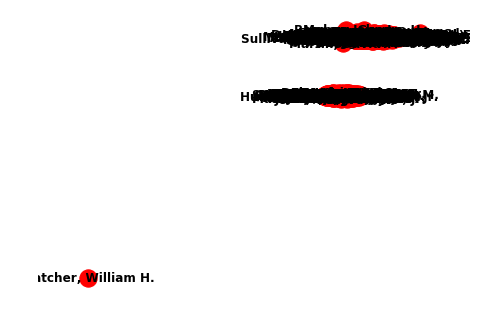

In [44]:
plt.show()

In [156]:
G.number_of_nodes()

541

In [157]:
G.number_of_edges()

81812